In [4]:
import pandas as pd
!git clone https://github.com/SBU-CE/Deep-Learning
stk_data = pd.read_csv('./Deep-Learning/spring-2022/assignments/project-4/GOOG.csv', index_col='Date')
stk_data.head()

Cloning into 'Deep-Learning'...
remote: Enumerating objects: 414, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 414 (delta 64), reused 23 (delta 11), pack-reused 265
Receiving objects: 100% (414/414), 16.43 MiB | 9.44 MiB/s, done.
Resolving deltas: 100% (149/149), done.


Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-12-20  542.117981  548.528992  541.968567  548.255005  548.255005   
2013-12-23  551.851501  555.816650  550.496582  555.467957  555.467957   
2013-12-24  555.403198  555.537720  551.981018  553.844055  553.844055   
2013-12-26  554.924988  557.410706  552.274963  556.643555  556.643555   
2013-12-27  557.908813  558.048279  554.392029  557.111816  557.111816   

             Volume  
Date                 
2013-12-20  6547651  
2013-12-23  3456106  
2013-12-24  1473904  
2013-12-26  2685629  
2013-12-27  3151167

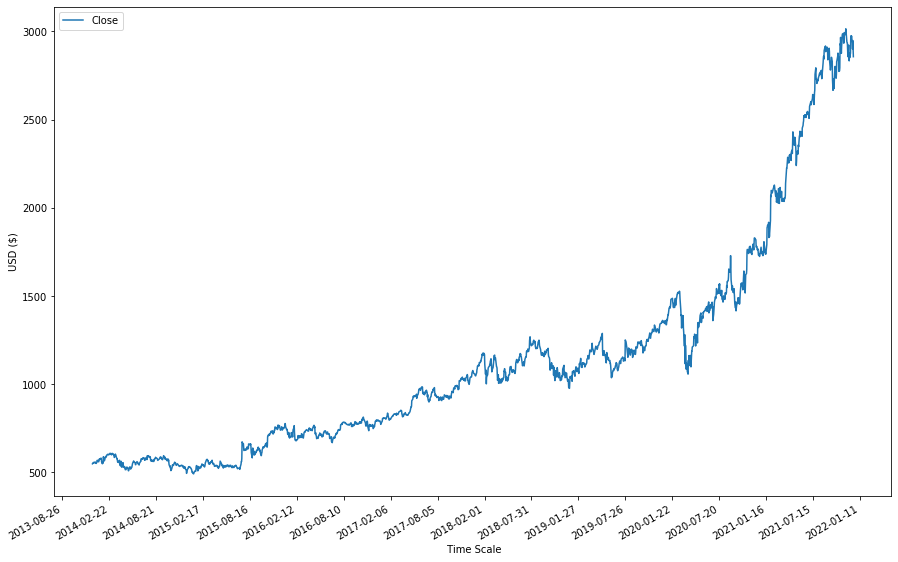

In [5]:
import matplotlib.dates as mdp
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdp.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdp.DayLocator(interval=180))
x_dates= [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in stk_data.index.values]

plt.plot(x_dates, stk_data['Close'], label='Close')
plt.xlabel(' Time Scale')
plt.ylabel('USD ($)')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

import torch
import torch.nn as nn

In [7]:
#Data Preprocessing
#Target and Features

data_close=stk_data.filter(['Close'])
sub_data=stk_data.iloc[:,0:4]
#feature Scaling
s_data=data_close.values
date_index=stk_data.index
sca=MinMaxScaler(feature_range=(0,1))
normal_data=sca.fit_transform(s_data)



In [8]:
#splitting Train and Test Data

def data_split(data, step_size):
    x,y,z=[],[],[]
    for i in range(step_size,len(data)):
        x.append(data[i-step_size:i,-1])
        y.append(data[i-1,-1])
    return np.array(x), np.array(y)

window_size=30  #The number of days to 
train_rate=0.8


x1, y1=data_split(normal_data, step_size=window_size)

split_index=int(np.ceil(len(x1)*(train_rate)))
x_train,x_test=x1[:split_index],x1[split_index:]
y_train,y_test=y1[:split_index],y1[split_index:]


print(x1.shape,x_train.shape,x_test.shape,y_train.shape, y_test.shape)    


#for i in range(window_size,len(test_data)):
#    xx_test.append(test_data[i-window_size:i,0])
#x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

y_train=np.reshape(y_train,(y_train.shape[0],1))
y_test=np.reshape(y_test,(y_test.shape[0],1))

print(x_train.shape)
print(y_test.shape)

(1983, 30) (1587, 30) (396, 30) (1587,) (396,)
(1587, 30, 1)
(396, 1)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model

0   0


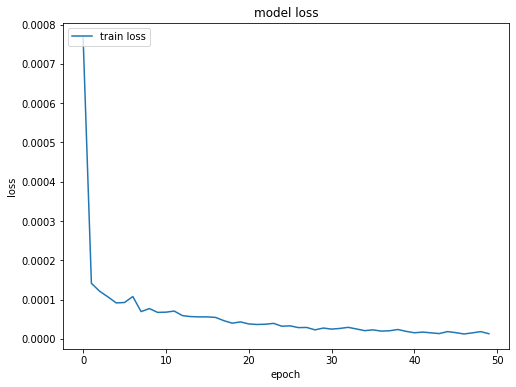

Normalized Rmse= 0.002264836368467277 RMSE= 5.714121666699674 MAPE= 0.002692680775269419
0   1


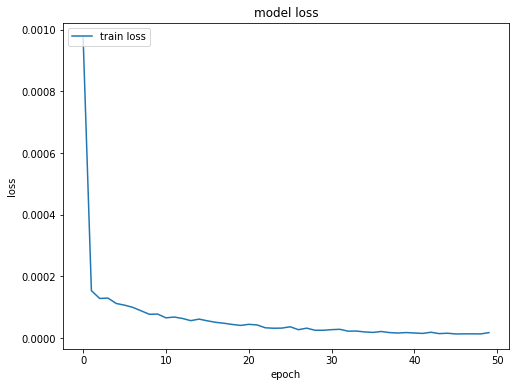

Normalized Rmse= 0.0068338629810566695 RMSE= 17.241707723234303 MAPE= 0.008004088876134066
0   2


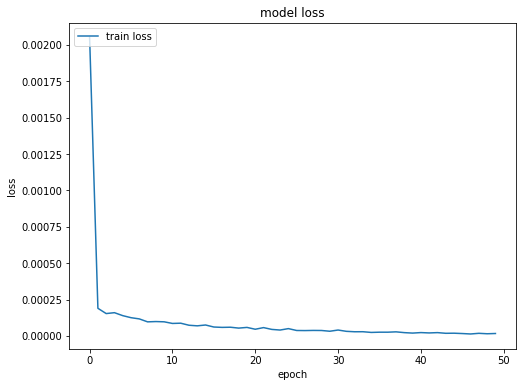

Normalized Rmse= 0.008912824931249548 RMSE= 22.4868713861592 MAPE= 0.01092722831146887
0   3


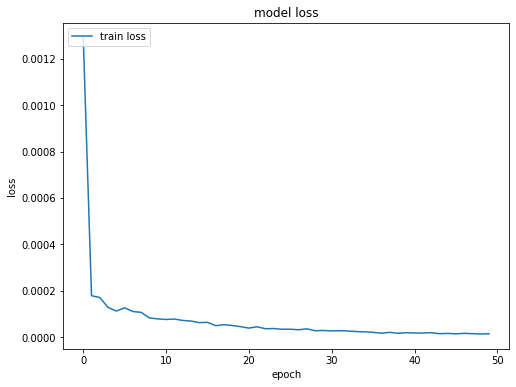

Normalized Rmse= 0.01789890938509307 RMSE= 45.15856812260936 MAPE= 0.024461058935995685
0   4


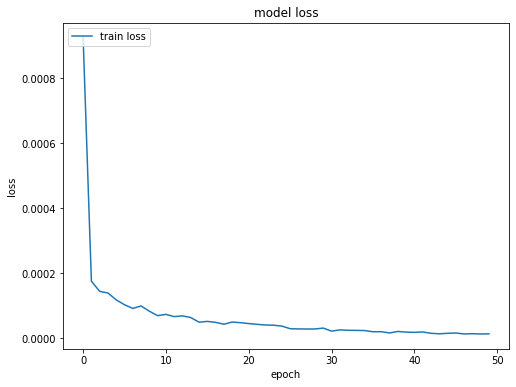

Normalized Rmse= 0.008462809657236692 RMSE= 21.351487735032748 MAPE= 0.010028395085100764
Mean Norm RMSE= 0.00887464866462065 Mean RMSE= 22.390551326747055 Mean MAPE= 0.011222690396793761
1   0


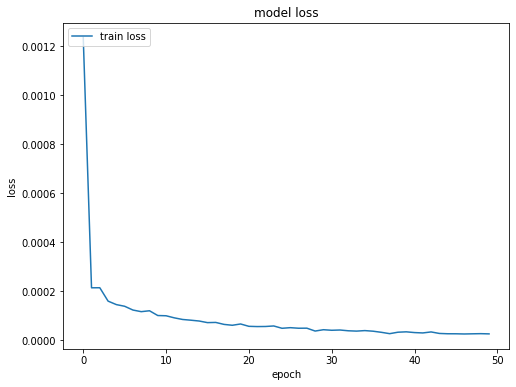

Normalized Rmse= 0.0040403576082296755 RMSE= 10.19371724424714 MAPE= 0.003649662452413381
1   1


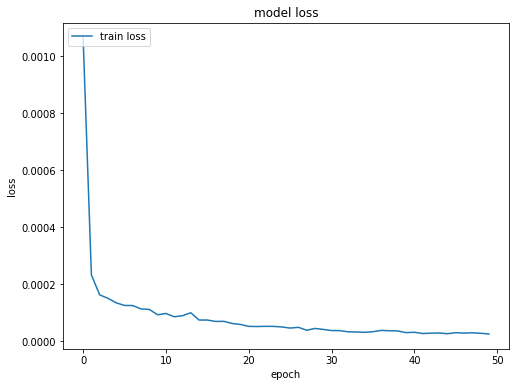

Normalized Rmse= 0.006529578344198823 RMSE= 16.473997706832133 MAPE= 0.007203238248425204
1   2


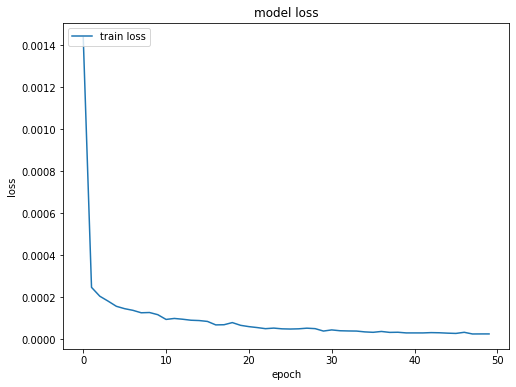

Normalized Rmse= 0.016333625525955315 RMSE= 41.20938929163899 MAPE= 0.02036928197399905
1   3


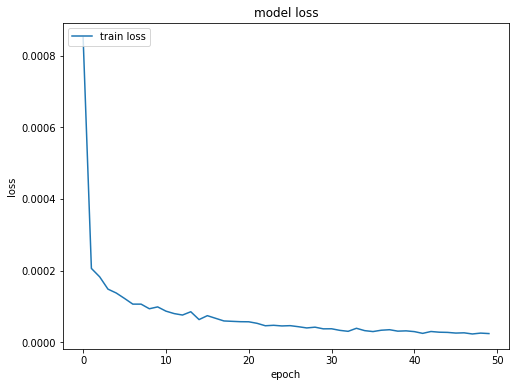

Normalized Rmse= 0.00387282916620765 RMSE= 9.771066937778409 MAPE= 0.004212172966627775
1   4


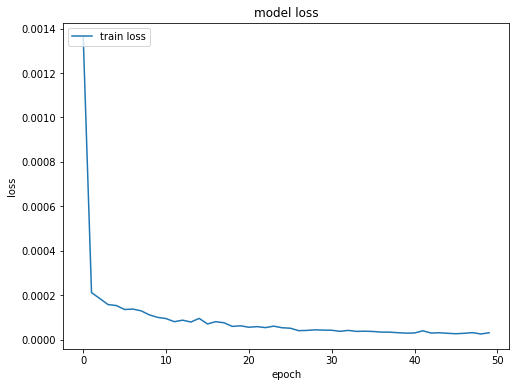

Normalized Rmse= 0.016816956577125387 RMSE= 42.428776129906865 MAPE= 0.025020495651326663
Mean Norm RMSE= 0.00951866944434337 Mean RMSE= 24.01538946208071 Mean MAPE= 0.012090970258558415
2   0


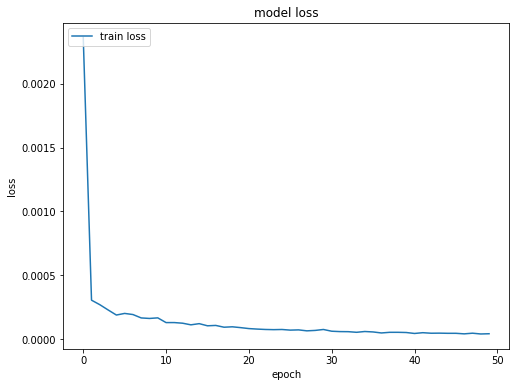

Normalized Rmse= 0.008337861694609839 RMSE= 21.03621029659713 MAPE= 0.010687828990048198
2   1


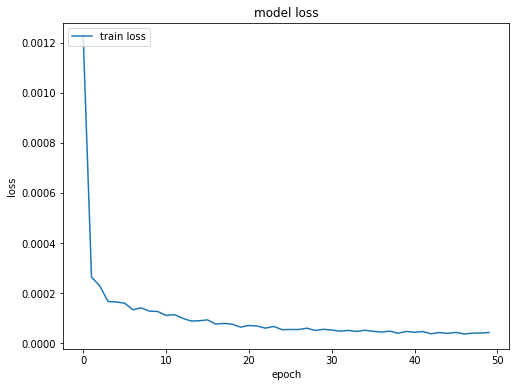

Normalized Rmse= 0.0025463474280801764 RMSE= 6.424355465553383 MAPE= 0.0035348210728605245
2   2


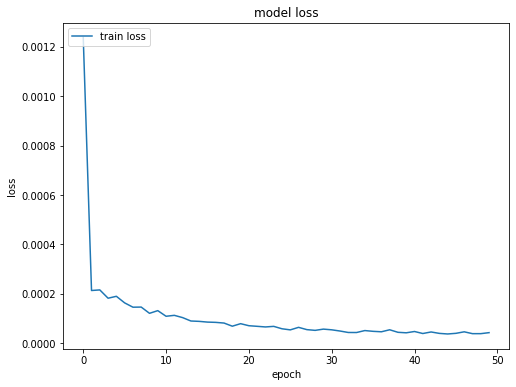

Normalized Rmse= 0.00227069957447026 RMSE= 5.728912056252787 MAPE= 0.003090188830863913
2   3


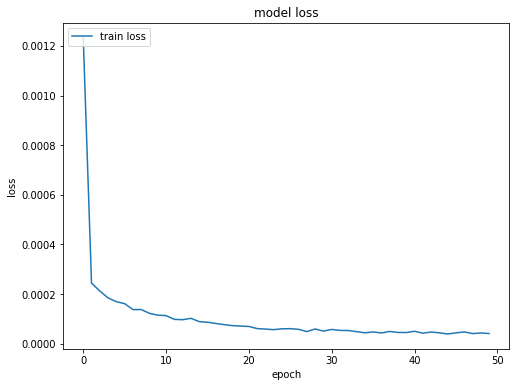

Normalized Rmse= 0.013127431719668148 RMSE= 33.1202331552147 MAPE= 0.017871677848860953
2   4


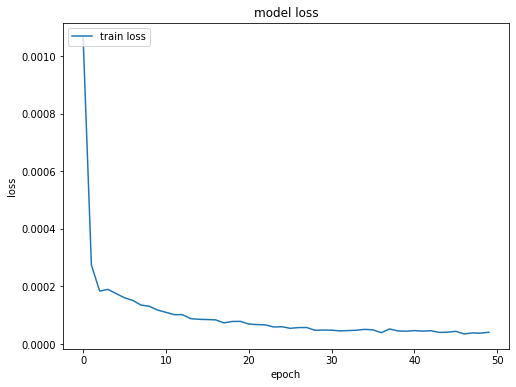

Normalized Rmse= 0.007884967033520516 RMSE= 19.89358943053075 MAPE= 0.012399336632302034
Mean Norm RMSE= 0.006833461490069788 Mean RMSE= 17.24066008082975 Mean MAPE= 0.009516770674987126
3   0


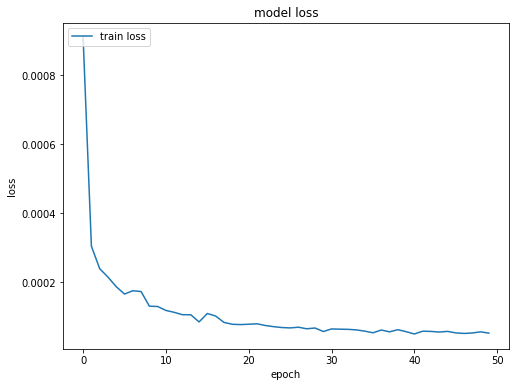

Normalized Rmse= 0.024521212287638258 RMSE= 61.866507943578256 MAPE= 0.03159710093345276
3   1


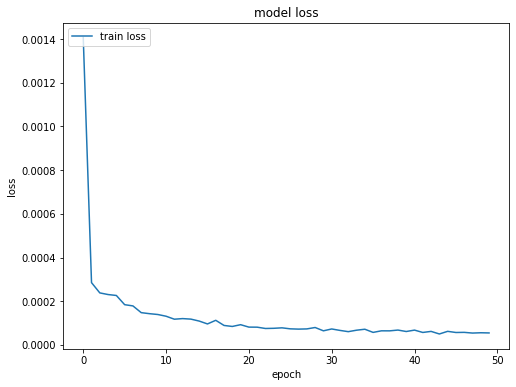

Normalized Rmse= 0.011829540681263514 RMSE= 29.84568101924342 MAPE= 0.01462949589504163
3   2


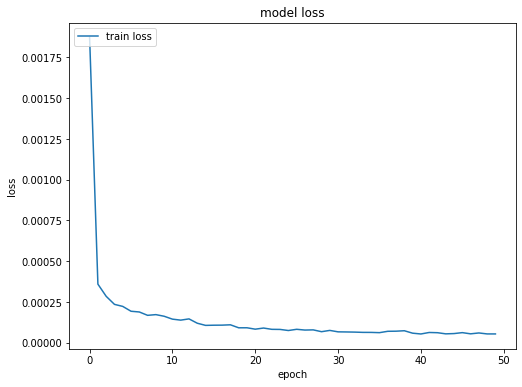

Normalized Rmse= 0.009800523512304834 RMSE= 24.726511696422143 MAPE= 0.013048064006662924
3   3


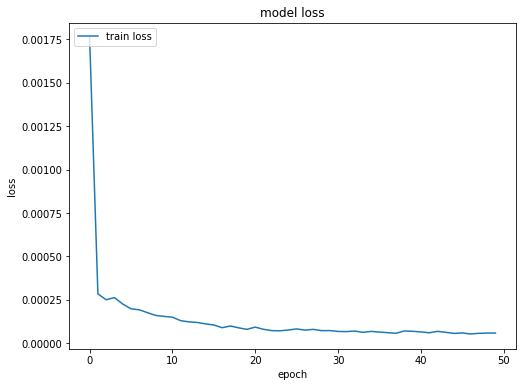

Normalized Rmse= 0.018994696631643382 RMSE= 47.92322763360476 MAPE= 0.024472791701014407
3   4


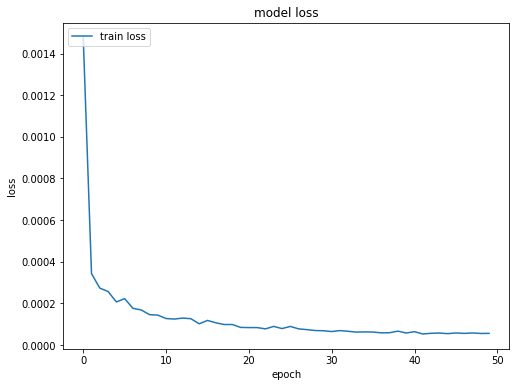

Normalized Rmse= 0.025572715878967284 RMSE= 64.51942507990235 MAPE= 0.031577889558314864
Mean Norm RMSE= 0.018143737798363455 Mean RMSE= 45.77627067455019 Mean MAPE= 0.023065068418897317
4   0


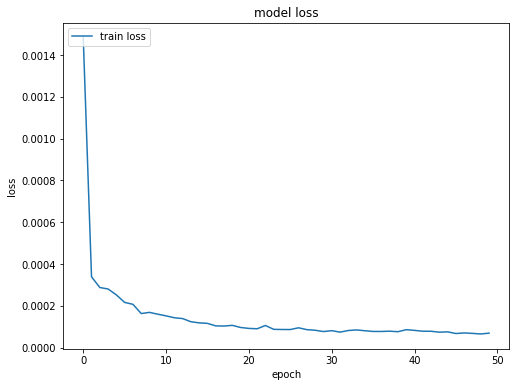

Normalized Rmse= 0.01614107246060944 RMSE= 40.723578771256264 MAPE= 0.01721475150828216
4   1


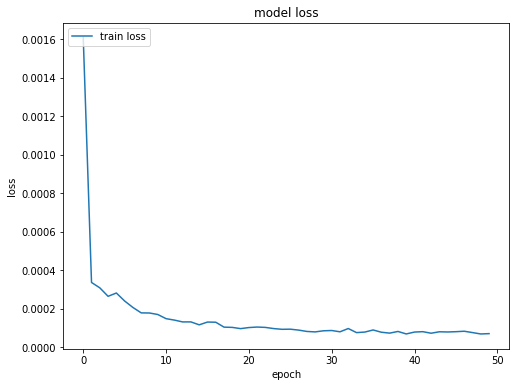

Normalized Rmse= 0.007427170190979968 RMSE= 18.738593364246125 MAPE= 0.00899171143123051
4   2


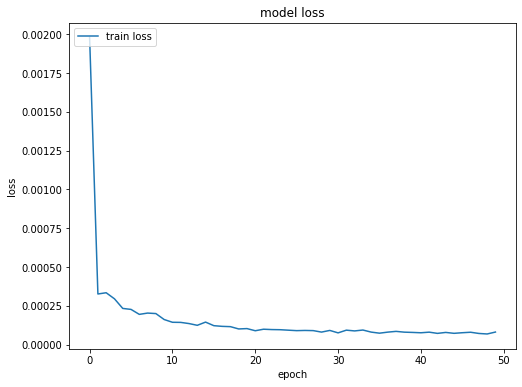

Normalized Rmse= 0.006661557295000698 RMSE= 16.806961993065645 MAPE= 0.007764538114719719
4   3


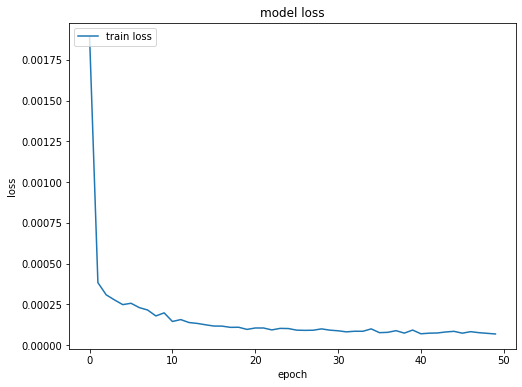

Normalized Rmse= 0.00547357113371217 RMSE= 13.809714328777956 MAPE= 0.006780224889974979
4   4


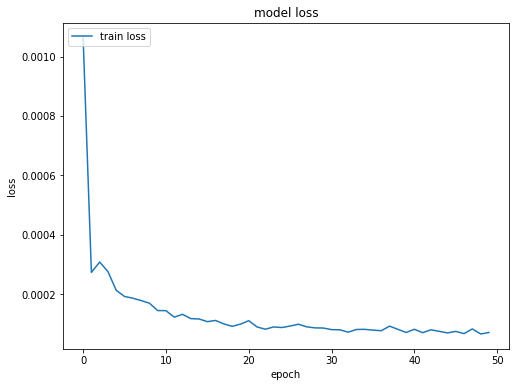

Normalized Rmse= 0.010324949019880694 RMSE= 26.049623543722348 MAPE= 0.011225888471300953
Mean Norm RMSE= 0.009205664020036594 Mean RMSE= 23.225694400213666 Mean MAPE= 0.010395422883101664
5   0


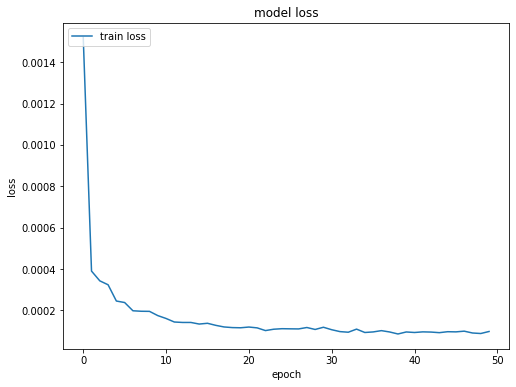

Normalized Rmse= 0.007820137857836322 RMSE= 19.730020726135788 MAPE= 0.01161758625201223
5   1


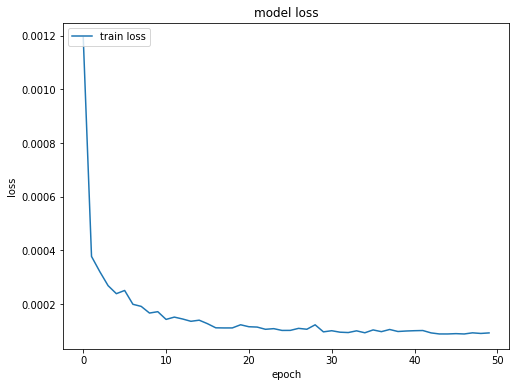

Normalized Rmse= 0.01449667083705037 RMSE= 36.57476738316776 MAPE= 0.021754708889533292
5   2


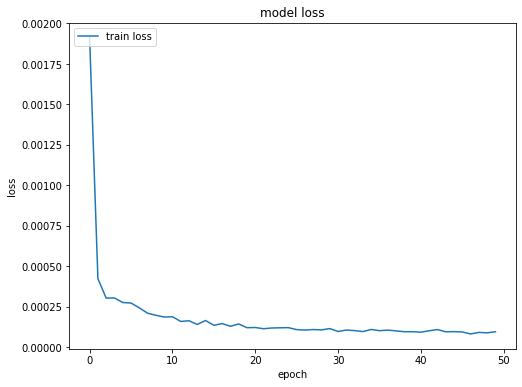

Normalized Rmse= 0.018089889348053074 RMSE= 45.64040638677818 MAPE= 0.02093983751663634
5   3


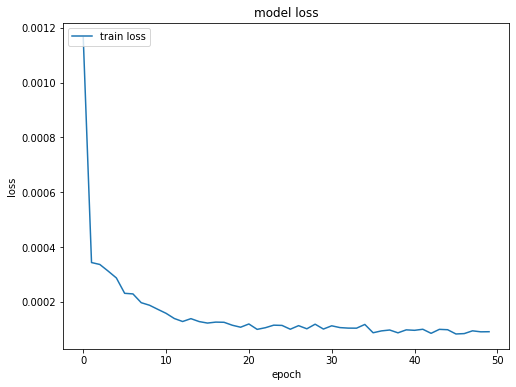

Normalized Rmse= 0.013473963867442639 RMSE= 33.99451884838831 MAPE= 0.014683909254932131
5   4


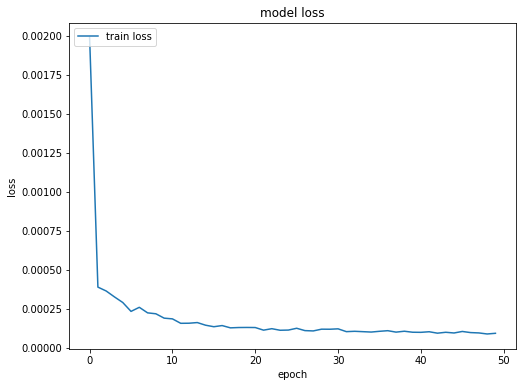

Normalized Rmse= 0.025793608988759154 RMSE= 65.07673998211939 MAPE= 0.031473366711016894
Mean Norm RMSE= 0.01593485417982831 Mean RMSE= 40.20329066531788 Mean MAPE= 0.02009388172482618


In [13]:
drop_rate=0.15
for m in range(2,20,2):
  av_rmse=0
  av_rmse1=0
  av_mape=0
  
#LSTM Model One
  for i in range(5):
    lstm1=Sequential()
    lstm1.add(LSTM(80,input_shape=(x_train.shape[1],x_train.shape[2]),activation='tanh',return_sequences=False))
    lstm1.add(Dropout(drop_rate))
    lstm1.add(Dense(1))
    lstm1.compile(loss='mse',optimizer='adam')
    #lstm1.summary()
#plot_model(lstm1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    
  
    print(m,' ',i)
    history=lstm1.fit(x_train,y_train,epochs=50,batch_size=m, verbose=0)
    y_test_pred=lstm1.predict(x_test)
    y_train_pred=lstm1.predict(x_train)

    rmse=mean_squared_error(y_test,y_test_pred,squared=False)
    av_rmse=av_rmse+rmse
    y_test_pred_nn=sca.inverse_transform(y_test_pred)
    y_train_pred_nn=sca.inverse_transform(y_train_pred)
    y_test_nn=sca.inverse_transform(y_test)
    rmse1=mean_squared_error(y_test_nn,y_test_pred_nn,squared=False)
    mape=mean_absolute_percentage_error(y_test,y_test_pred)
    av_rmse1=av_rmse1+rmse1
    av_mape=av_mape+mape
    lstm1.reset_states()
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train loss'], loc='upper left')
    plt.show()
    print('Normalized Rmse=',rmse, 'RMSE=',rmse1,'MAPE=',mape)

  print('Mean Norm RMSE=',av_rmse/5,'Mean RMSE=',av_rmse1/5,'Mean MAPE=',av_mape/5)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


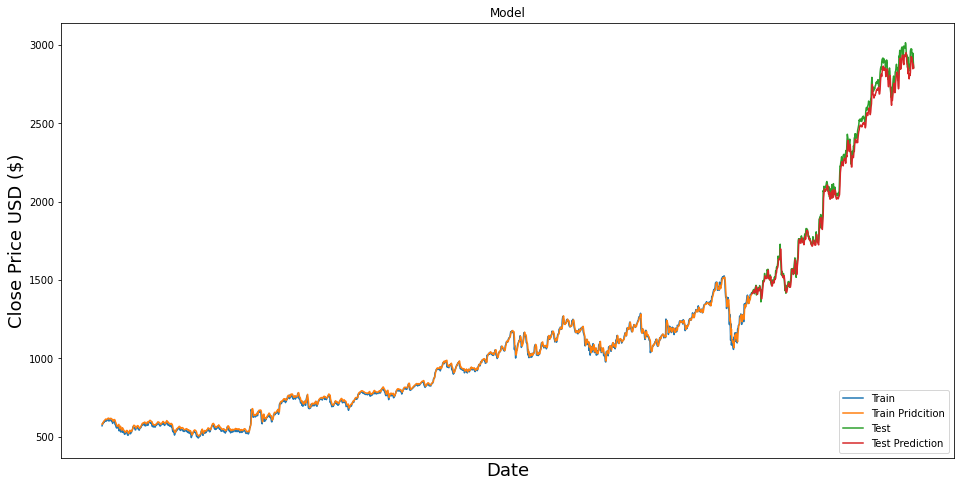

In [ ]:
train=data_close[window_size:split_index+window_size]
valid=data_close[split_index+window_size:]

train['Prediction'] =y_train_pred_nn
valid['Prediction'] =y_test_pred_nn


#Visualize the data
#print(valid)
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train[['Close','Prediction']])
plt.plot(valid[['Close', 'Prediction']])
plt.gca().xaxis.set_major_locator(mdp.DayLocator(interval=120))
plt.legend(['Train', 'Train Pridcition','Test', 'Test Prediction'], loc='lower right')
plt.show()
#valid.head()

0


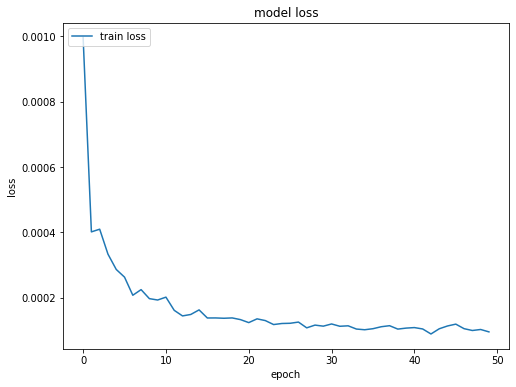

Normalized Rmse= 0.017210175222633097 RMSE= 43.42089071304498 MAPE= 0.02512767699910466
1


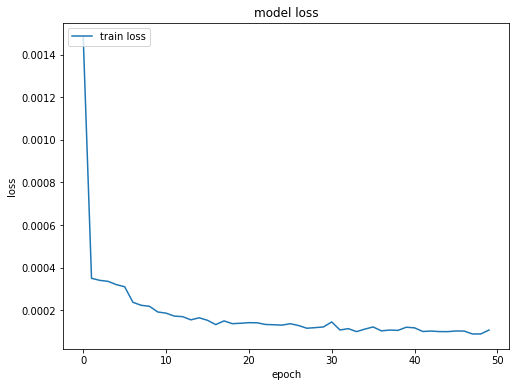

Normalized Rmse= 0.030764276013931613 RMSE= 77.61764335107353 MAPE= 0.03929400876892123
2


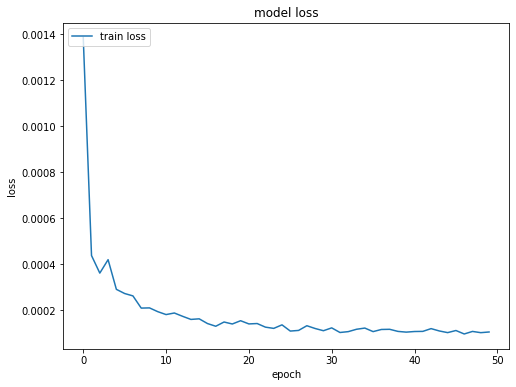

Normalized Rmse= 0.013538105339672252 RMSE= 34.1563501412486 MAPE= 0.013481677265757453
3


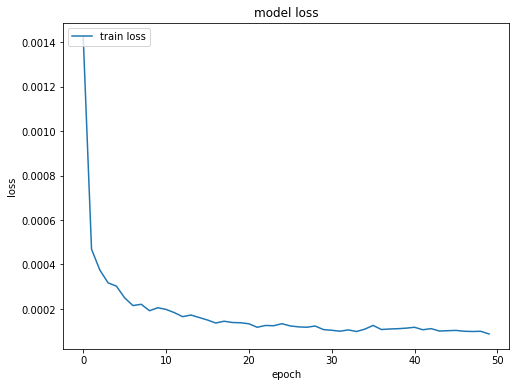

Normalized Rmse= 0.0061441503391485635 RMSE= 15.5015315373456 MAPE= 0.00948763382786995
4


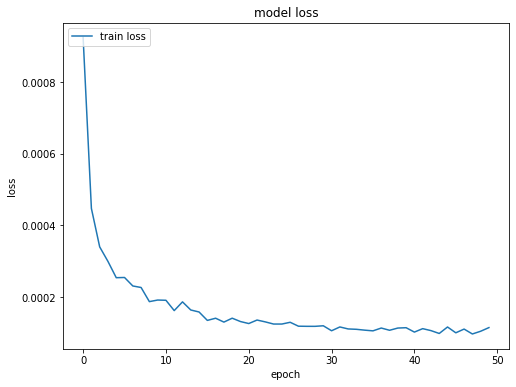

Normalized Rmse= 0.023059445057664957 RMSE= 58.17847842213789 MAPE= 0.02591647905811648
5


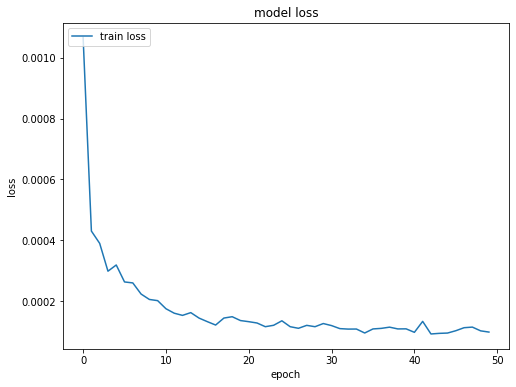

Normalized Rmse= 0.028448344849137903 RMSE= 71.77457326660351 MAPE= 0.03803672851843546
6


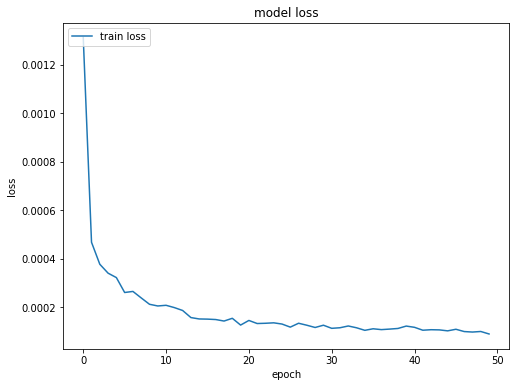

Normalized Rmse= 0.008343407252564838 RMSE= 21.05023659610472 MAPE= 0.009305950695663168
7


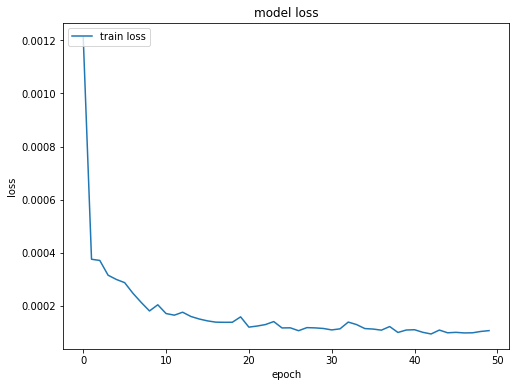

Normalized Rmse= 0.006855484165121566 RMSE= 17.296230341389695 MAPE= 0.008042207895401127
8


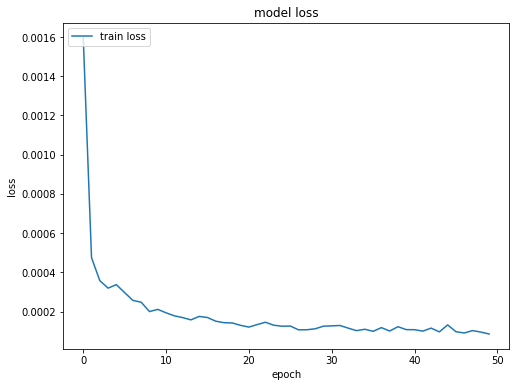

Normalized Rmse= 0.006300076008514801 RMSE= 15.894934640728993 MAPE= 0.009317403431225703
9


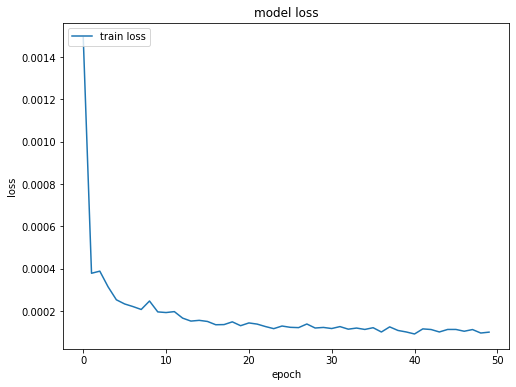

Normalized Rmse= 0.006361165611012409 RMSE= 16.049076066827674 MAPE= 0.008262370613428454
Mean Norm RMSE= 0.014702462985940199 Mean RMSE= 37.09399450765052 Mean MAPE= 0.01862721370739237


In [ ]:
#LSTM Model two
av_rmse=0
av_rmse1=0
av_mape=0
for i in range(10):
    lstm2=Sequential()
    lstm2.add(LSTM(60,input_shape=(x_train.shape[1],x_train.shape[2]),activation='tanh',return_sequences=True))
    lstm2.add(Dropout(0.2))
    lstm2.add(LSTM(units = 60, activation='tanh', return_sequences = False))
    lstm2.add(Dropout(0.2))
    lstm2.add(Dense(1))
    lstm2.compile(loss='mse',optimizer='adam')
    #lstm2.summary()
    #plot_model(lstm2, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)
   
  
    print(i)
    history=lstm2.fit(x_train,y_train,epochs=50,batch_size=10, verbose=0)
    y_test_pred=lstm2.predict(x_test)
    y_train_pred=lstm2.predict(x_train)

    rmse=mean_squared_error(y_test,y_test_pred,squared=False)
    av_rmse=av_rmse+rmse
    y_test_pred_nn=sca.inverse_transform(y_test_pred)
    y_train_pred_nn=sca.inverse_transform(y_train_pred)
    y_test_nn=sca.inverse_transform(y_test)
    rmse1=mean_squared_error(y_test_nn,y_test_pred_nn,squared=False)
    mape=mean_absolute_percentage_error(y_test,y_test_pred)
    av_rmse1=av_rmse1+rmse1
    av_mape=av_mape+mape
    lstm2.reset_states()
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train loss'], loc='upper left')
    plt.show()
    print('Normalized Rmse=',rmse, 'RMSE=',rmse1,'MAPE=',mape)

print('Mean Norm RMSE=',av_rmse/10,'Mean RMSE=',av_rmse1/10,'Mean MAPE=',av_mape/10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


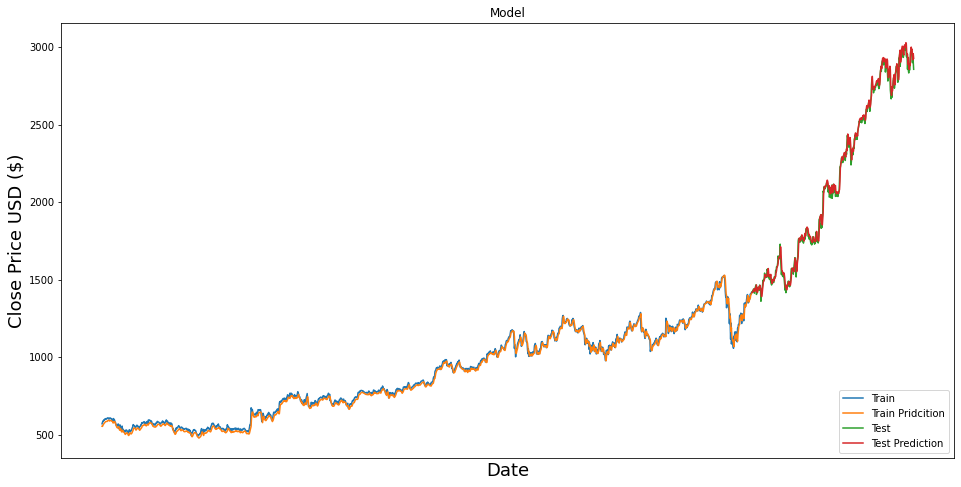

In [ ]:
train=data_close[window_size:split_index+window_size]
valid=data_close[split_index+window_size:]

train['Prediction'] =y_train_pred_nn
valid['Prediction'] =y_test_pred_nn


#Visualize the data
#print(valid)
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train[['Close','Prediction']])
plt.plot(valid[['Close', 'Prediction']])
plt.gca().xaxis.set_major_locator(mdp.DayLocator(interval=120))
plt.legend(['Train', 'Train Pridcition','Test', 'Test Prediction'], loc='lower right')
plt.show()
#valid.head()

0
0


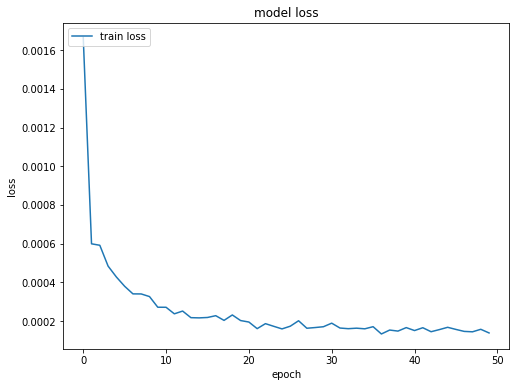

Normalized Rmse= 0.0368352575369798 RMSE= 92.93460253026352 MAPE= 0.042284621751289594
1
1


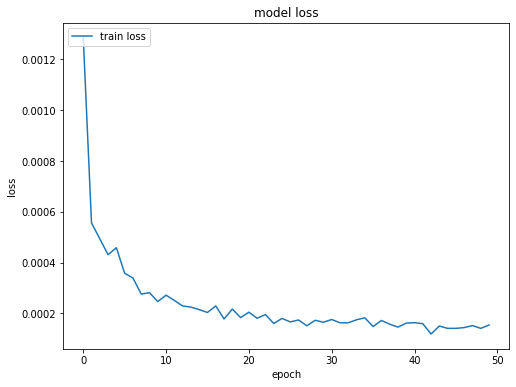

Normalized Rmse= 0.0059663024396006265 RMSE= 15.052844349598677 MAPE= 0.007493595942345652
2
2


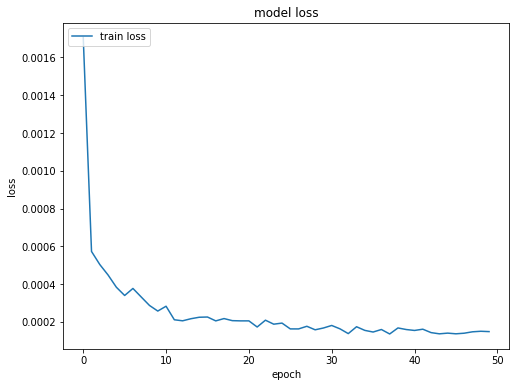

Normalized Rmse= 0.02649856508640469 RMSE= 66.85534480161964 MAPE= 0.025999369615012192
3
3


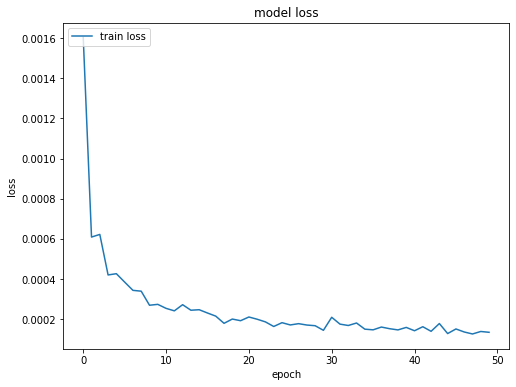

Normalized Rmse= 0.023341231422616893 RMSE= 58.88942257906406 MAPE= 0.02238870681754893
4
4


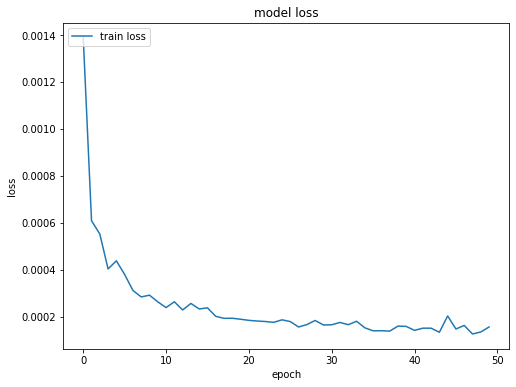

Normalized Rmse= 0.029596593558110253 RMSE= 74.67157661424035 MAPE= 0.032685108031238384
5
5


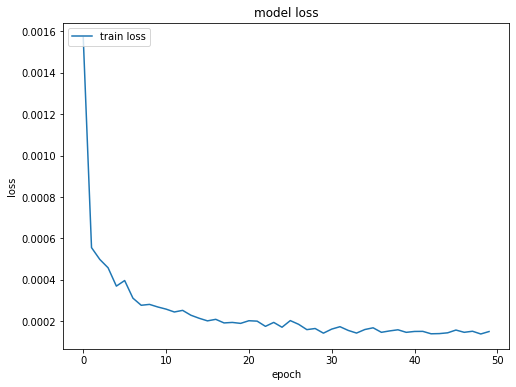

Normalized Rmse= 0.013224951337168396 RMSE= 33.36624161151966 MAPE= 0.021754339760555148
6
6


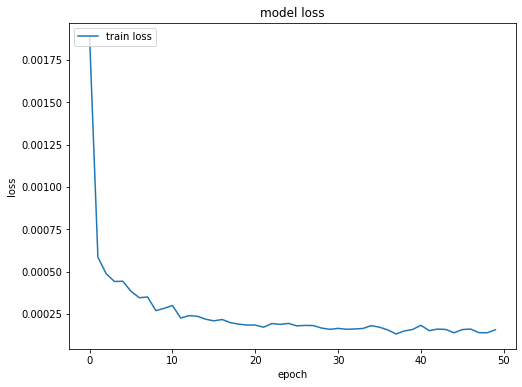

Normalized Rmse= 0.01890605425229583 RMSE= 47.69954640366389 MAPE= 0.024948688420455955
7
7


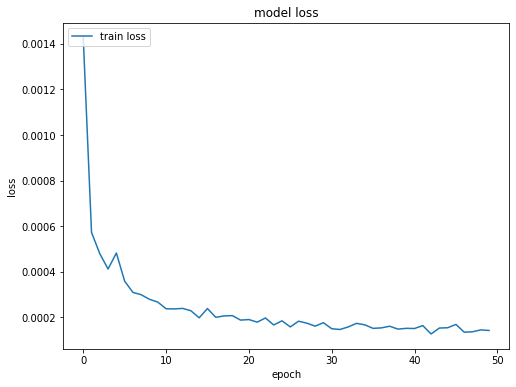

Normalized Rmse= 0.021471494624532208 RMSE= 54.17211706123148 MAPE= 0.01976372715732381
8
8


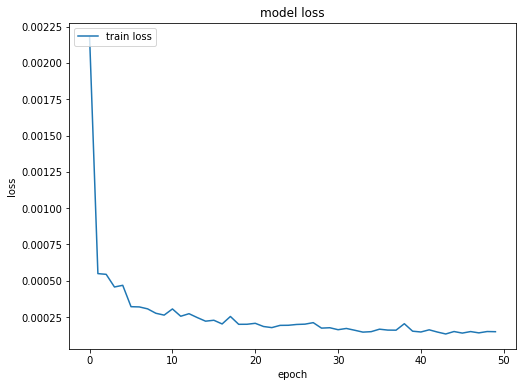

Normalized Rmse= 0.026394649673348473 RMSE= 66.59313564291352 MAPE= 0.027133107186913683
9
9


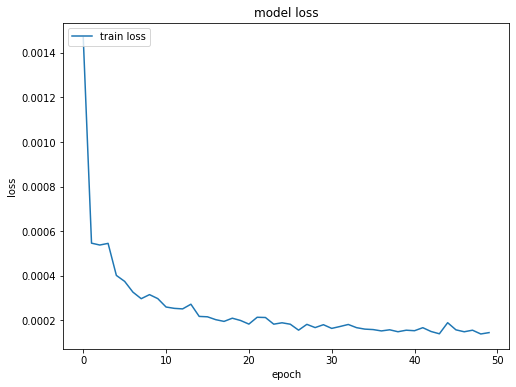

Normalized Rmse= 0.03537617062377938 RMSE= 89.25333239265571 MAPE= 0.04311288580476309
Mean Norm RMSE= 0.023761127055483656 Mean RMSE= 59.948816398677046 Mean MAPE= 0.026756415048744642


In [ ]:
#LSTM Model Three

av_rmse=0
av_rmse1=0
av_mape=0
for i in range(10):
    print(i)
    lstm3=Sequential()
    lstm3.add(LSTM(50,input_shape=(x_train.shape[1],x_train.shape[2]),activation='tanh',return_sequences=True))
    lstm3.add(Dropout(0.2))
    lstm3.add(LSTM(units = 50, activation='tanh', return_sequences = True))
    lstm3.add(Dropout(0.2))
    lstm3.add(LSTM(units = 50, activation='tanh', return_sequences = False))
    lstm3.add(Dropout(0.2))
    lstm3.add(Dense(1))
    lstm3.compile(loss='mse',optimizer='adam')   
    #lstm3.summary()
    #plot_model(lstm3, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

   
  
    
    history=lstm3.fit(x_train,y_train,epochs=50,batch_size=10, verbose=0)
    y_test_pred=lstm3.predict(x_test)
    y_train_pred=lstm3.predict(x_train)

    rmse=mean_squared_error(y_test,y_test_pred,squared=False)
    av_rmse=av_rmse+rmse
    y_test_pred_nn=sca.inverse_transform(y_test_pred)
    y_train_pred_nn=sca.inverse_transform(y_train_pred)
    y_test_nn=sca.inverse_transform(y_test)
    rmse1=mean_squared_error(y_test_nn,y_test_pred_nn,squared=False)
    mape=mean_absolute_percentage_error(y_test,y_test_pred)
    av_rmse1=av_rmse1+rmse1
    av_mape=av_mape+mape
    lstm3.reset_states()
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train loss'], loc='upper left')
    plt.show()
    print('Normalized Rmse=',rmse, 'RMSE=',rmse1,'MAPE=',mape)

print('Mean Norm RMSE=',av_rmse/10,'Mean RMSE=',av_rmse1/10,'Mean MAPE=',av_mape/10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


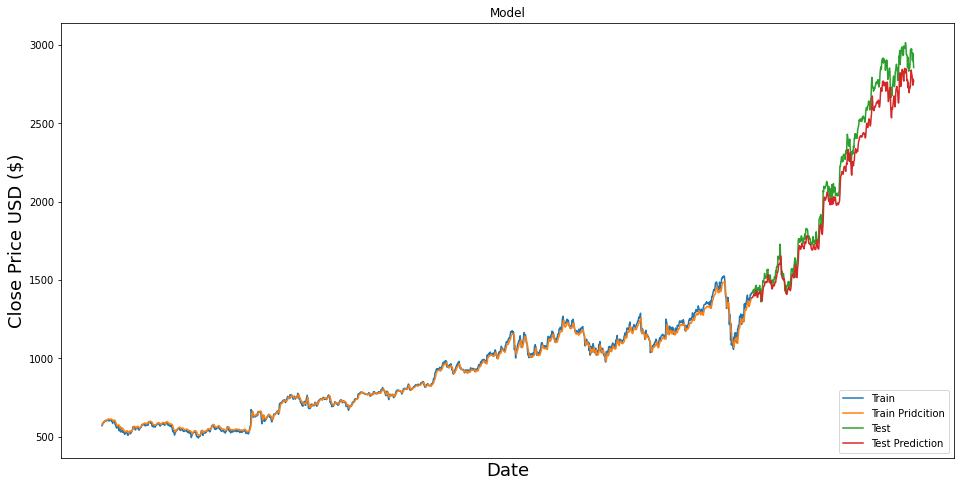

In [ ]:
train=data_close[window_size:split_index+window_size]
valid=data_close[split_index+window_size:]

train['Prediction'] =y_train_pred_nn
valid['Prediction'] =y_test_pred_nn


#Visualize the data
#print(valid)
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train[['Close','Prediction']])
plt.plot(valid[['Close', 'Prediction']])
plt.gca().xaxis.set_major_locator(mdp.DayLocator(interval=120))
plt.legend(['Train', 'Train Pridcition','Test', 'Test Prediction'], loc='lower right')
plt.show()
#valid.head()

0


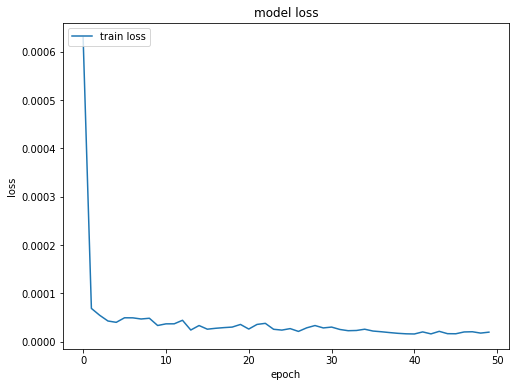

Normalized Rmse= 0.008957013421769832 RMSE= 22.59834077662042 MAPE= 0.013751765800819797
1


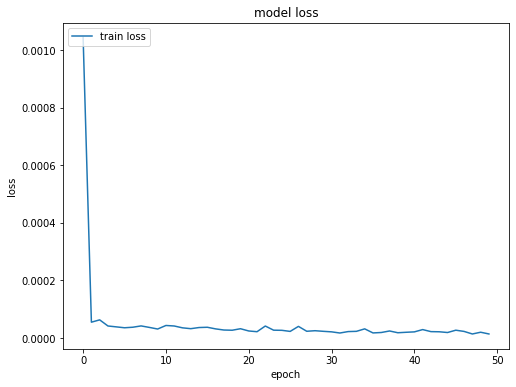

Normalized Rmse= 0.0012448870134084088 RMSE= 3.1408011842004737 MAPE= 0.0018666308417313365
2


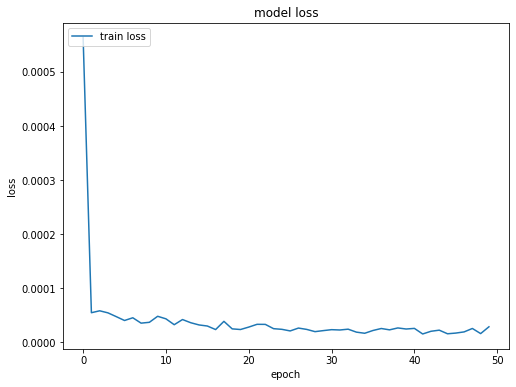

Normalized Rmse= 0.0023141325028897836 RMSE= 5.838522748736096 MAPE= 0.0035257973729108352
3


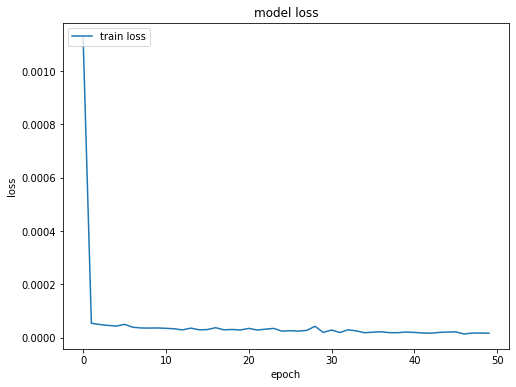

Normalized Rmse= 0.0010786295292371881 RMSE= 2.7213453402786816 MAPE= 0.0013335208991006428
4


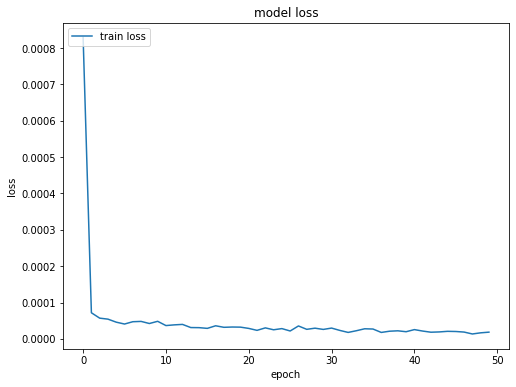

Normalized Rmse= 0.021505463301109237 RMSE= 54.25782822184912 MAPE= 0.02743938762379476
5


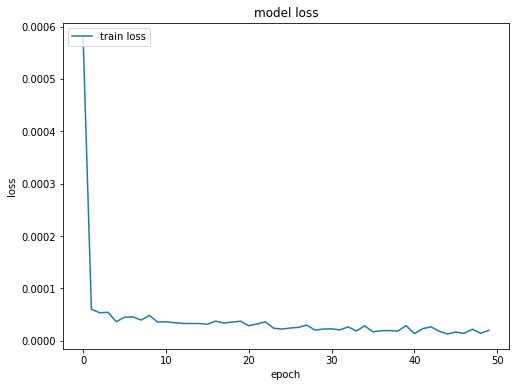

Normalized Rmse= 0.00895662394672506 RMSE= 22.59738287033237 MAPE= 0.011511914116292137
6


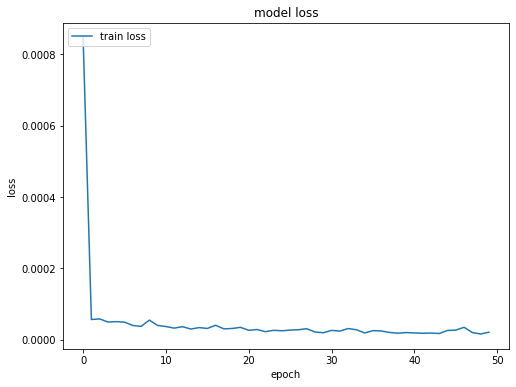

Normalized Rmse= 0.0035228452403964355 RMSE= 8.888045650373687 MAPE= 0.005096780136552152
7


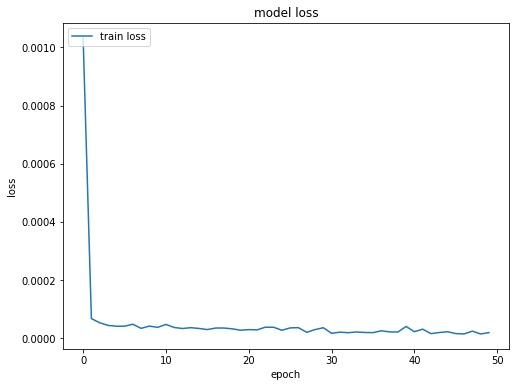

Normalized Rmse= 0.010688969923434617 RMSE= 26.968044733507966 MAPE= 0.010757927720162966
8


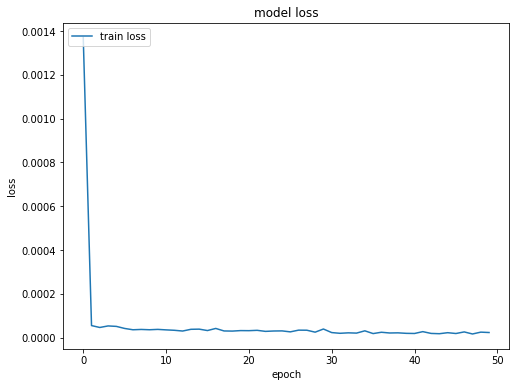

Normalized Rmse= 0.0029932392364296475 RMSE= 7.551867478260326 MAPE= 0.0027013874421328763
9


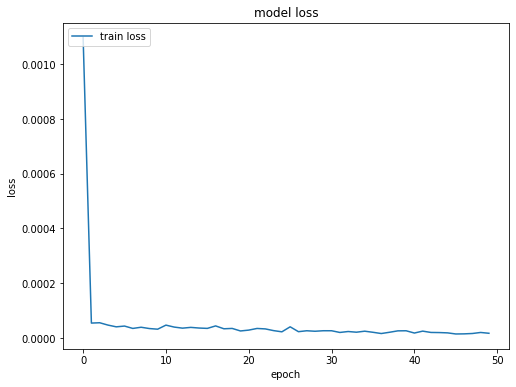

Normalized Rmse= 0.005853934058214039 RMSE= 14.769312138789854 MAPE= 0.00884660882837015
Mean Norm RMSE= 0.006711573817361424 Mean RMSE= 16.9331491142949 Mean MAPE= 0.008683172078186767


In [ ]:
#model GRU1

av_rmse=0
av_rmse1=0
av_mape=0
for i in range(10):
    print(i)
    GRU1 = Sequential()
    GRU1.add(GRU(50, input_shape=(30, 1)))
    GRU1.add(Dense(units = 512, activation = 'tanh'))
    GRU1.add(Dropout(0.2))
    GRU1.add(Dense(units = 1, activation = 'linear'))
    #GRU1.summary()
    #plot_model(GRU1, to_file='model_plot4.png', show_shapes=True, show_layer_names=True)
    GRU1.compile(loss='mse', optimizer='adam')
    history=GRU1.fit(x_train,y_train,epochs=50,batch_size=10, verbose=0)
    #GRU1.summary()
    #plot_model(lstm3, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)
      
    y_test_pred=GRU1.predict(x_test)
    y_train_pred=GRU1.predict(x_train)

    rmse=mean_squared_error(y_test,y_test_pred,squared=False)
    av_rmse=av_rmse+rmse
    y_test_pred_nn=sca.inverse_transform(y_test_pred)
    y_train_pred_nn=sca.inverse_transform(y_train_pred)
    y_test_nn=sca.inverse_transform(y_test)
    rmse1=mean_squared_error(y_test_nn,y_test_pred_nn,squared=False)
    mape=mean_absolute_percentage_error(y_test,y_test_pred)
    av_rmse1=av_rmse1+rmse1
    av_mape=av_mape+mape
    GRU1.reset_states()
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train loss'], loc='upper left')
    plt.show()
    print('Normalized Rmse=',rmse, 'RMSE=',rmse1,'MAPE=',mape)

print('Mean Norm RMSE=',av_rmse/10,'Mean RMSE=',av_rmse1/10,'Mean MAPE=',av_mape/10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


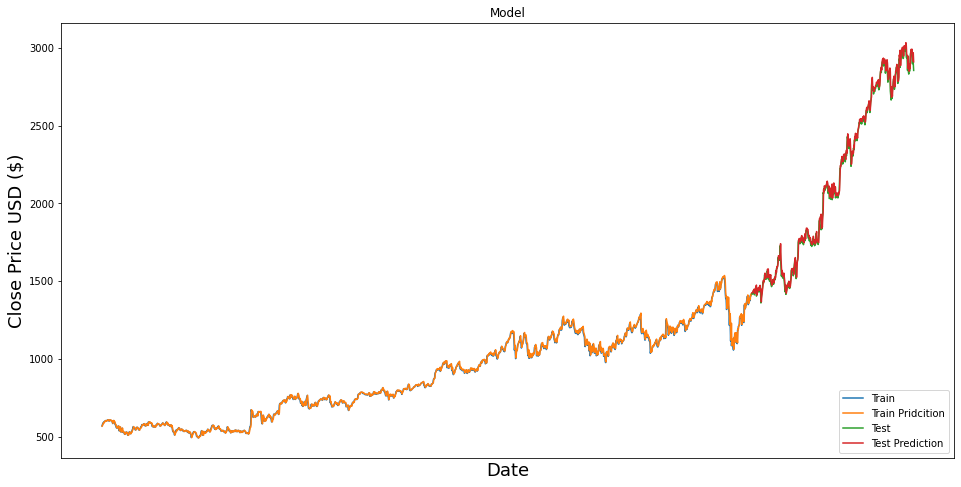

In [ ]:
train=data_close[window_size:split_index+window_size]
valid=data_close[split_index+window_size:]

train['Prediction'] =y_train_pred_nn
valid['Prediction'] =y_test_pred_nn


#Visualize the data
#print(valid)
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train[['Close','Prediction']])
plt.plot(valid[['Close', 'Prediction']])
plt.gca().xaxis.set_major_locator(mdp.DayLocator(interval=120))
plt.legend(['Train', 'Train Pridcition','Test', 'Test Prediction'], loc='lower right')
plt.show()
#valid.head()

20   0


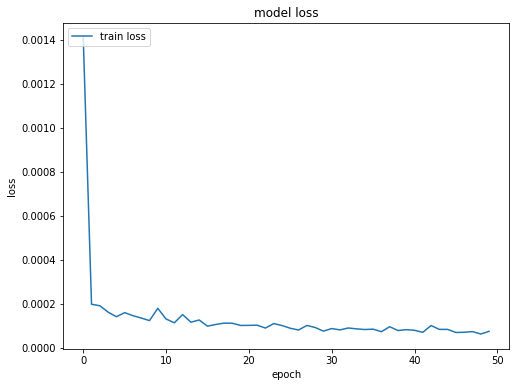

Normalized Rmse= 0.033692540476683824 RMSE= 85.00556627104766 MAPE= 0.03870486416759518
20   1


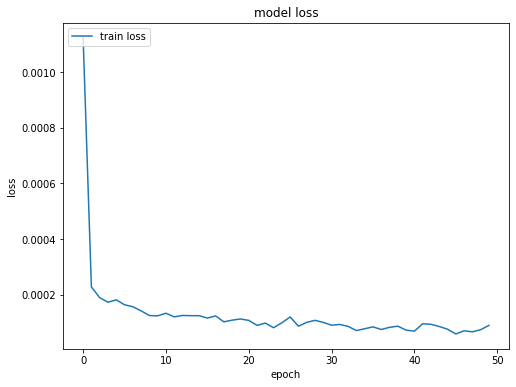

Normalized Rmse= 0.022295848119569063 RMSE= 56.25198270852781 MAPE= 0.02118110212426486
20   2


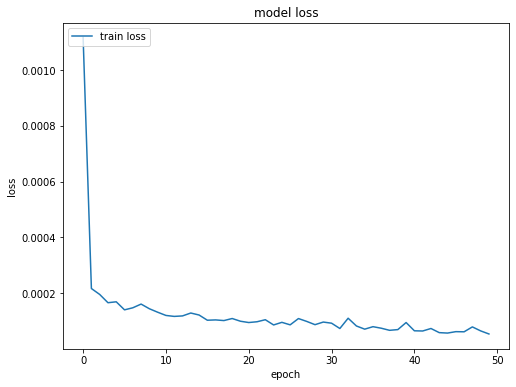

Normalized Rmse= 0.03300420661684625 RMSE= 83.26890763083642 MAPE= 0.03784814482297675
20   3


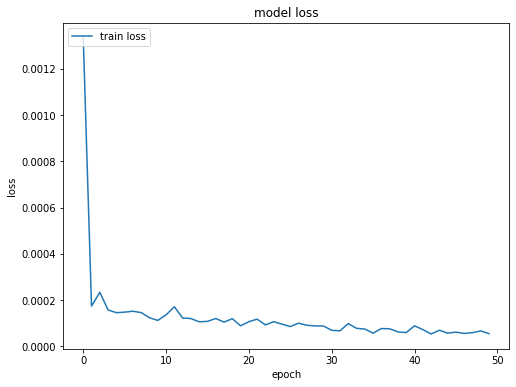

Normalized Rmse= 0.021973985284627764 RMSE= 55.43991151979397 MAPE= 0.02784808789630375
20   4


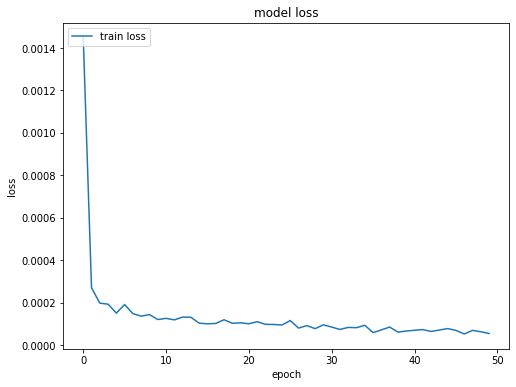

Normalized Rmse= 0.016534168014169386 RMSE= 41.715358444328295 MAPE= 0.018881941737380392
Mean Norm RMSE= 0.025500149702379255 Mean RMSE= 64.33634531490682 Mean MAPE= 0.028892828149704185
30   0


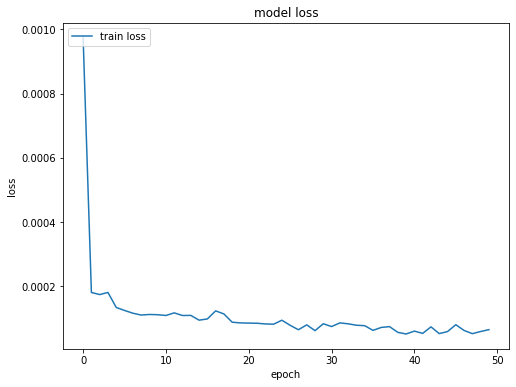

Normalized Rmse= 0.014884037025032763 RMSE= 37.55209531273938 MAPE= 0.012154121282432172
30   1


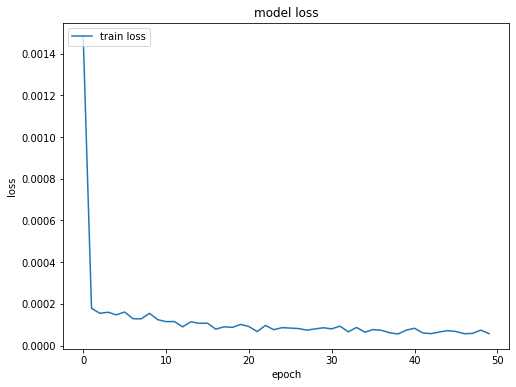

Normalized Rmse= 0.005006806452786169 RMSE= 12.632049936977479 MAPE= 0.005944057789355533
30   2


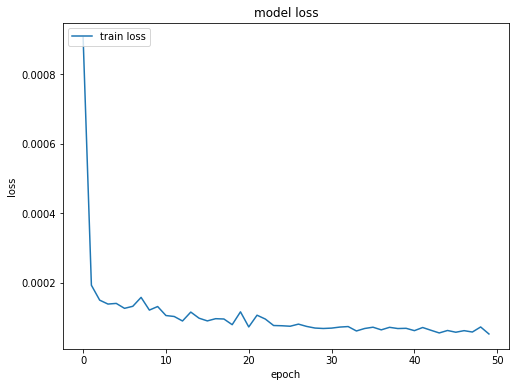

Normalized Rmse= 0.02679303707301895 RMSE= 67.59825282250351 MAPE= 0.031065522580894733
30   3


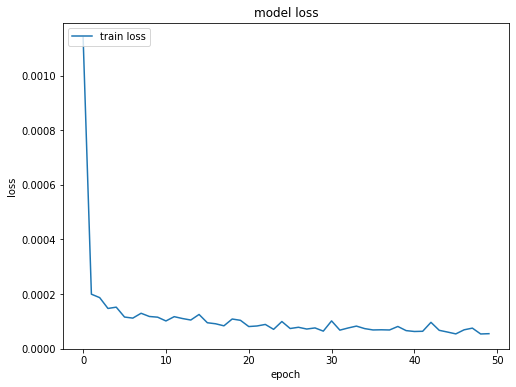

Normalized Rmse= 0.014562967199812047 RMSE= 36.74209071796408 MAPE= 0.013837859181495517
30   4


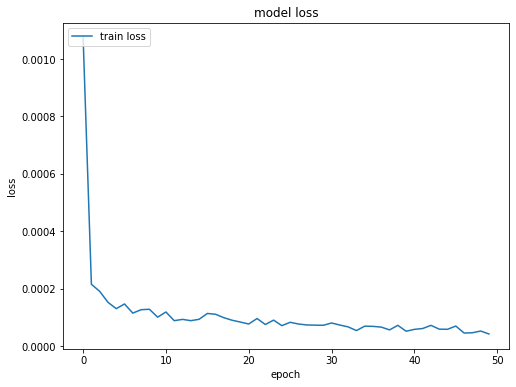

Normalized Rmse= 0.02818516033410502 RMSE= 71.1105746723236 MAPE= 0.03854871932367667
Mean Norm RMSE= 0.01788640161695099 Mean RMSE= 45.12701269250161 Mean MAPE= 0.020310056031570926
40   0


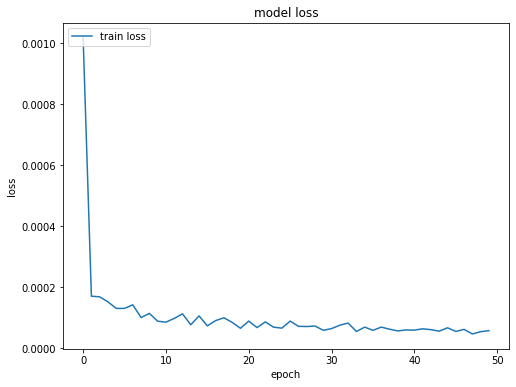

Normalized Rmse= 0.015374437671585727 RMSE= 38.78935712841831 MAPE= 0.02483771623035901
40   1


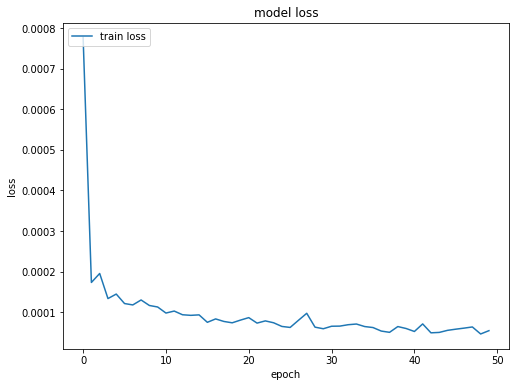

Normalized Rmse= 0.027455133569355118 RMSE= 69.26872012498035 MAPE= 0.038184882645733935
40   2


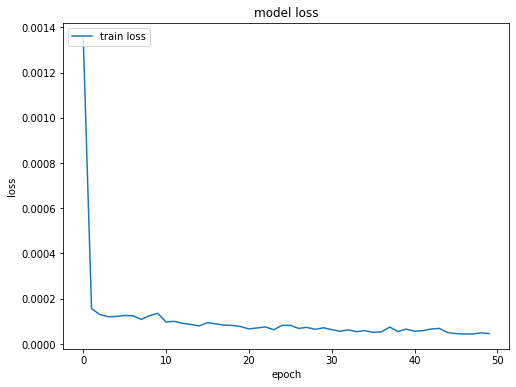

Normalized Rmse= 0.023826966473799276 RMSE= 60.1149593934622 MAPE= 0.02086484433671118
40   3


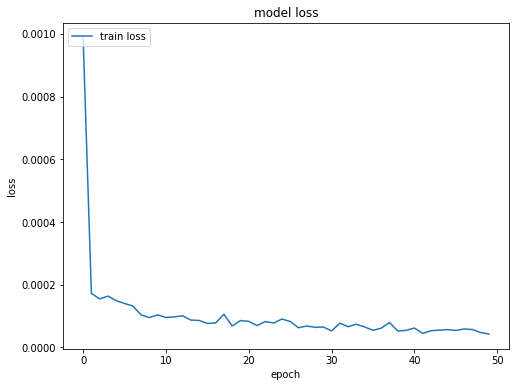

Normalized Rmse= 0.007776045112865007 RMSE= 19.61878409238871 MAPE= 0.00858785135582362
40   4


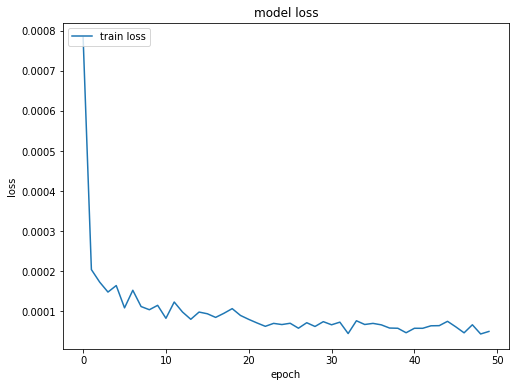

Normalized Rmse= 0.04485523673356085 RMSE= 113.16882076124799 MAPE= 0.06014713938338912
Mean Norm RMSE= 0.023857563912233194 Mean RMSE= 60.19212830009951 Mean MAPE= 0.03052448679040337
50   0


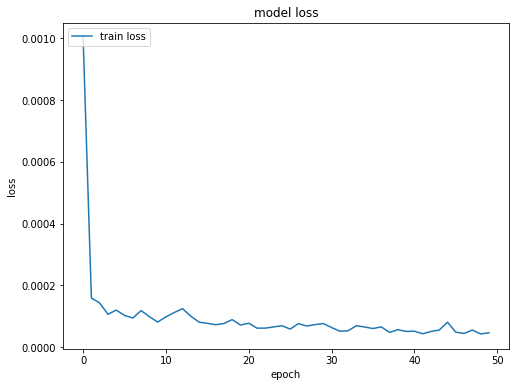

Normalized Rmse= 0.0054197822138047904 RMSE= 13.673967935513335 MAPE= 0.00838016973919675
50   1


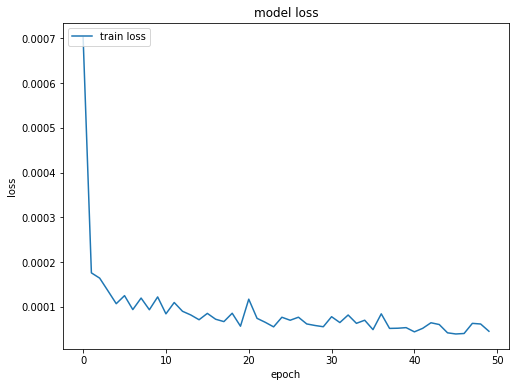

Normalized Rmse= 0.018974068965975678 RMSE= 47.871209716330966 MAPE= 0.021552421117694627
50   2


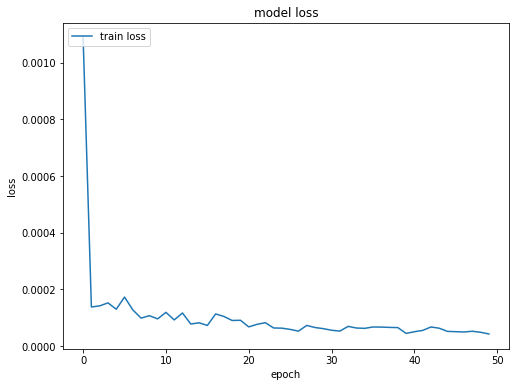

Normalized Rmse= 0.010048765294612912 RMSE= 25.352784135470156 MAPE= 0.01739114804866635
50   3


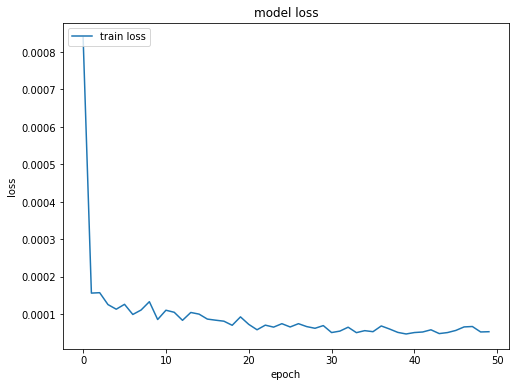

Normalized Rmse= 0.02536152475424834 RMSE= 63.986575784907 MAPE= 0.03247837856106414
50   4


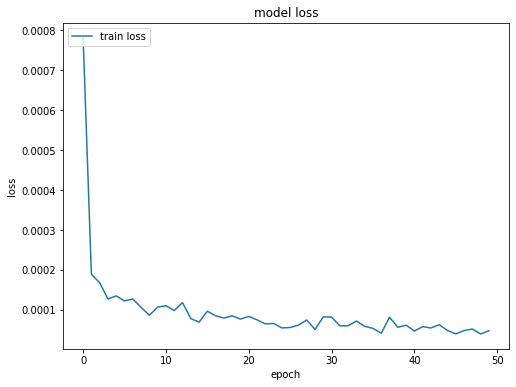

Normalized Rmse= 0.02648529502952938 RMSE= 66.8218326131431 MAPE= 0.03294174303456881
Mean Norm RMSE= 0.01725788725163422 Mean RMSE= 43.54127403707291 Mean MAPE= 0.022548772100238135
60   0


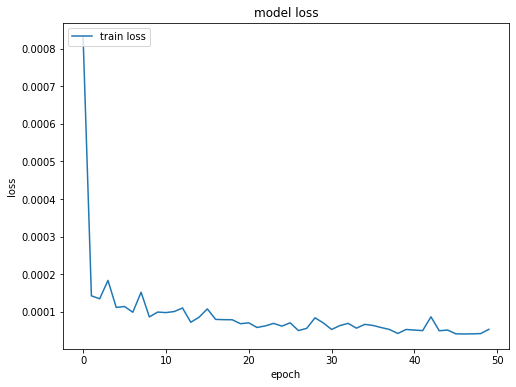

Normalized Rmse= 0.015033685065179443 RMSE= 37.9296728945847 MAPE= 0.01499597655326081
60   1


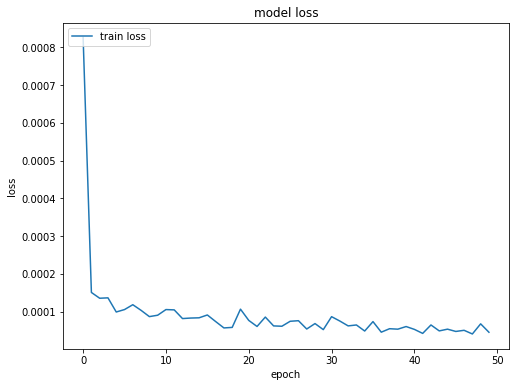

Normalized Rmse= 0.0067810346499827924 RMSE= 17.108373096068846 MAPE= 0.010356774710452007
60   2


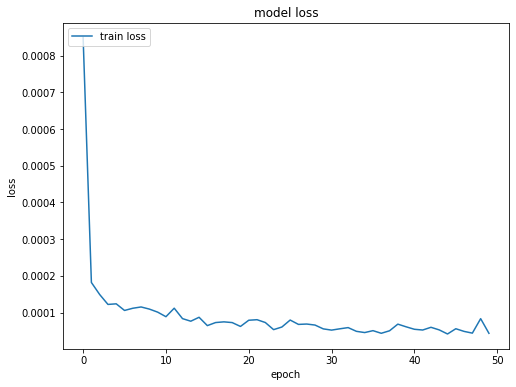

Normalized Rmse= 0.04945050667257497 RMSE= 124.76257793644899 MAPE= 0.06457576735186517
60   3


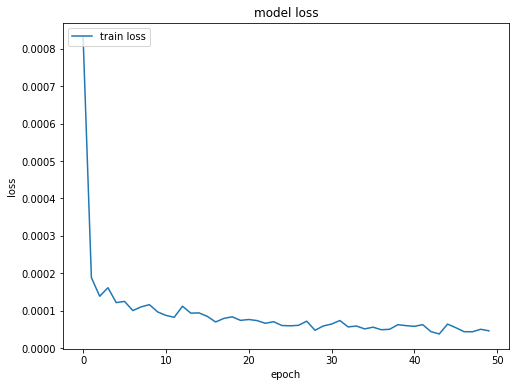

Normalized Rmse= 0.024409239363897956 RMSE= 61.58399774524823 MAPE= 0.033826326675377716
60   4


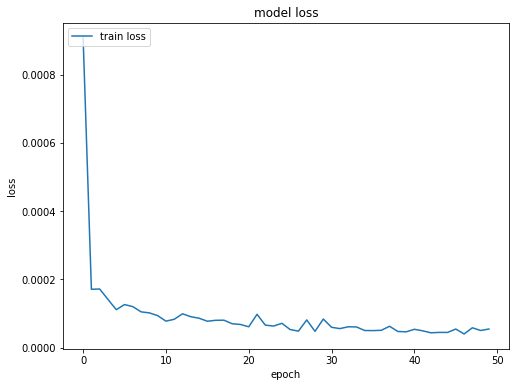

Normalized Rmse= 0.03454584069578047 RMSE= 87.15842589762218 MAPE= 0.044170549616720095
Mean Norm RMSE= 0.026044061289483122 Mean RMSE= 65.70860951399459 Mean MAPE= 0.03358507898153516
70   0


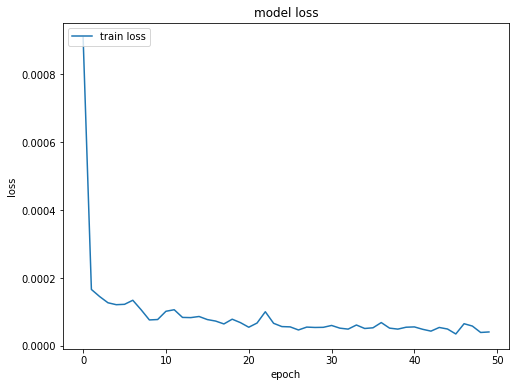

Normalized Rmse= 0.014140316877519165 RMSE= 35.6757168361054 MAPE= 0.016486807170814216
70   1


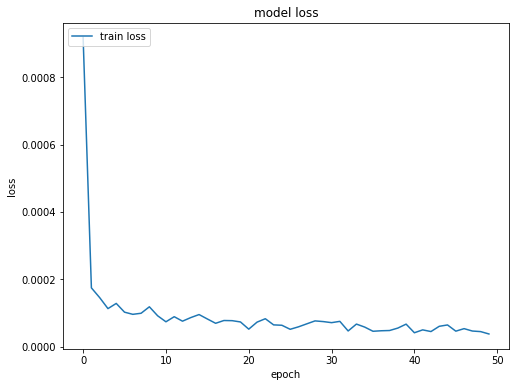

Normalized Rmse= 0.0065858424895186025 RMSE= 16.615910241346317 MAPE= 0.009826412348994682
70   2


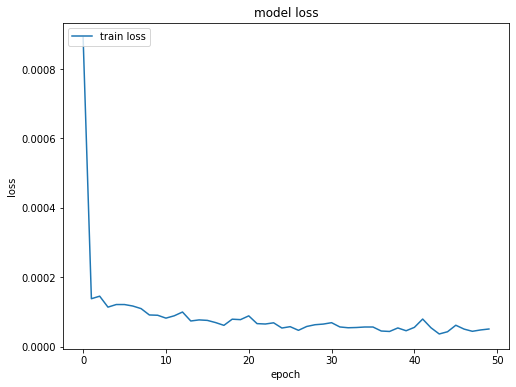

Normalized Rmse= 0.034175855194655304 RMSE= 86.22496915498655 MAPE= 0.04146980907334859
70   3


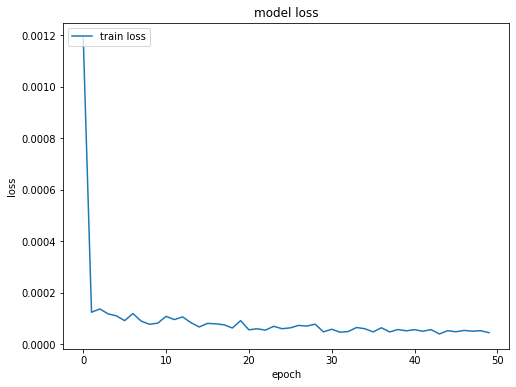

Normalized Rmse= 0.017752577380447953 RMSE= 44.789368290651296 MAPE= 0.016264167400572366
70   4


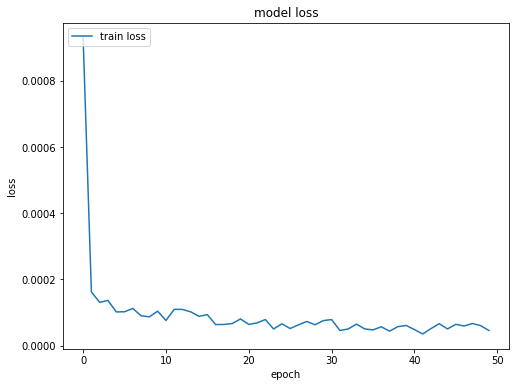

Normalized Rmse= 0.010954643125940761 RMSE= 27.638330203491183 MAPE= 0.011059355989896769
Mean Norm RMSE= 0.016721847013616356 Mean RMSE= 42.188858945316156 Mean MAPE= 0.019021310396725326
80   0


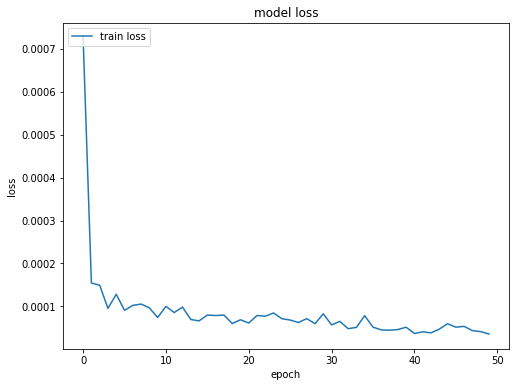

Normalized Rmse= 0.013635935074129732 RMSE= 34.40313997010408 MAPE= 0.023559999570301055
80   1


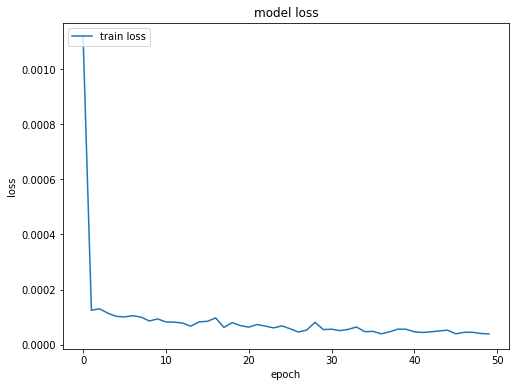

Normalized Rmse= 0.008229288828664302 RMSE= 20.762293525442548 MAPE= 0.007118906940396086
80   2


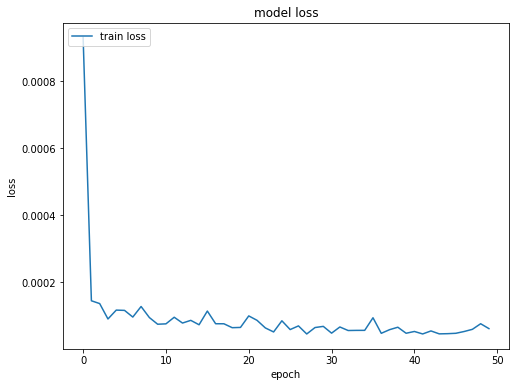

Normalized Rmse= 0.0029442648346212773 RMSE= 7.428294768473741 MAPE= 0.003550760927693224
80   3


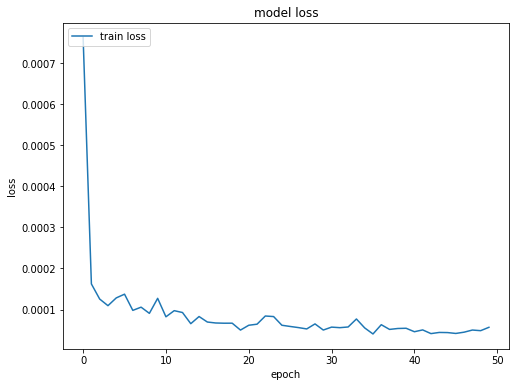

Normalized Rmse= 0.033640940152743805 RMSE= 84.87538056601441 MAPE= 0.041316576410223654
80   4


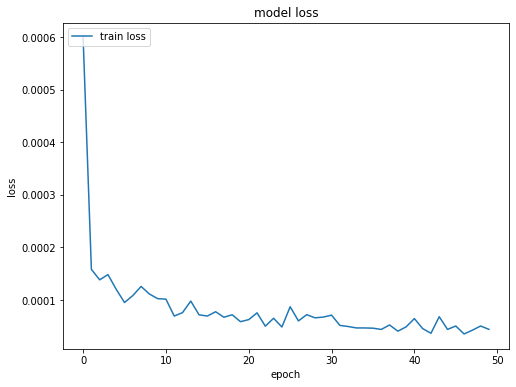

Normalized Rmse= 0.005771849138955706 RMSE= 14.562260169135902 MAPE= 0.005520052611475337
Mean Norm RMSE= 0.012844455605822962 Mean RMSE= 32.40627379983413 Mean MAPE= 0.016213259292017872
90   0


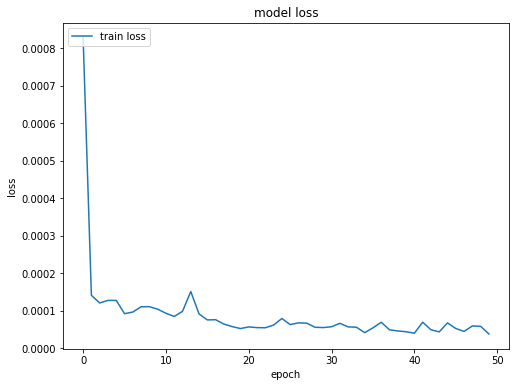

Normalized Rmse= 0.004445535348246325 RMSE= 11.215964625044291 MAPE= 0.005881765527802351
90   1


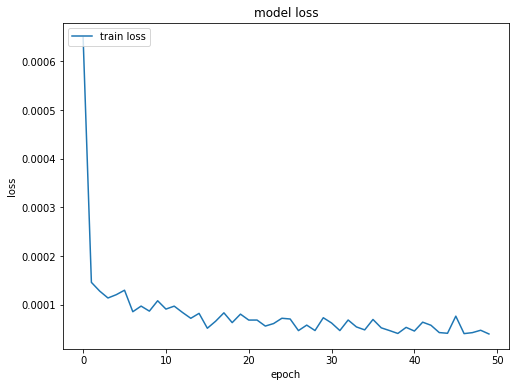

Normalized Rmse= 0.018423857690186826 RMSE= 46.483000788139385 MAPE= 0.015779136679069182
90   2


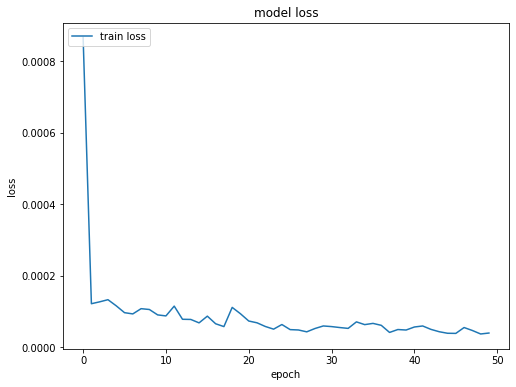

Normalized Rmse= 0.004525707407628061 RMSE= 11.418261863364586 MAPE= 0.004171392451358771
90   3


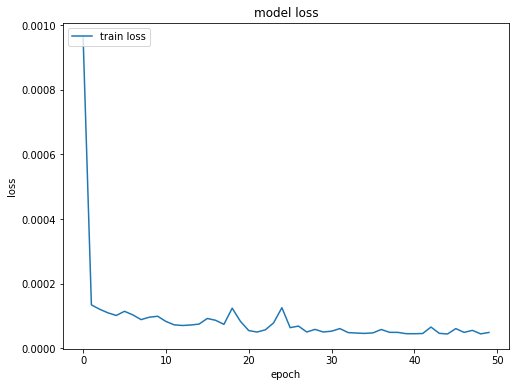

Normalized Rmse= 0.003587479410443776 RMSE= 9.05110283642867 MAPE= 0.004841885125664524
90   4


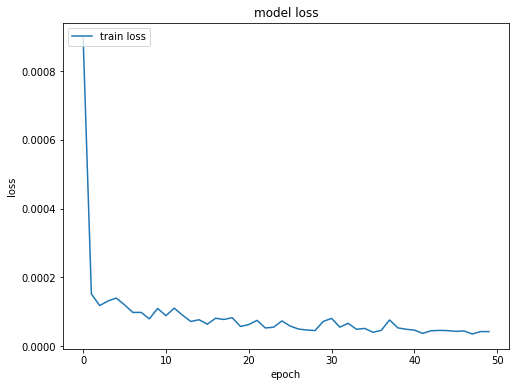

Normalized Rmse= 0.01775100055231898 RMSE= 44.7853869593641 MAPE= 0.01607438624250729
Mean Norm RMSE= 0.009746716081764795 Mean RMSE= 24.590743414468204 Mean MAPE= 0.009349713205280424
100   0


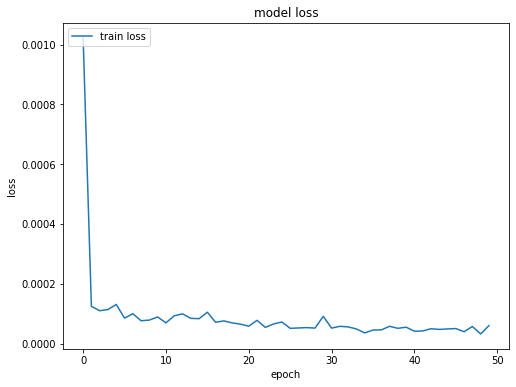

Normalized Rmse= 0.023724248855927766 RMSE= 59.85581097339994 MAPE= 0.027569639506655703
100   1


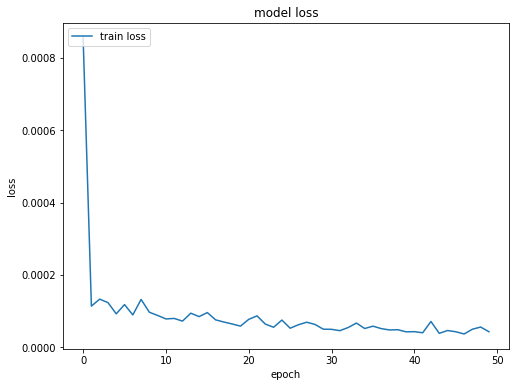

Normalized Rmse= 0.004746181259826715 RMSE= 11.974497984529336 MAPE= 0.00707535187781064
100   2


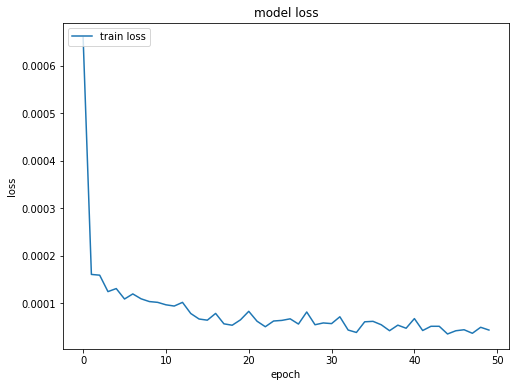

Normalized Rmse= 0.007756034963115627 RMSE= 19.56827624714433 MAPE= 0.013163800564881903
100   3


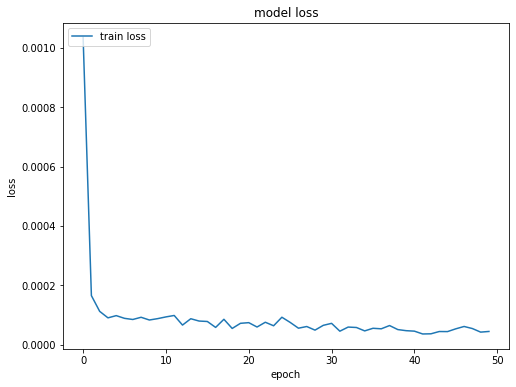

Normalized Rmse= 0.003885837786642958 RMSE= 9.80384815194843 MAPE= 0.00521442738909212
100   4


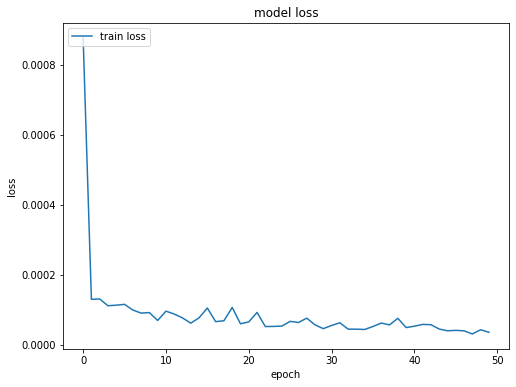

Normalized Rmse= 0.0074856354243766085 RMSE= 18.886093662385502 MAPE= 0.005734465410875525
Mean Norm RMSE= 0.009519587657977934 Mean RMSE= 24.017705403881507 Mean MAPE= 0.011751536949863178
110   0


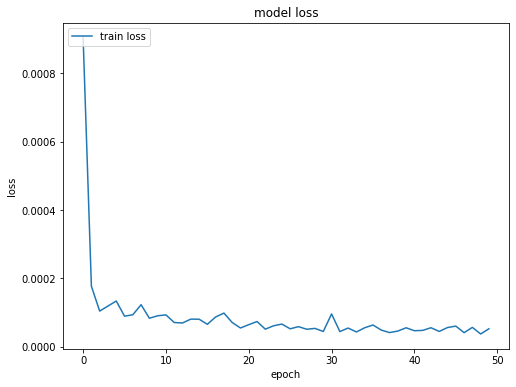

Normalized Rmse= 0.020160627270218143 RMSE= 50.86482928346447 MAPE= 0.02107253469251148
110   1


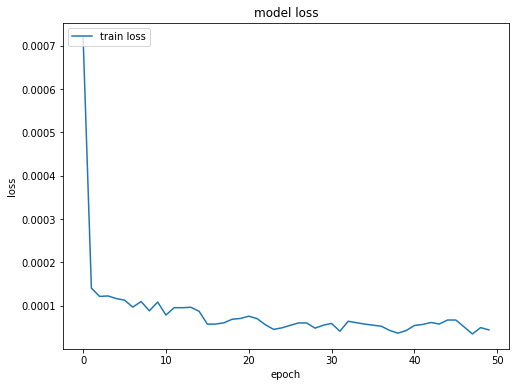

Normalized Rmse= 0.015181456500716084 RMSE= 38.302478643073115 MAPE= 0.013423135047960739
110   2


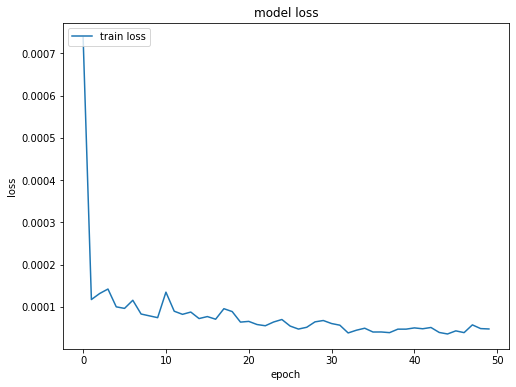

Normalized Rmse= 0.051109195720361454 RMSE= 128.94740986770293 MAPE= 0.06409408630216674
110   3


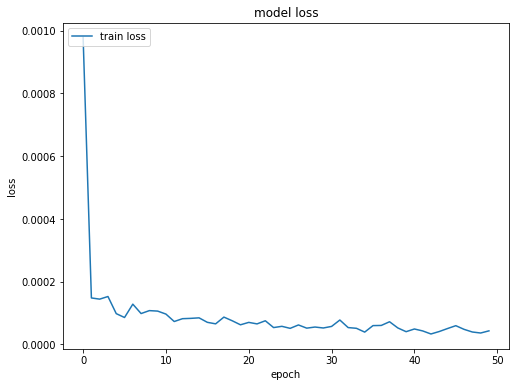

Normalized Rmse= 0.02439831387148182 RMSE= 61.556423714459704 MAPE= 0.026983870800977895
110   4


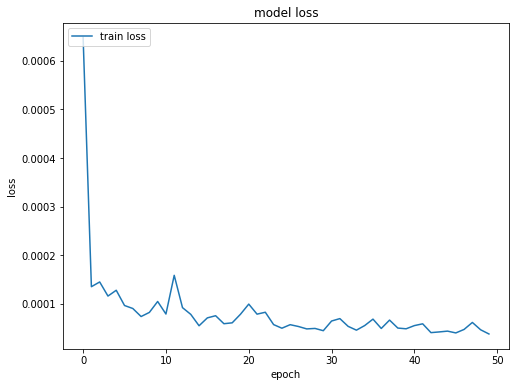

Normalized Rmse= 0.020527149379672576 RMSE= 51.789561082600635 MAPE= 0.022870766058398908
Mean Norm RMSE= 0.026275348548490018 Mean RMSE= 66.29214051826017 Mean MAPE= 0.029688878580403155
120   0


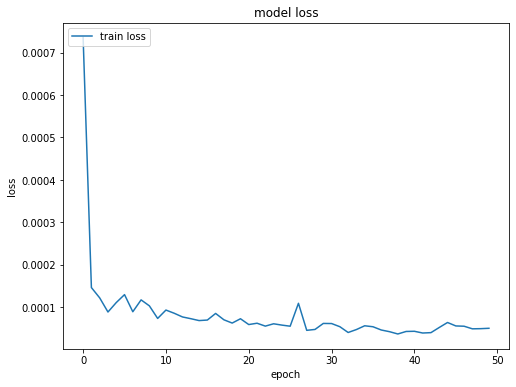

Normalized Rmse= 0.011767610081304792 RMSE= 29.689417644319548 MAPE= 0.009713351577220019
120   1


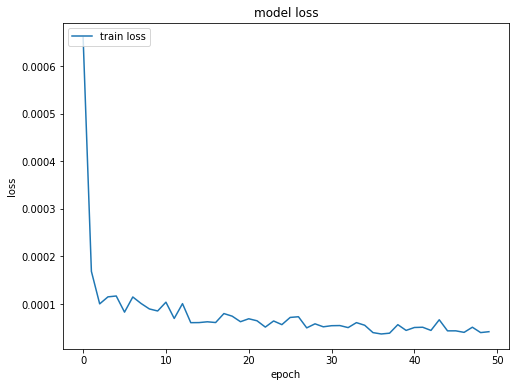

Normalized Rmse= 0.007270784576535094 RMSE= 18.343997777613254 MAPE= 0.012183514624044987
120   2


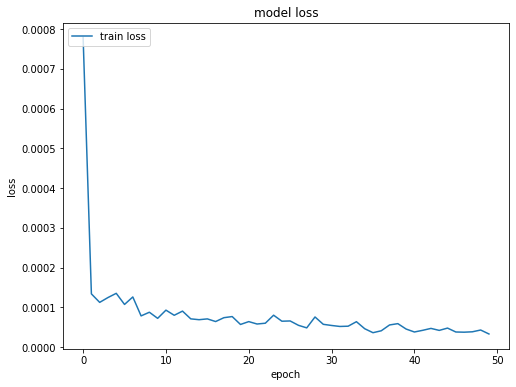

Normalized Rmse= 0.024090071632469384 RMSE= 60.778743330302625 MAPE= 0.02604969569414293
120   3


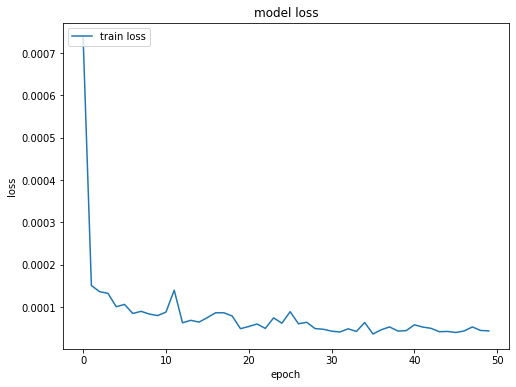

Normalized Rmse= 0.01861494848352418 RMSE= 46.96511305302441 MAPE= 0.02142964689178287
120   4


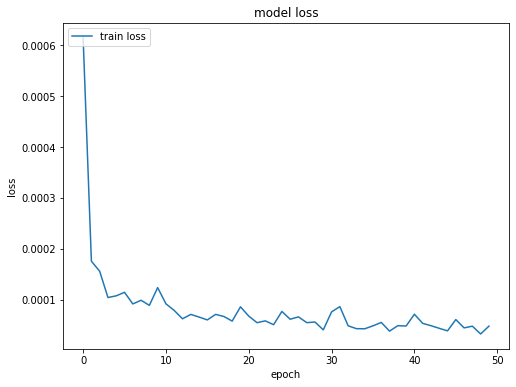

Normalized Rmse= 0.021747028953700124 RMSE= 54.867293921730024 MAPE= 0.02561762013159425
Mean Norm RMSE= 0.016698088745506715 Mean RMSE= 42.12891314539797 Mean MAPE= 0.01899876578375701
130   0


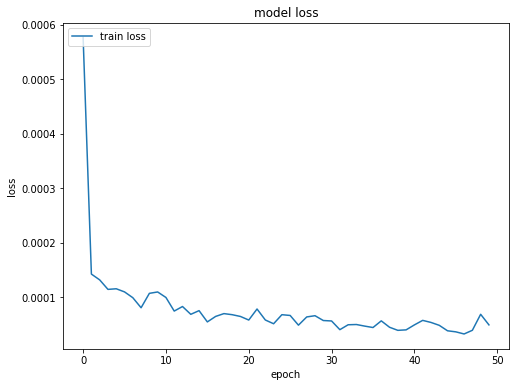

Normalized Rmse= 0.06667366090574307 RMSE= 168.2162269869419 MAPE= 0.0863738372485987
130   1


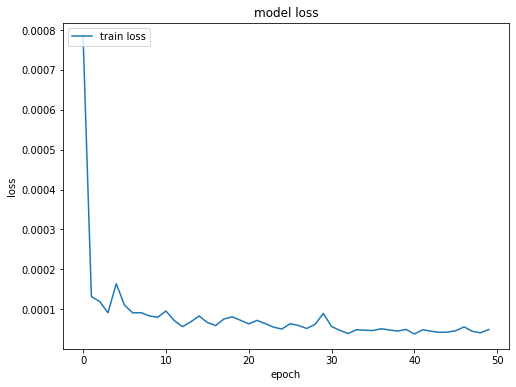

Normalized Rmse= 0.009310088088792854 RMSE= 23.489151766069718 MAPE= 0.009252977113927724
130   2


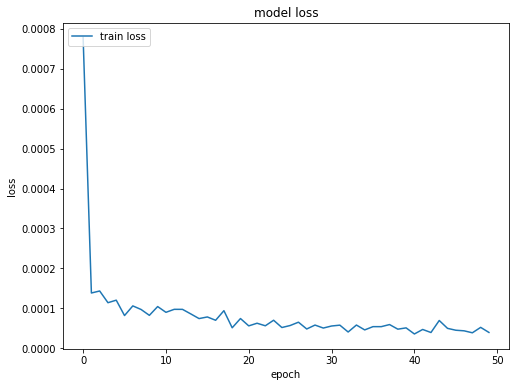

Normalized Rmse= 0.02206834475348337 RMSE= 55.677958151472694 MAPE= 0.022052297842180504
130   3


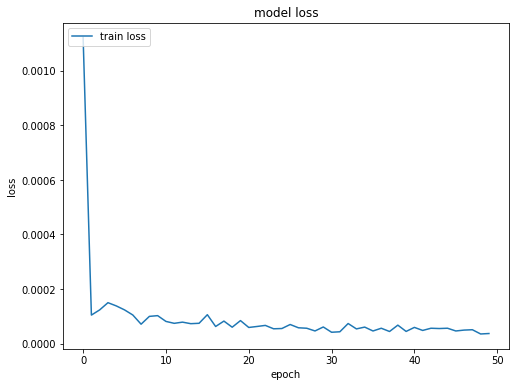

Normalized Rmse= 0.024953085109168743 RMSE= 62.956119086688425 MAPE= 0.03164936742900982
130   4


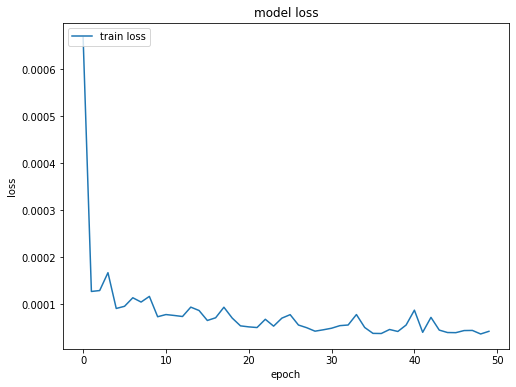

Normalized Rmse= 0.01698465972224087 RMSE= 42.851927458427426 MAPE= 0.014462738880059924
Mean Norm RMSE= 0.02799796771588578 Mean RMSE= 70.63827668992003 Mean MAPE= 0.03275824370275533
140   0


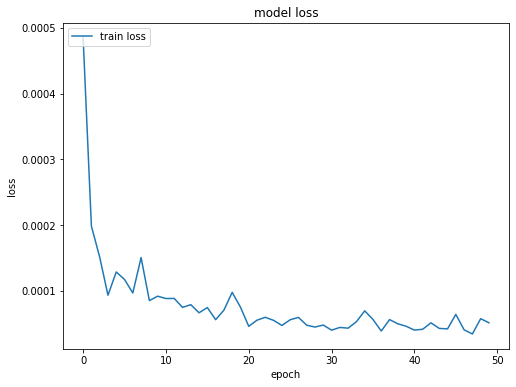

Normalized Rmse= 0.051315727087598455 RMSE= 129.46848248551697 MAPE= 0.06523405606607786
140   1


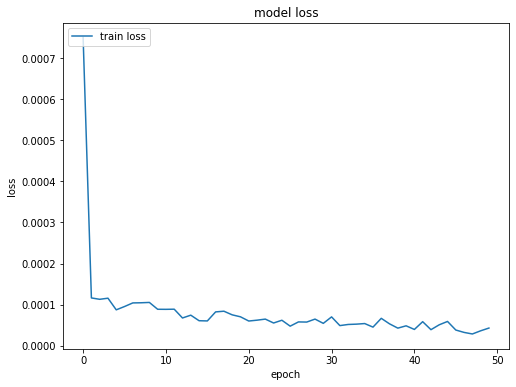

Normalized Rmse= 0.006912308360675091 RMSE= 17.439561833462015 MAPE= 0.01178735199889794
140   2


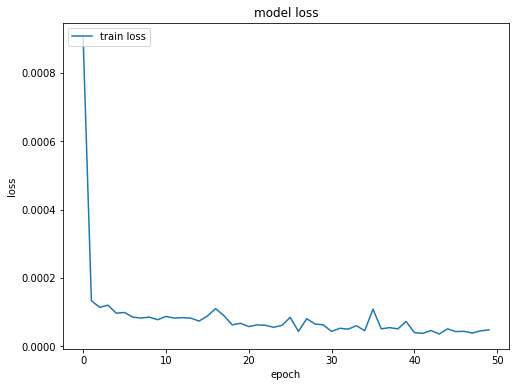

Normalized Rmse= 0.0051385467513067095 RMSE= 12.964401541532673 MAPE= 0.008090600720450777
140   3


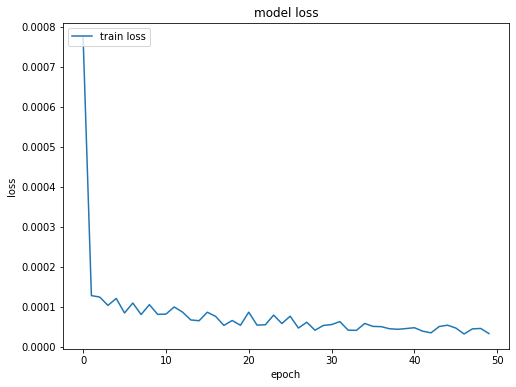

Normalized Rmse= 0.014208951608815003 RMSE= 35.84888052934065 MAPE= 0.0121208904149582
140   4


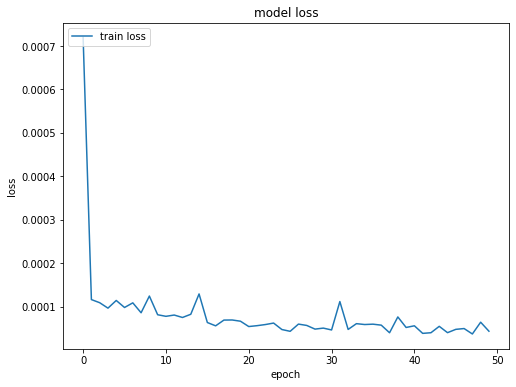

Normalized Rmse= 0.007941619908110252 RMSE= 20.036519581395595 MAPE= 0.007301904552757449
Mean Norm RMSE= 0.017103430743301104 Mean RMSE= 43.15156919424958 Mean MAPE= 0.020906960750628444
150   0


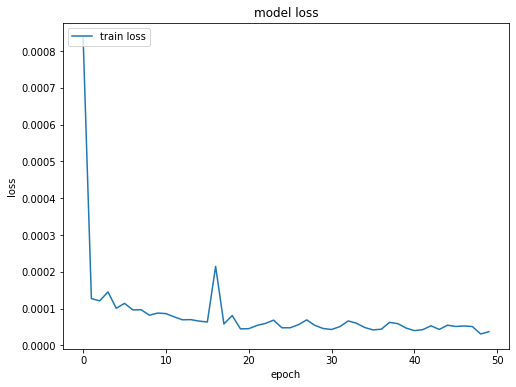

Normalized Rmse= 0.04164645396589149 RMSE= 105.07311230991971 MAPE= 0.0495835293879855
150   1


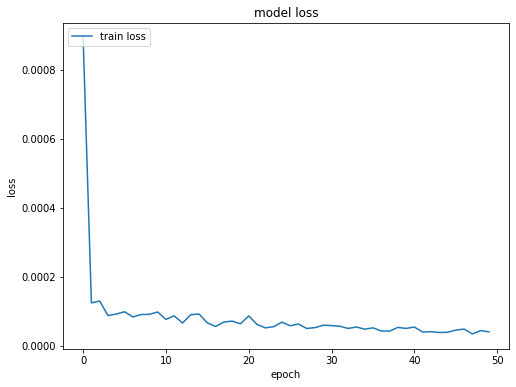

Normalized Rmse= 0.007788504220189894 RMSE= 19.65020281860276 MAPE= 0.010082355562314913
150   2


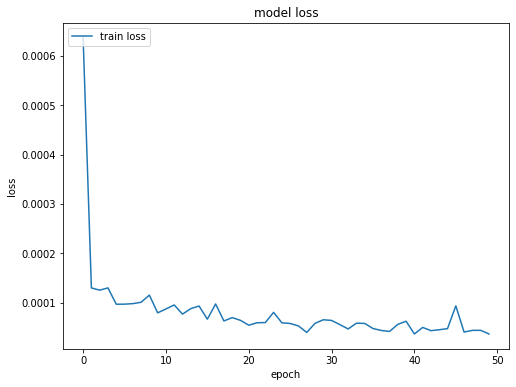

Normalized Rmse= 0.010825013646293935 RMSE= 27.31128148878568 MAPE= 0.009102494906646063
150   3


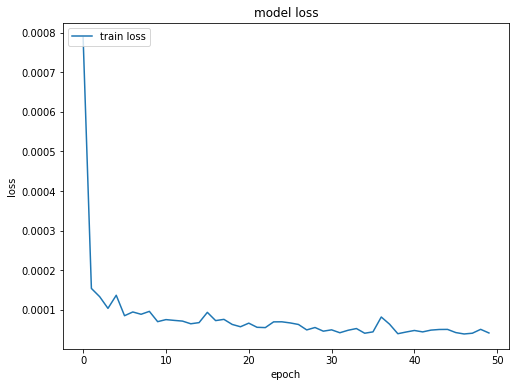

Normalized Rmse= 0.019259790607891524 RMSE= 48.59203076604769 MAPE= 0.016130017321773882
150   4


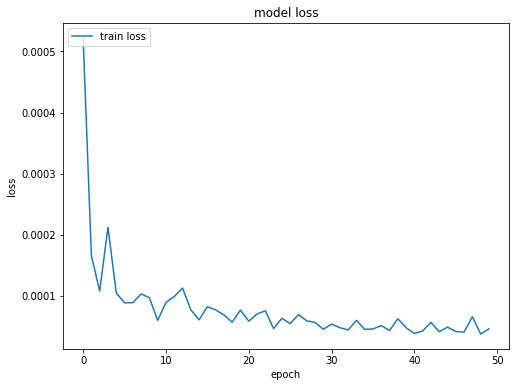

Normalized Rmse= 0.020824795064081705 RMSE= 52.54054418536167 MAPE= 0.02066290548238574
Mean Norm RMSE= 0.02006891150086971 Mean RMSE= 50.6334343137435 Mean MAPE= 0.02111226053222122
160   0


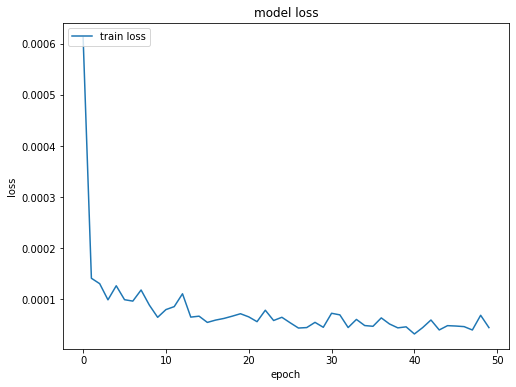

Normalized Rmse= 0.010530076015054651 RMSE= 26.56714544003642 MAPE= 0.009233142939949274
160   1


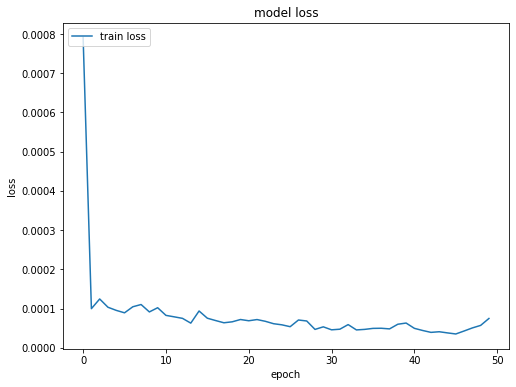

Normalized Rmse= 0.04548790848826801 RMSE= 114.76499998496102 MAPE= 0.07068695177964354
160   2


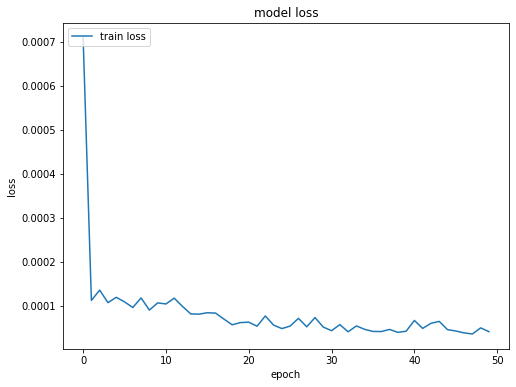

Normalized Rmse= 0.014282356439468367 RMSE= 36.03407631550606 MAPE= 0.01217361713793854
160   3


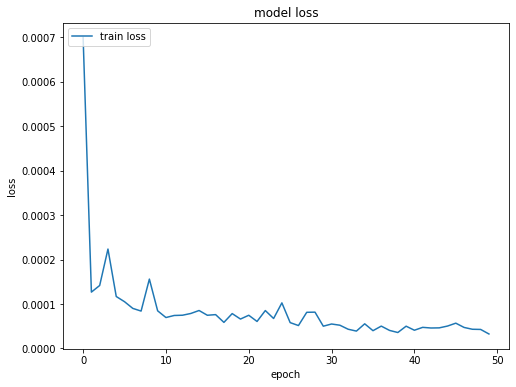

Normalized Rmse= 0.0326266326921754 RMSE= 82.31629842784542 MAPE= 0.038652146350752654
160   4


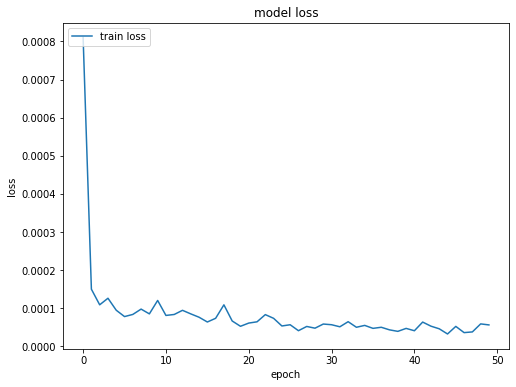

Normalized Rmse= 0.006259849407399668 RMSE= 15.793447914895104 MAPE= 0.005024308605448115
Mean Norm RMSE= 0.02183736460847322 Mean RMSE= 55.09519361664881 Mean MAPE= 0.02715403336274642
170   0


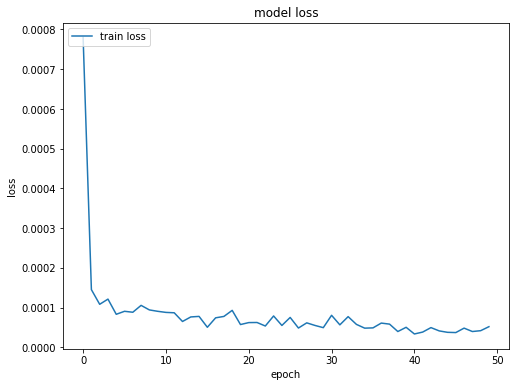

Normalized Rmse= 0.04164511817004159 RMSE= 105.069741296631 MAPE= 0.05004751543068721
170   1


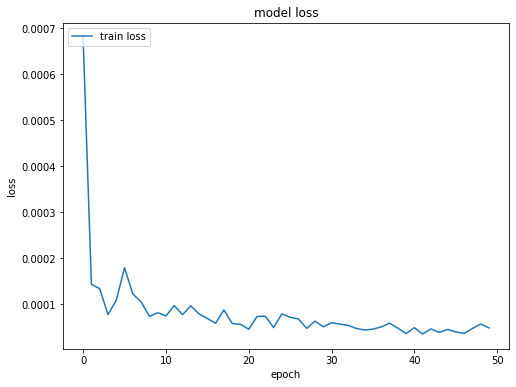

Normalized Rmse= 0.02796368743494814 RMSE= 70.55178934755546 MAPE= 0.03703591051896937
170   2


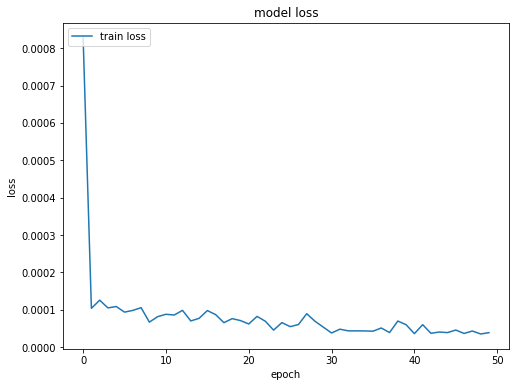

Normalized Rmse= 0.009328792712016016 RMSE= 23.536344856262566 MAPE= 0.007331449869439186
170   3


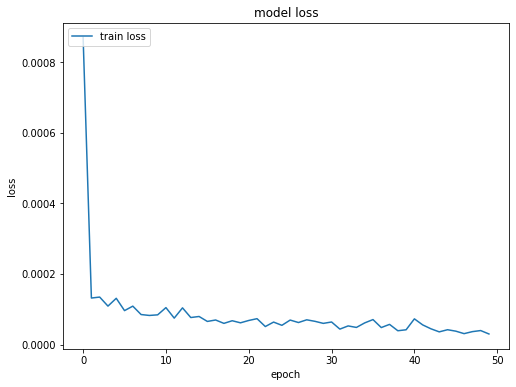

Normalized Rmse= 0.005130528299827537 RMSE= 12.944185088882335 MAPE= 0.007277530103531792
170   4


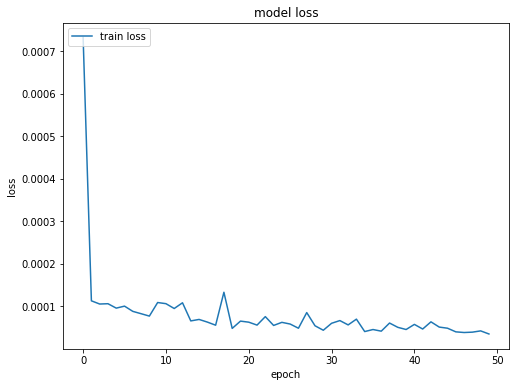

Normalized Rmse= 0.02050690915825423 RMSE= 51.73847819819772 MAPE= 0.020838125135991262
Mean Norm RMSE= 0.0209150071550175 Mean RMSE= 52.76810775750581 Mean MAPE= 0.024506106211723767
180   0


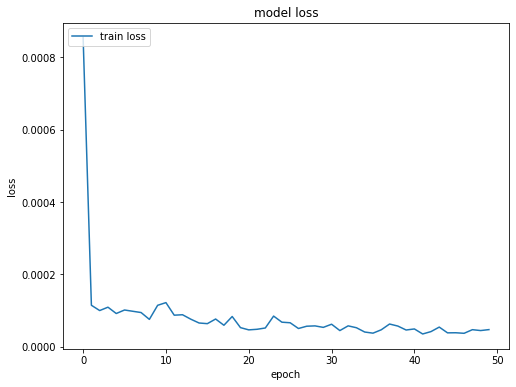

Normalized Rmse= 0.013022242756141491 RMSE= 32.85483924088217 MAPE= 0.014027475028411621
180   1


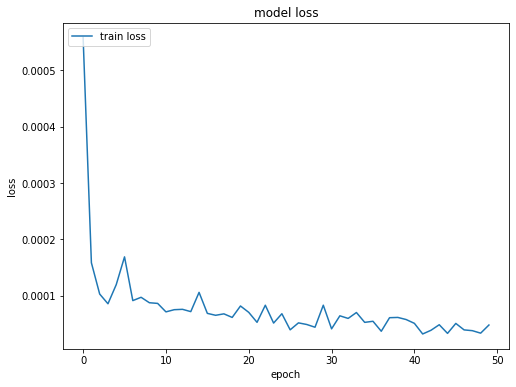

Normalized Rmse= 0.016068232179610488 RMSE= 40.539775067648826 MAPE= 0.01892546360405613
180   2


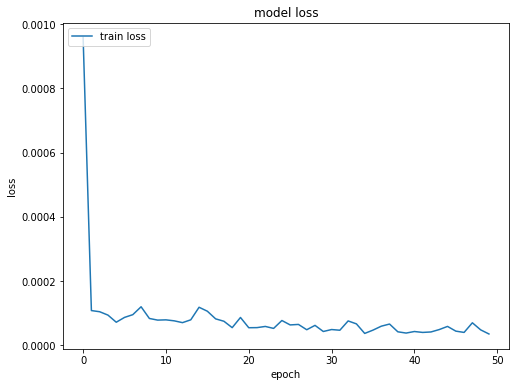

Normalized Rmse= 0.02639582131725138 RMSE= 66.59610126776724 MAPE= 0.0289610699061209
180   3


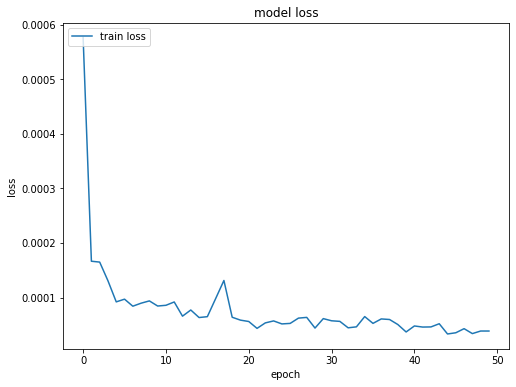

Normalized Rmse= 0.01737228377336108 RMSE= 43.82988997409898 MAPE= 0.018042873375236457
180   4


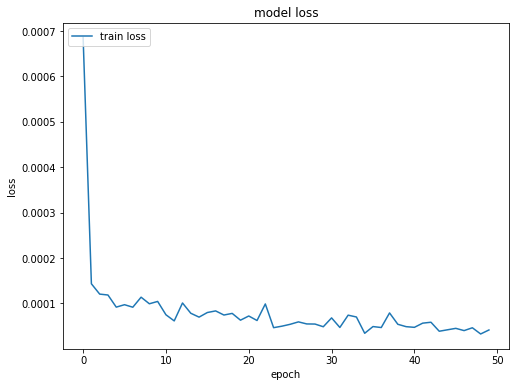

Normalized Rmse= 0.020929612237882037 RMSE= 52.805001191125875 MAPE= 0.02035734346888732
Mean Norm RMSE= 0.018757638452849296 Mean RMSE= 47.32512134830462 Mean MAPE= 0.020062845076542483
190   0


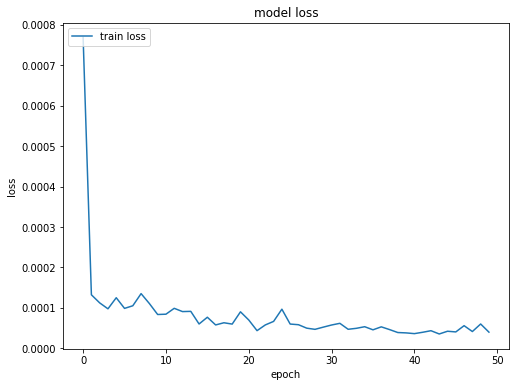

Normalized Rmse= 0.006269228384264673 RMSE= 15.817095496522606 MAPE= 0.010055215235298483
190   1


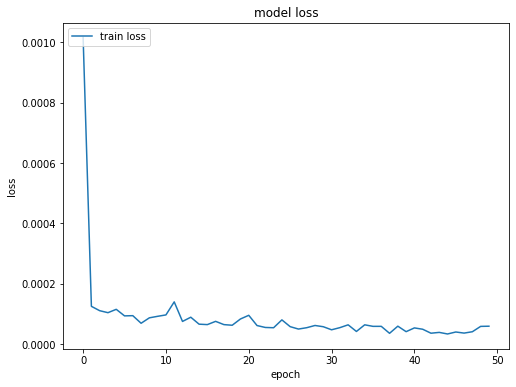

Normalized Rmse= 0.014251743795813513 RMSE= 35.956823113712865 MAPE= 0.023574731881451146
190   2


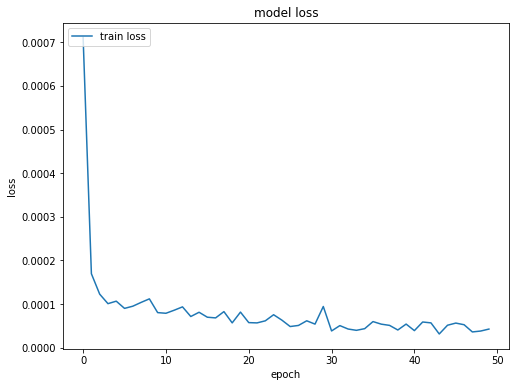

Normalized Rmse= 0.012468066019452143 RMSE= 31.456640465407645 MAPE= 0.02159441608029587
190   3


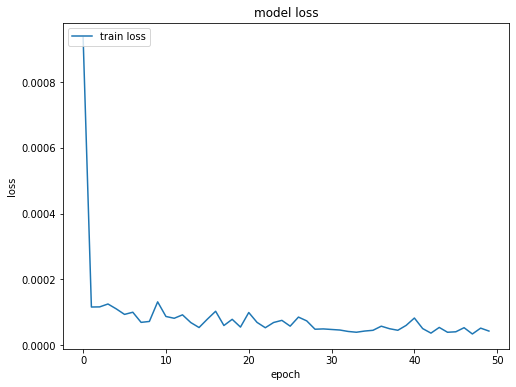

Normalized Rmse= 0.025337741519288807 RMSE= 63.926581011054225 MAPE= 0.02549551874377273
190   4


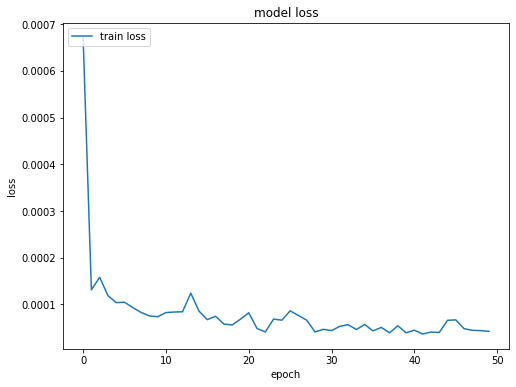

Normalized Rmse= 0.008073095082689318 RMSE= 20.368236349779252 MAPE= 0.0062390215397046655
Mean Norm RMSE= 0.01327997496030169 Mean RMSE= 33.50507528729531 Mean MAPE= 0.01739178069610458


In [14]:
#model GRU2
for m in range(20,200,10):
  av_rmse=0
  av_rmse1=0
  av_mape=0
  for i in range(5):
    print(m, ' ',i)
    GRU2 = Sequential()
    GRU2.add(GRU(m, input_shape=(30, 1),return_sequences=True))
    GRU2.add(Dropout(0.2))
    GRU2.add(GRU(m, input_shape=(30, 1)),)
    GRU2.add(Dense(units = 512, activation = 'tanh'))
    GRU2.add(Dropout(0.2))
    GRU2.add(Dense(units = 1, activation = 'linear'))
    #GRU2.summary()
    #plot_model(GRU2, to_file='model_plot5.png', show_shapes=True, show_layer_names=True)

    GRU2.compile(loss='mse', optimizer='adam')

    history=GRU2.fit(x_train,y_train,epochs=50,batch_size=10, verbose=0)

    y_test_pred=GRU2.predict(x_test)
    y_train_pred=GRU2.predict(x_train) 

    rmse=mean_squared_error(y_test,y_test_pred,squared=False)
    av_rmse=av_rmse+rmse
    y_test_pred_nn=sca.inverse_transform(y_test_pred)
    y_train_pred_nn=sca.inverse_transform(y_train_pred)
    y_test_nn=sca.inverse_transform(y_test)
    rmse1=mean_squared_error(y_test_nn,y_test_pred_nn,squared=False)
    mape=mean_absolute_percentage_error(y_test,y_test_pred)
    av_rmse1=av_rmse1+rmse1
    av_mape=av_mape+mape
    GRU2.reset_states()
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train loss'], loc='upper left')
    plt.show()
    print('Normalized Rmse=',rmse, 'RMSE=',rmse1,'MAPE=',mape)

  print('Mean Norm RMSE=',av_rmse/5,'Mean RMSE=',av_rmse1/5,'Mean MAPE=',av_mape/5)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


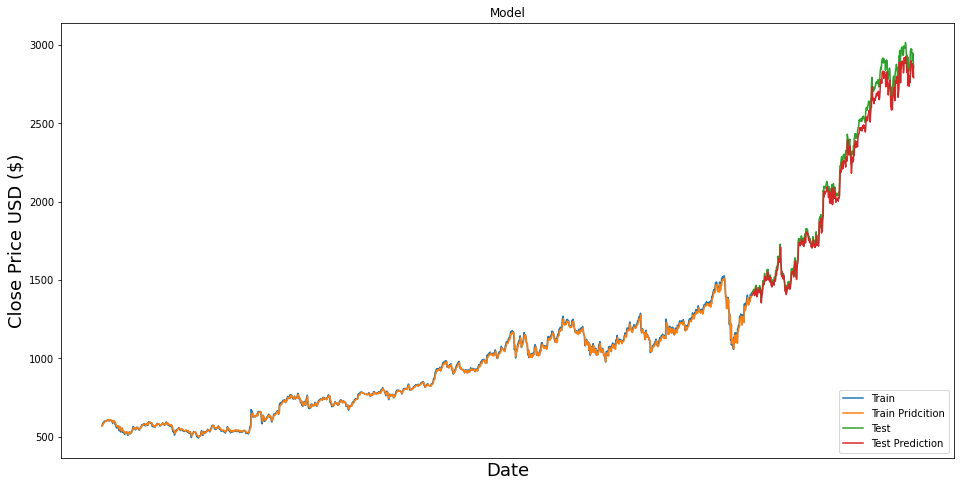

In [ ]:
train=data_close[window_size:split_index+window_size]
valid=data_close[split_index+window_size:]

train['Prediction'] =y_train_pred_nn
valid['Prediction'] =y_test_pred_nn


#Visualize the data
#print(valid)
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train[['Close','Prediction']])
plt.plot(valid[['Close', 'Prediction']])
plt.gca().xaxis.set_major_locator(mdp.DayLocator(interval=120))
plt.legend(['Train', 'Train Pridcition','Test', 'Test Prediction'], loc='lower right')
plt.show()
#valid.head()

10   0


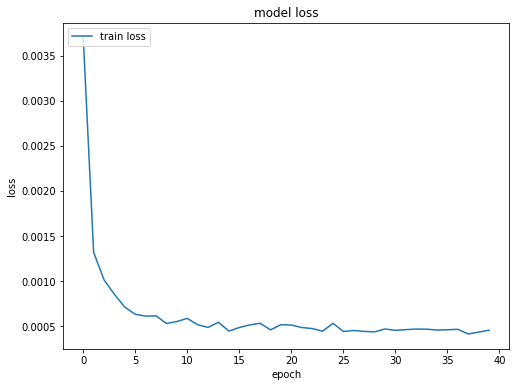

Normalized Rmse= 0.1283695370695806 RMSE= 323.8736280031349 MAPE= 0.13883873092695537
10   1


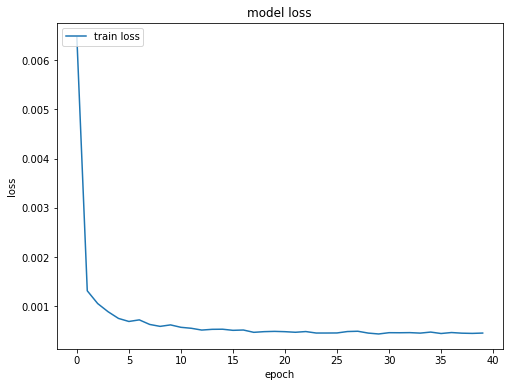

Normalized Rmse= 0.10781626189401376 RMSE= 272.01814732208265 MAPE= 0.10427257602964848
10   2


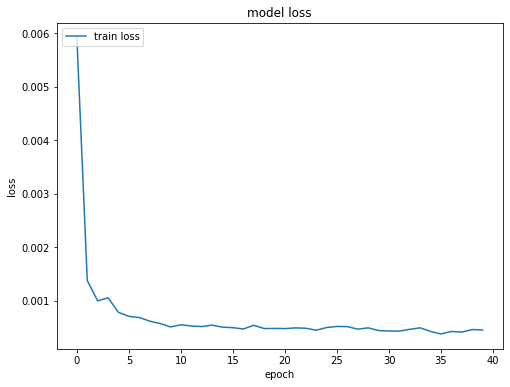

Normalized Rmse= 0.10272099582875151 RMSE= 259.16290139998506 MAPE= 0.10122143118530565
10   3


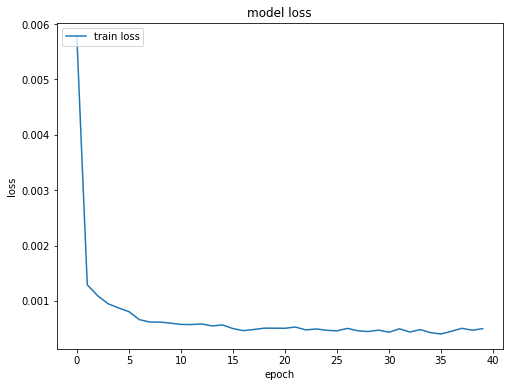

Normalized Rmse= 0.09816381270630205 RMSE= 247.6652300832018 MAPE= 0.09916374721544231
10   4


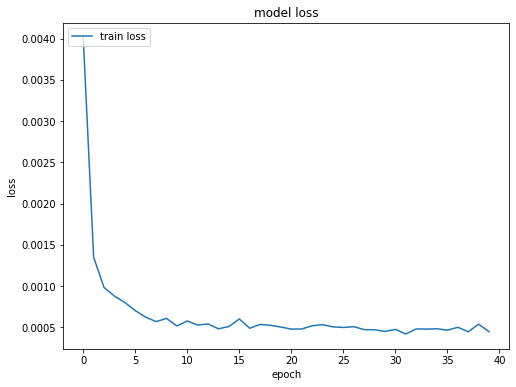

Normalized Rmse= 0.09551665032237677 RMSE= 240.98649169608555 MAPE= 0.08869460875141769
Mean Norm RMSE= 0.10651745156420493 Mean RMSE= 268.74127970089796 Mean MAPE= 0.1064382188217539
20   0


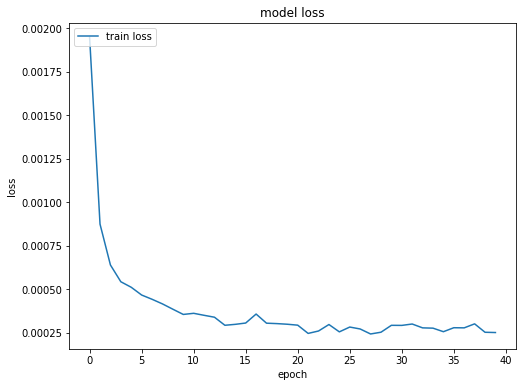

Normalized Rmse= 0.03322052597395816 RMSE= 83.81465914928751 MAPE= 0.02966899065626301
20   1


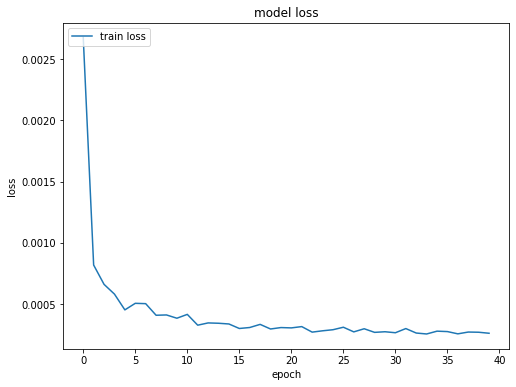

Normalized Rmse= 0.0684987000702223 RMSE= 172.82078488911185 MAPE= 0.06628681811323602
20   2


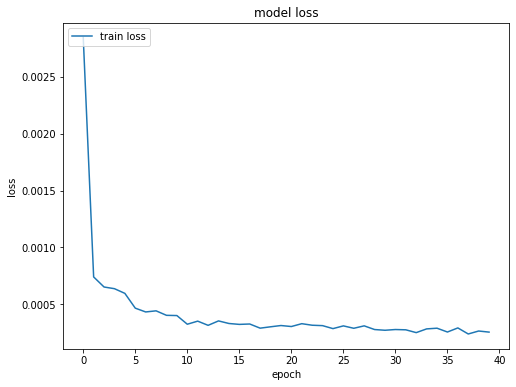

Normalized Rmse= 0.11132381421491568 RMSE= 280.8676266015792 MAPE= 0.13224676872288518
20   3


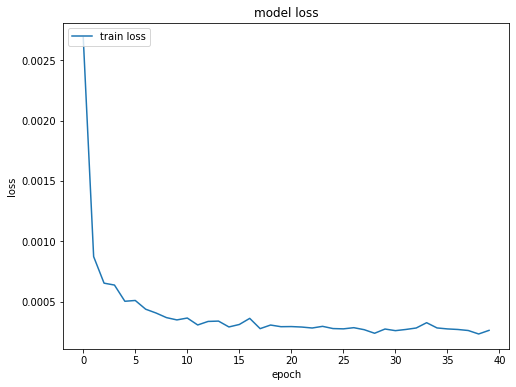

Normalized Rmse= 0.07882852712174991 RMSE= 198.88272071546052 MAPE= 0.08454237495905731
20   4


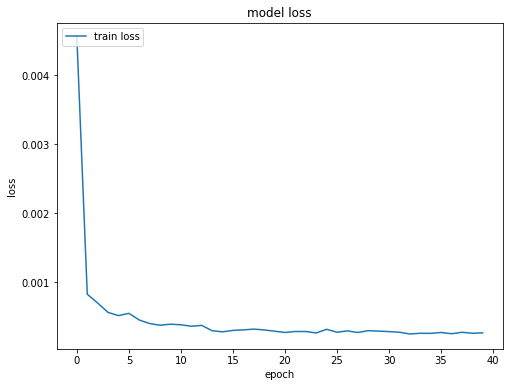

Normalized Rmse= 0.0851542979681852 RMSE= 214.8425016257755 MAPE= 0.0930888010587874
Mean Norm RMSE= 0.07540517306980625 Mean RMSE= 190.24565859624292 Mean MAPE= 0.08116675070204579
30   0


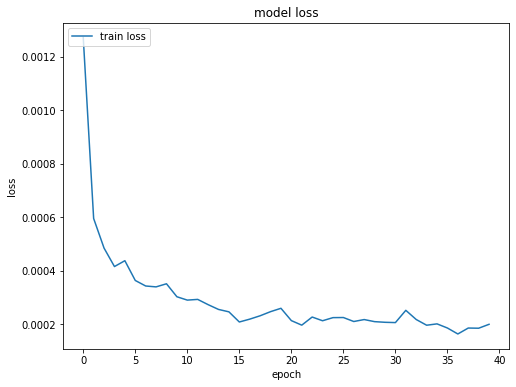

Normalized Rmse= 0.09290861383841346 RMSE= 234.40647473838828 MAPE= 0.10885567839151622
30   1


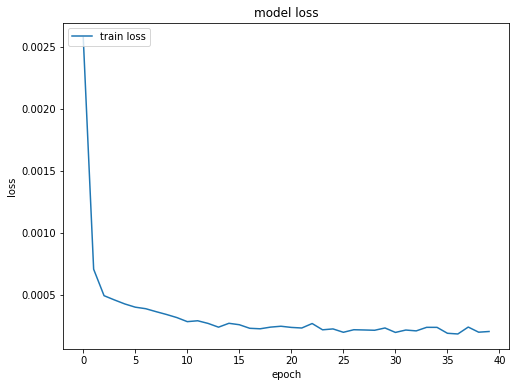

Normalized Rmse= 0.03549880754294741 RMSE= 89.5627334514532 MAPE= 0.03165300781695889
30   2


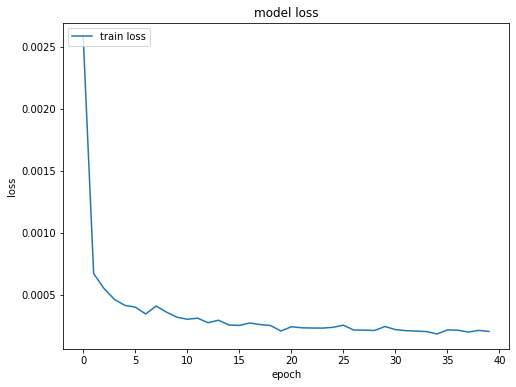

Normalized Rmse= 0.06893290789703914 RMSE= 173.91624944591968 MAPE= 0.07093327333261015
30   3


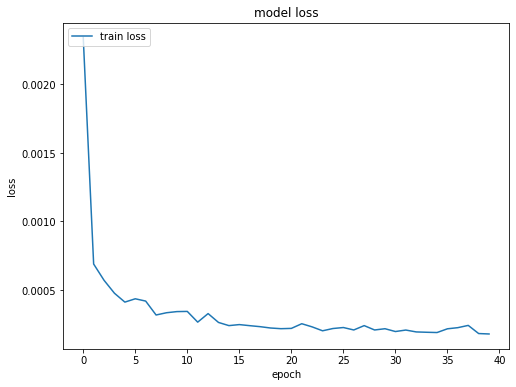

Normalized Rmse= 0.05203717082312455 RMSE= 131.28866809315724 MAPE= 0.05447748555184072
30   4


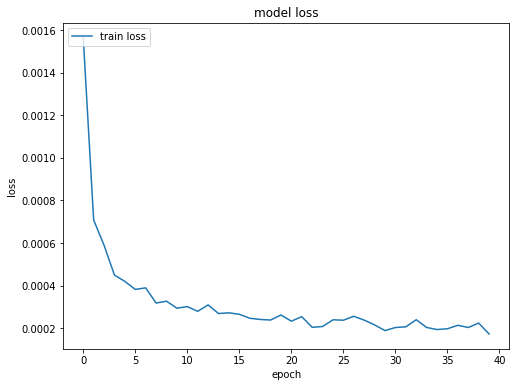

Normalized Rmse= 0.05893451477491019 RMSE= 148.6905214025476 MAPE= 0.06572517317773147
Mean Norm RMSE= 0.061662402975286947 Mean RMSE= 155.5729294262932 Mean MAPE= 0.06632892365413148
40   0


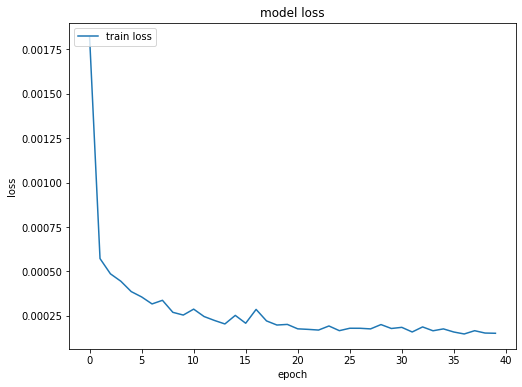

Normalized Rmse= 0.02903837452578916 RMSE= 73.26319934041564 MAPE= 0.024018560419771594
40   1


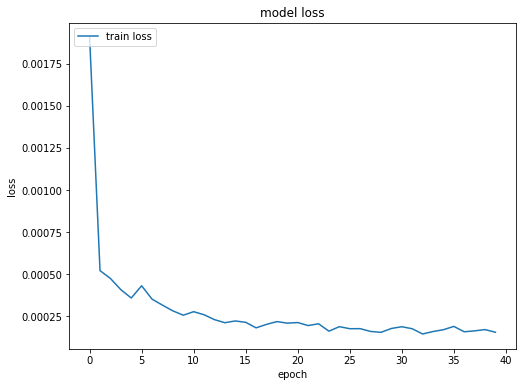

Normalized Rmse= 0.03978742410491681 RMSE= 100.38281547467096 MAPE= 0.034276330867301495
40   2


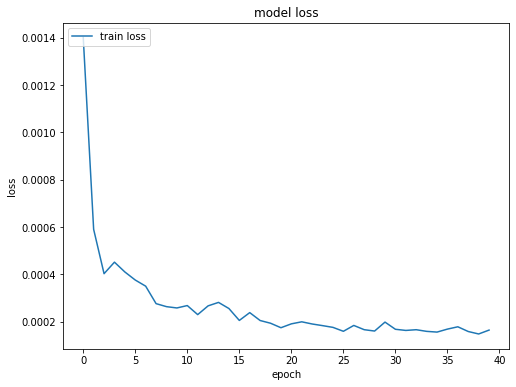

Normalized Rmse= 0.04763620386130283 RMSE= 120.18513338443964 MAPE= 0.04415147338063149
40   3


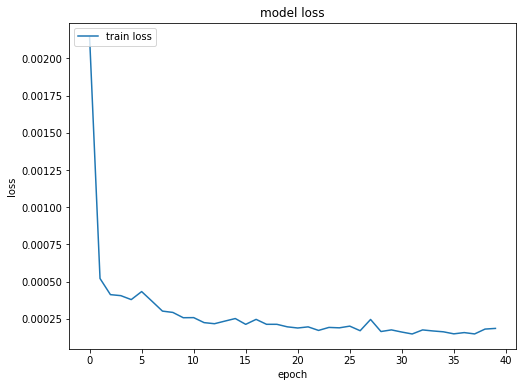

Normalized Rmse= 0.02896586526548241 RMSE= 73.08025367411372 MAPE= 0.02250729981669897
40   4


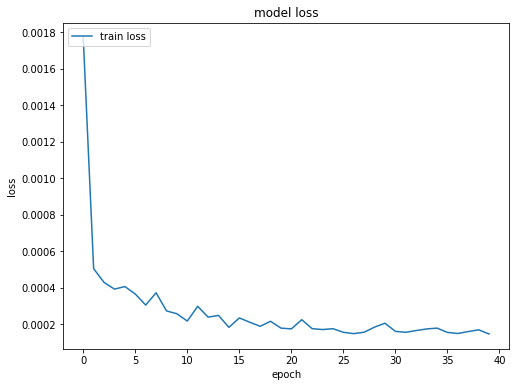

Normalized Rmse= 0.06853950898639749 RMSE= 172.92374347828923 MAPE= 0.07941089352365738
Mean Norm RMSE= 0.04279347534877774 Mean RMSE= 107.96702907038585 Mean MAPE= 0.04087291160161218
50   0


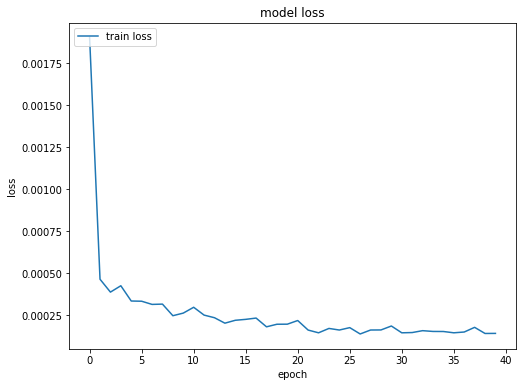

Normalized Rmse= 0.029766601036463513 RMSE= 75.100533613536 MAPE= 0.02869310375335684
50   1


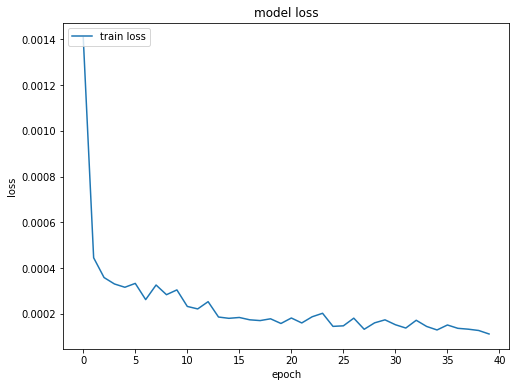

Normalized Rmse= 0.02379812627546951 RMSE= 60.04219533525896 MAPE= 0.022062289650905842
50   2


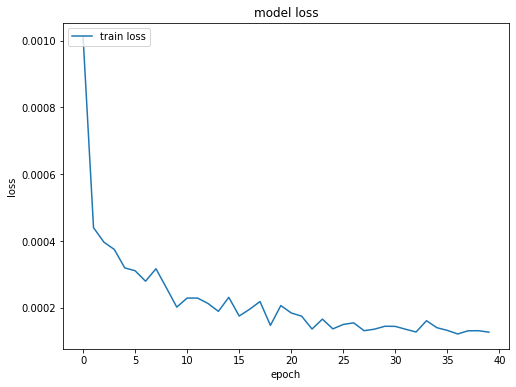

Normalized Rmse= 0.02458939098939831 RMSE= 62.03848515072897 MAPE= 0.02124660575683951
50   3


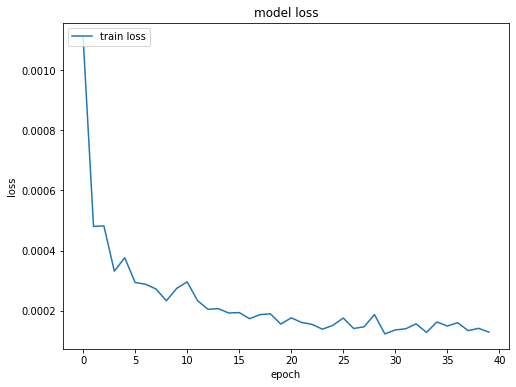

Normalized Rmse= 0.05635893729167812 RMSE= 142.19239392900244 MAPE= 0.06398266462780919
50   4


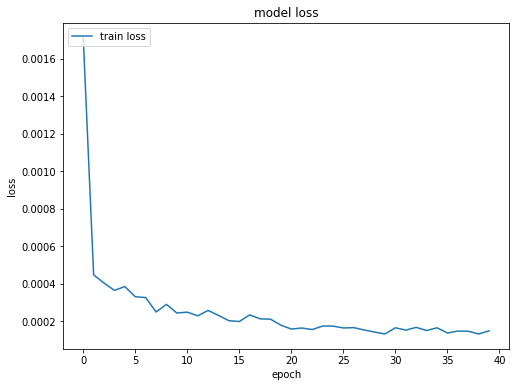

Normalized Rmse= 0.050173686455352584 RMSE= 126.58714114565205 MAPE= 0.04237260693119626
Mean Norm RMSE= 0.03693734840967241 Mean RMSE= 93.19214983483569 Mean MAPE= 0.03567145414402153
60   0


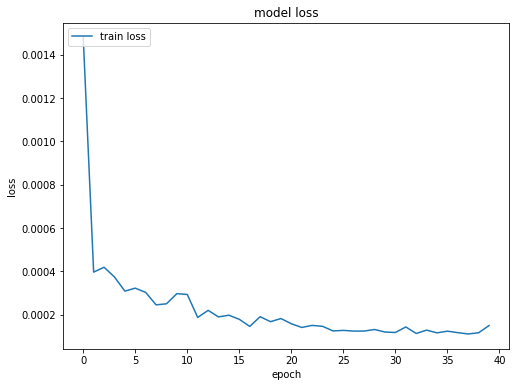

Normalized Rmse= 0.0351341476550784 RMSE= 88.64270314586126 MAPE= 0.030605805626033447
60   1


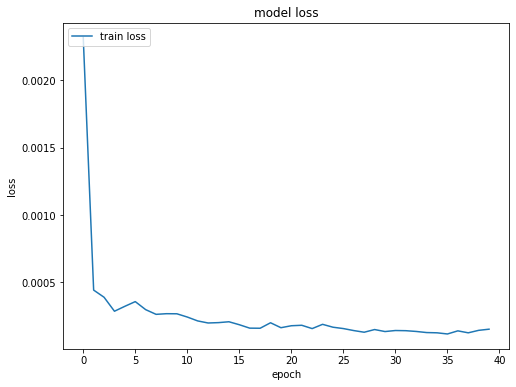

Normalized Rmse= 0.05567367751719833 RMSE= 140.46350282156533 MAPE= 0.060208711558694214
60   2


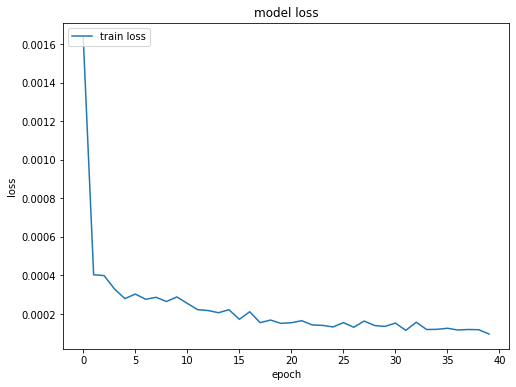

Normalized Rmse= 0.018923000455685457 RMSE= 47.742342006375424 MAPE= 0.02359430559803746
60   3


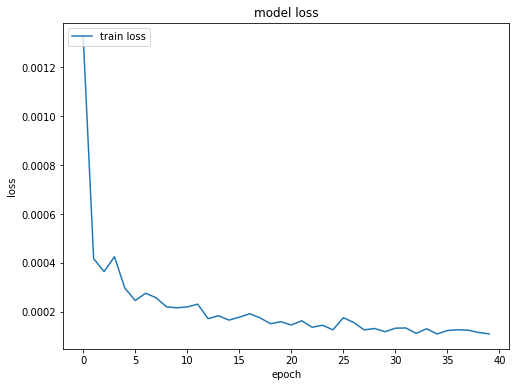

Normalized Rmse= 0.06677237611626713 RMSE= 168.46527940859679 MAPE= 0.0739645375307977
60   4


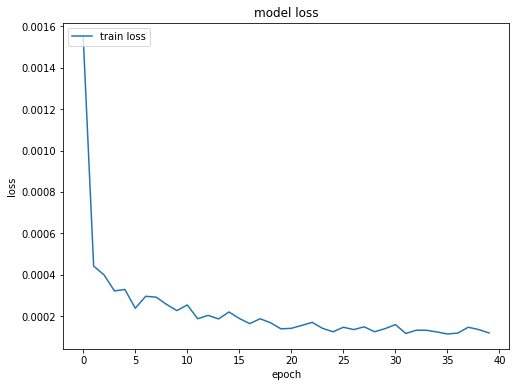

Normalized Rmse= 0.048731333680879486 RMSE= 122.94811355472476 MAPE= 0.052538303862022726
Mean Norm RMSE= 0.04504690708502176 Mean RMSE= 113.6523881874247 Mean MAPE= 0.048182332835117116
70   0


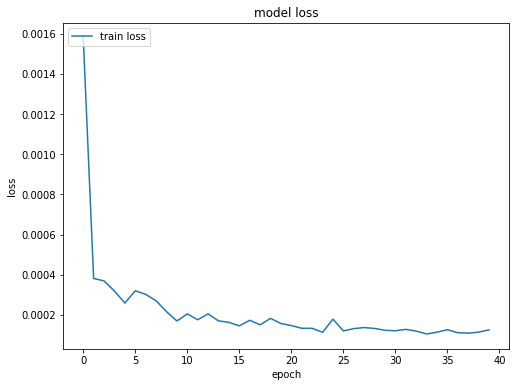

Normalized Rmse= 0.03834361054895407 RMSE= 96.7401060446728 MAPE= 0.03307273304563206
70   1


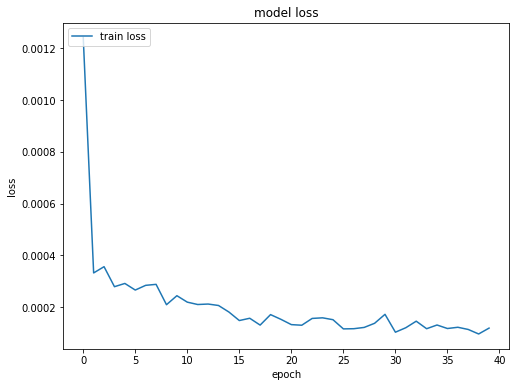

Normalized Rmse= 0.05429259517509569 RMSE= 136.9790573753035 MAPE= 0.054907738687971726
70   2


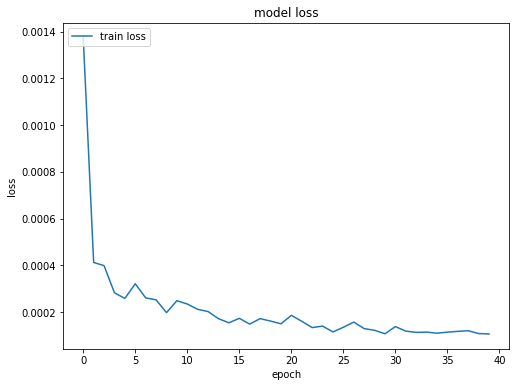

Normalized Rmse= 0.06075923146911408 RMSE= 153.2942494672647 MAPE= 0.07260615976319487
70   3


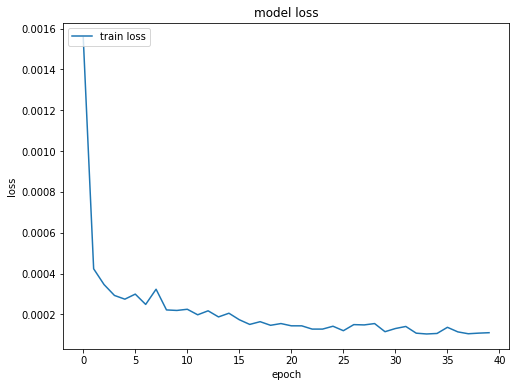

Normalized Rmse= 0.04566938209999777 RMSE= 115.222882169056 MAPE= 0.03929169030619474
70   4


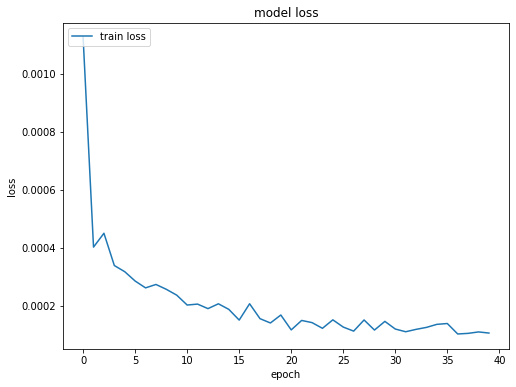

Normalized Rmse= 0.0779340750650768 RMSE= 196.62601561755434 MAPE= 0.09668025831192005
Mean Norm RMSE= 0.05539977887164769 Mean RMSE= 139.77246213477028 Mean MAPE= 0.0593117160229827
80   0


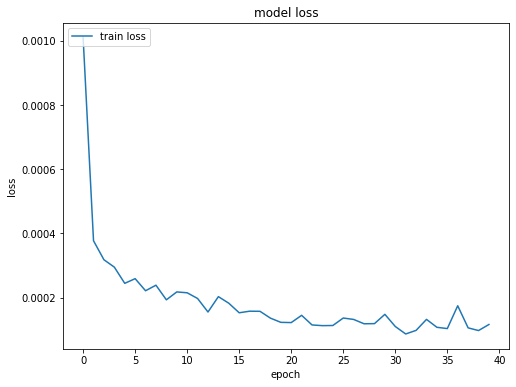

Normalized Rmse= 0.03666858512685888 RMSE= 92.51404853032184 MAPE= 0.03018105198872469
80   1


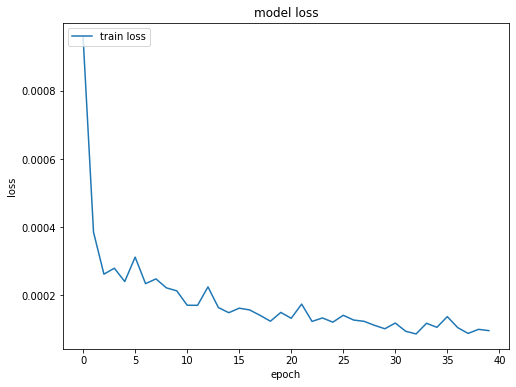

Normalized Rmse= 0.03980877718732414 RMSE= 100.43672430490952 MAPE= 0.03797711298385288
80   2


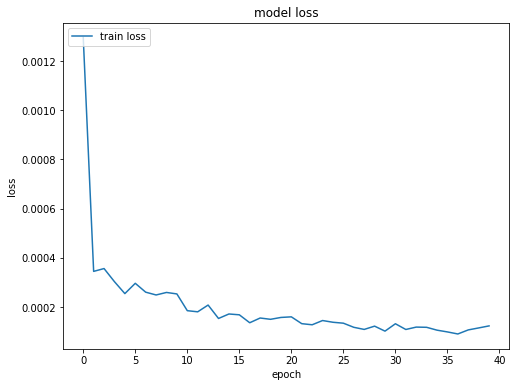

Normalized Rmse= 0.011935048989845527 RMSE= 30.111891092950902 MAPE= 0.011981227799684118
80   3


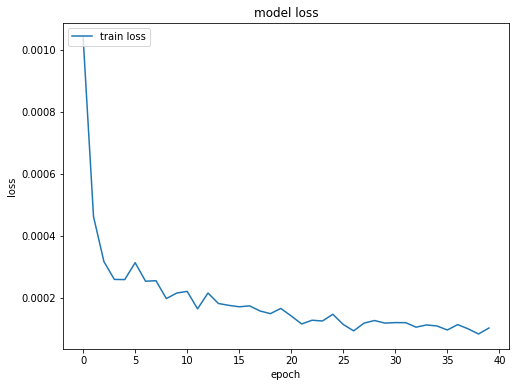

Normalized Rmse= 0.020239122011256164 RMSE= 51.062830808755876 MAPE= 0.03153089601621379
80   4


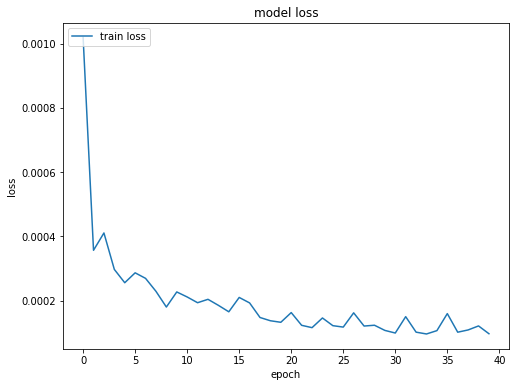

Normalized Rmse= 0.032775192479061584 RMSE= 82.69111332880445 MAPE= 0.03031532264690086
Mean Norm RMSE= 0.028285345158869258 Mean RMSE= 71.36332161314851 Mean MAPE= 0.02839712228707527
90   0


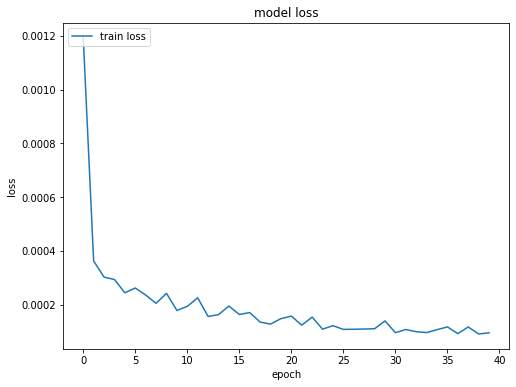

Normalized Rmse= 0.020658334558779134 RMSE= 52.12056832387019 MAPE= 0.017337795217174875
90   1


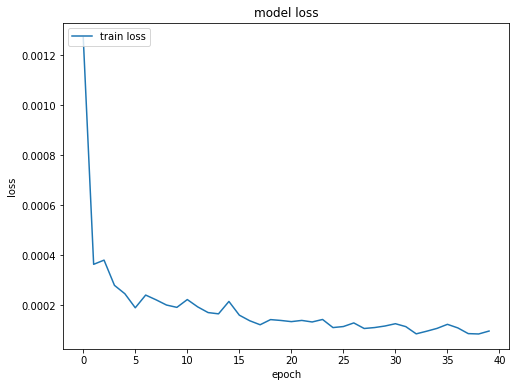

Normalized Rmse= 0.024591551087122913 RMSE= 62.043937487251895 MAPE= 0.01997517346354134
90   2


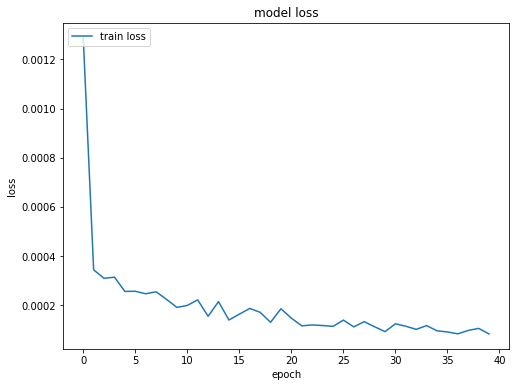

Normalized Rmse= 0.023458322366434754 RMSE= 59.1848369554086 MAPE= 0.021290919580651994
90   3


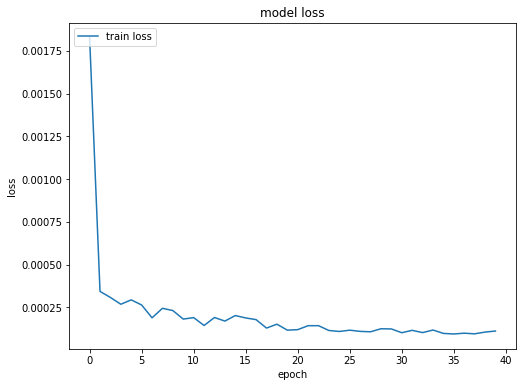

Normalized Rmse= 0.033252794951380345 RMSE= 83.89612676485051 MAPE= 0.030935092397672462
90   4


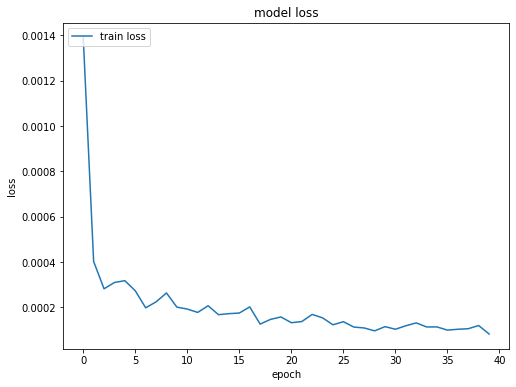

Normalized Rmse= 0.045434102735344 RMSE= 114.62930775999882 MAPE= 0.05545694566864817
Mean Norm RMSE= 0.029479021139812222 Mean RMSE= 74.374955458276 Mean MAPE= 0.02899918526553777
100   0


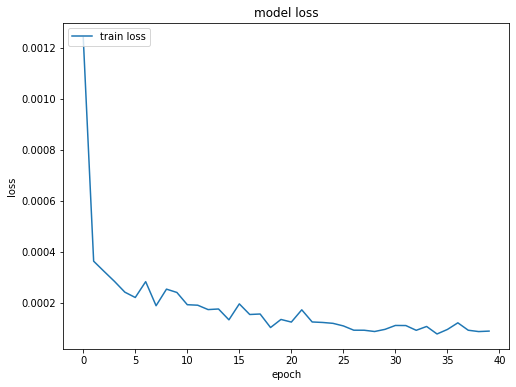

Normalized Rmse= 0.07091272722431294 RMSE= 178.91132720329026 MAPE= 0.07525216653329125
100   1


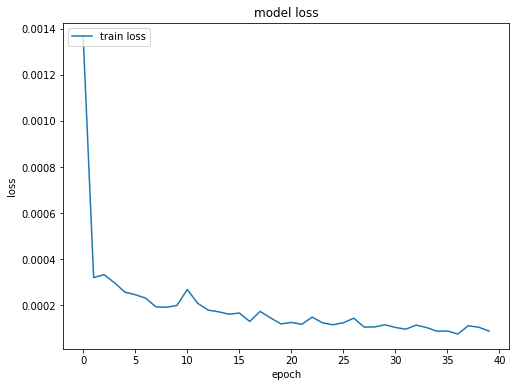

Normalized Rmse= 0.07429083964845237 RMSE= 187.43422867743362 MAPE= 0.08573123042876644
100   2


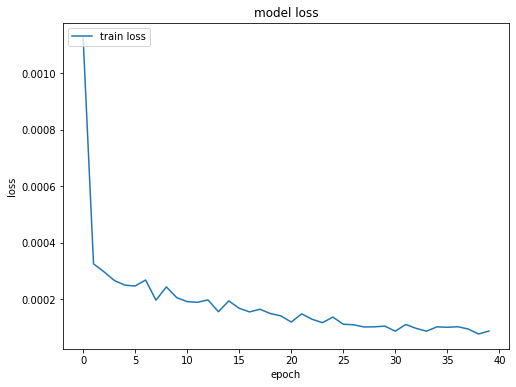

Normalized Rmse= 0.04143138585150125 RMSE= 104.53052925599114 MAPE= 0.045144442870901164
100   3


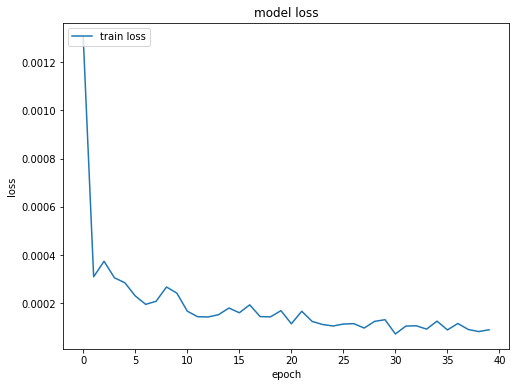

Normalized Rmse= 0.026552723048091878 RMSE= 66.9919817054359 MAPE= 0.022615916721777898
100   4


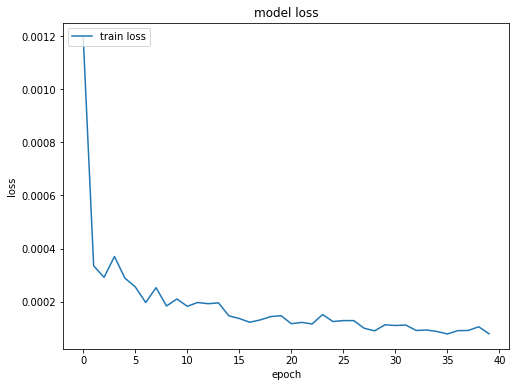

Normalized Rmse= 0.03764150420009022 RMSE= 94.96870729238148 MAPE= 0.03970722381487487
Mean Norm RMSE= 0.050165835994489726 Mean RMSE= 126.5673548269065 Mean MAPE= 0.05369019607392232
110   0


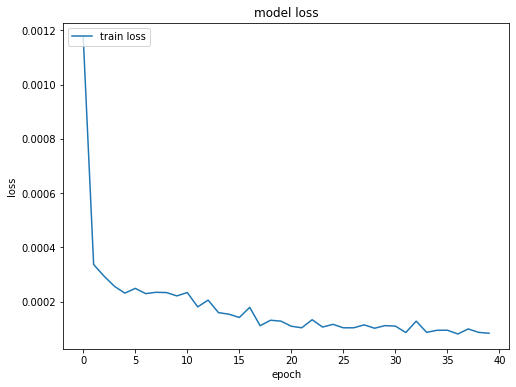

Normalized Rmse= 0.06282327802940706 RMSE= 158.5017921646139 MAPE= 0.07449178466402942
110   1


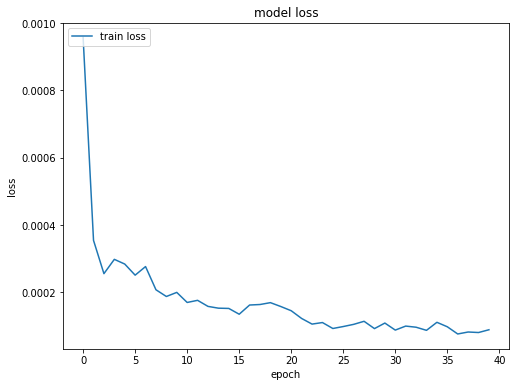

Normalized Rmse= 0.049726740751750265 RMSE= 125.45950343642684 MAPE= 0.048365576368709036
110   2


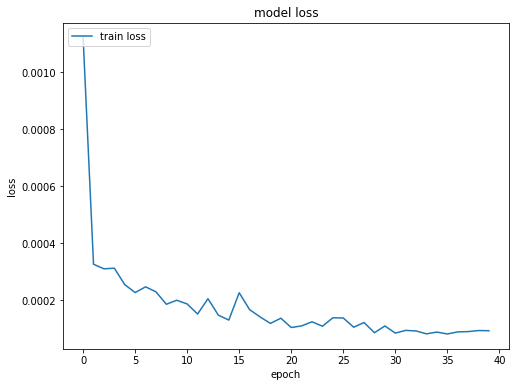

Normalized Rmse= 0.0947840664361306 RMSE= 239.13819489448824 MAPE= 0.11785150561568546
110   3


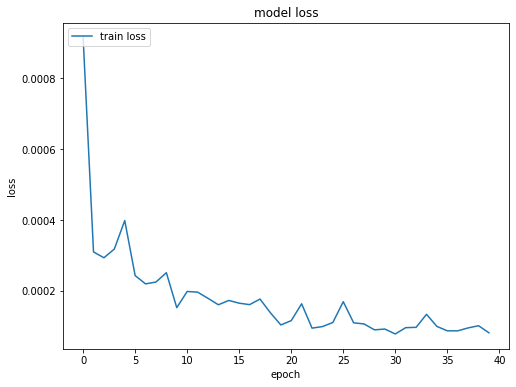

Normalized Rmse= 0.019131599517649103 RMSE= 48.26860716903622 MAPE= 0.016303671524272232
110   4


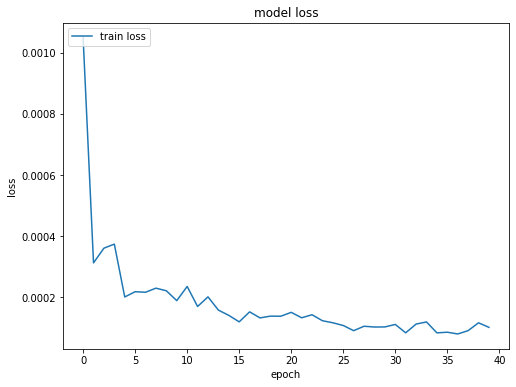

Normalized Rmse= 0.016087429327301842 RMSE= 40.58821591897678 MAPE= 0.018705328604322936
Mean Norm RMSE= 0.048510622812447765 Mean RMSE= 122.39126271670841 Mean MAPE= 0.05514357335540382
120   0


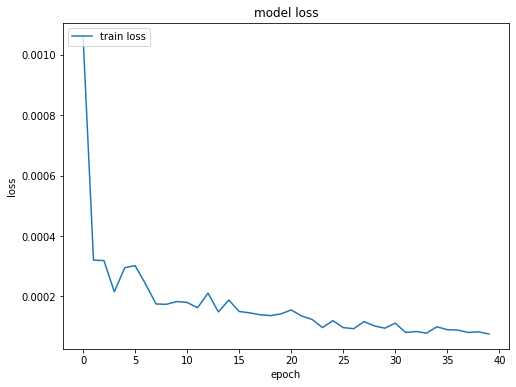

Normalized Rmse= 0.07081568757664053 RMSE= 178.66647365198475 MAPE= 0.07904326333565184
120   1


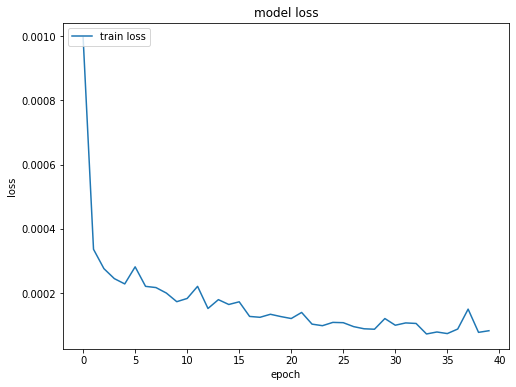

Normalized Rmse= 0.025195091281550643 RMSE= 63.566656817249246 MAPE= 0.0332078653883552
120   2


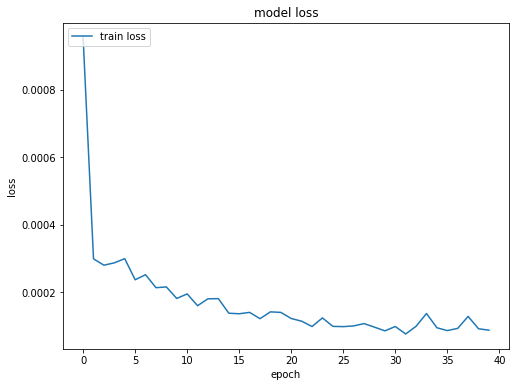

Normalized Rmse= 0.021307490740662183 RMSE= 53.75831724394919 MAPE= 0.019238628056147688
120   3


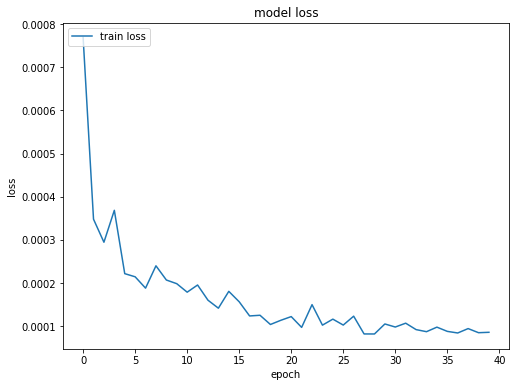

Normalized Rmse= 0.07101338232849423 RMSE= 179.16527463750785 MAPE= 0.08474644653329858
120   4


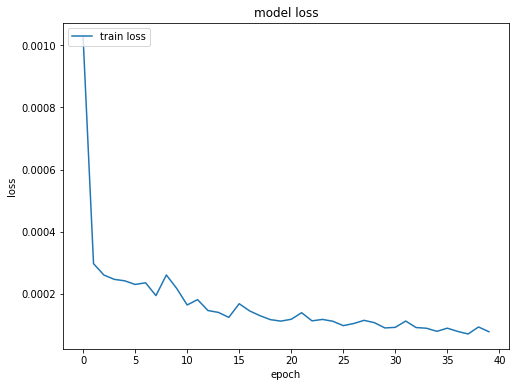

Normalized Rmse= 0.025648316056135646 RMSE= 64.71013239560064 MAPE= 0.023182294153200597
Mean Norm RMSE= 0.04279599359669665 Mean RMSE= 107.97337094925835 Mean MAPE= 0.04788369949333078
130   0


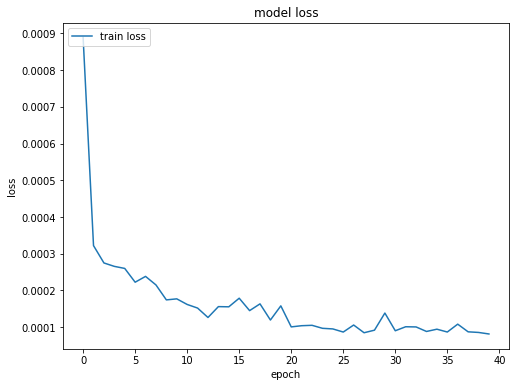

Normalized Rmse= 0.03891476211969244 RMSE= 98.181140381159 MAPE= 0.03453334856886424
130   1


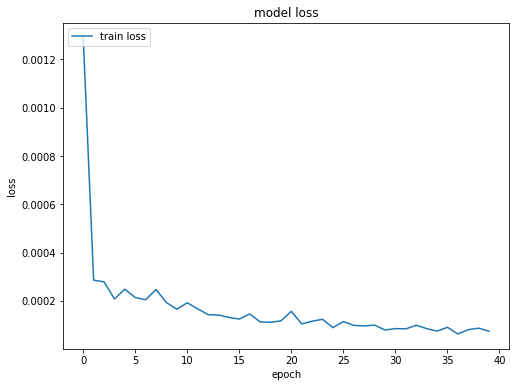

Normalized Rmse= 0.04301420829218886 RMSE= 108.52392532572854 MAPE= 0.039896801251259044
130   2


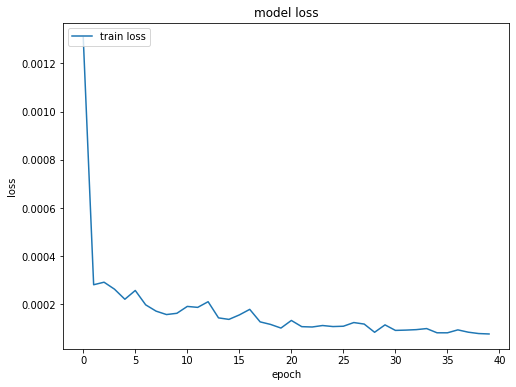

Normalized Rmse= 0.03870441081563333 RMSE= 97.65040090762396 MAPE= 0.036017279692562916
130   3


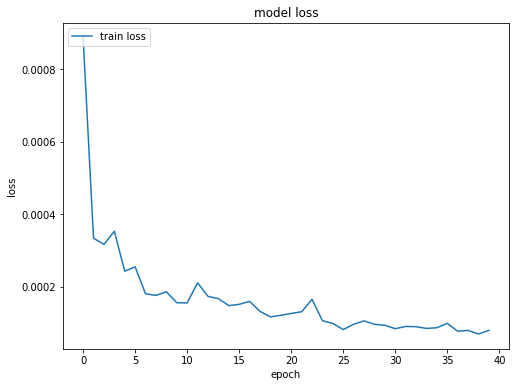

Normalized Rmse= 0.041063395264411905 RMSE= 103.60209520996634 MAPE= 0.03302202480650043
130   4


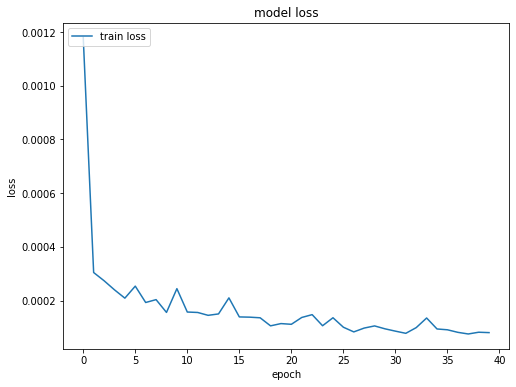

Normalized Rmse= 0.032992875856787854 RMSE= 83.24031272149078 MAPE= 0.026621532031335604
Mean Norm RMSE= 0.03893793046974288 Mean RMSE= 98.23957490919372 Mean MAPE= 0.034018197270104446
140   0


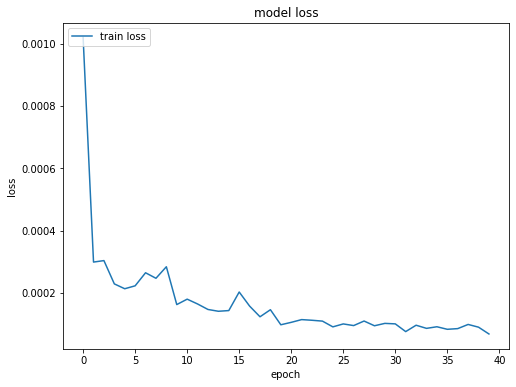

Normalized Rmse= 0.04743417446720272 RMSE= 119.6754052566826 MAPE= 0.046513015874805955
140   1


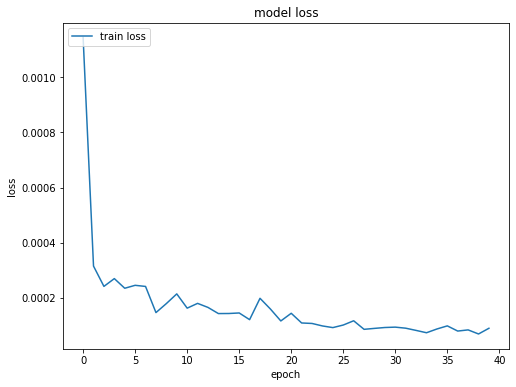

Normalized Rmse= 0.06891349058152166 RMSE= 173.86727905058083 MAPE= 0.07728959501772316
140   2


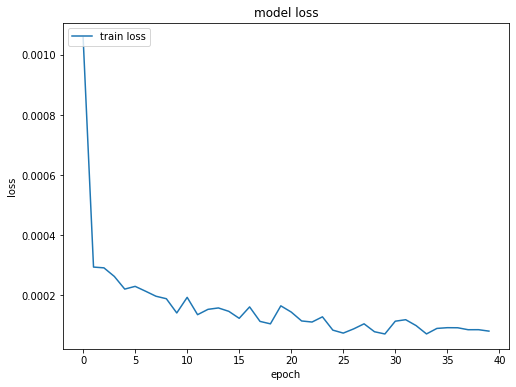

Normalized Rmse= 0.04156284933373539 RMSE= 104.86216785440173 MAPE= 0.03401347966613539
140   3


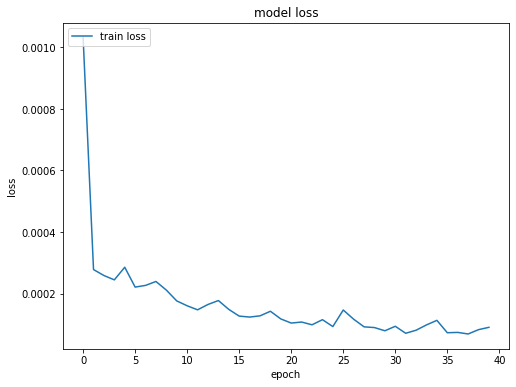

Normalized Rmse= 0.03445733416006777 RMSE= 86.93510998001757 MAPE= 0.030718660220959558
140   4


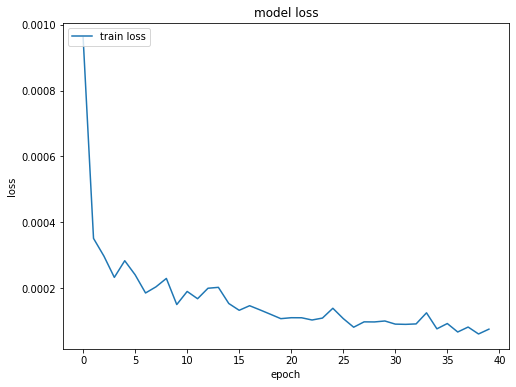

Normalized Rmse= 0.0393515272051996 RMSE= 99.28305392139389 MAPE= 0.032611678234667714
Mean Norm RMSE= 0.046343875149545424 Mean RMSE= 116.92460321261531 Mean MAPE= 0.044229285802858356
150   0


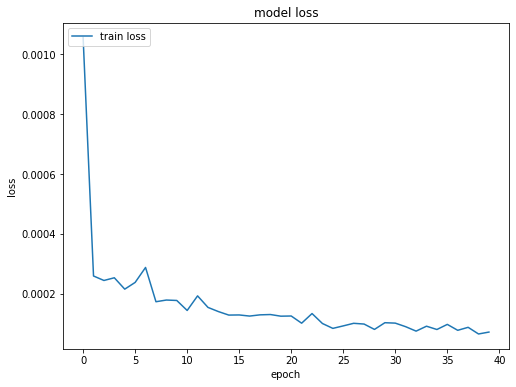

Normalized Rmse= 0.05929434072357917 RMSE= 149.59838033555314 MAPE= 0.059307166441542915
150   1


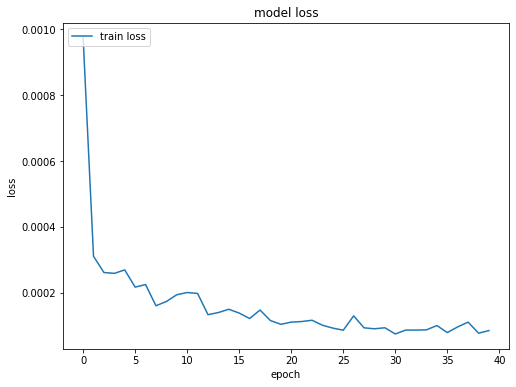

Normalized Rmse= 0.03271777786787858 RMSE= 82.54624256768054 MAPE= 0.025709127258203082
150   2


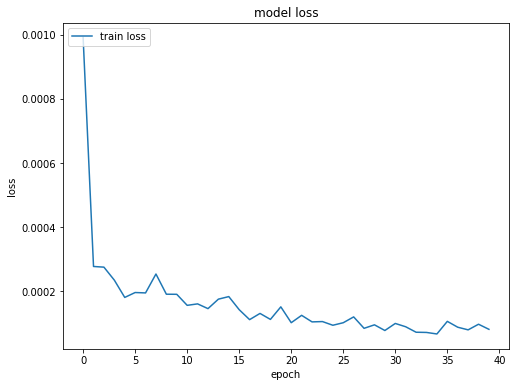

Normalized Rmse= 0.09104693728493404 RMSE= 229.70949558668096 MAPE= 0.10118617128677053
150   3


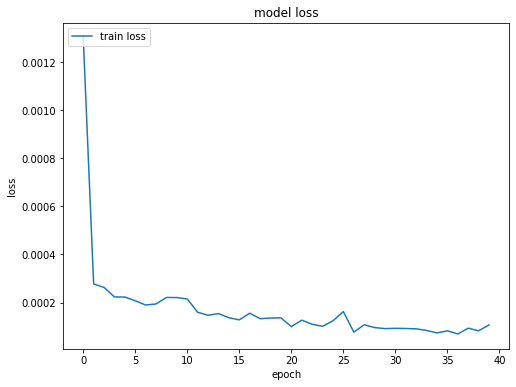

Normalized Rmse= 0.035533497857917706 RMSE= 89.6502559551443 MAPE= 0.037032681587748056
150   4


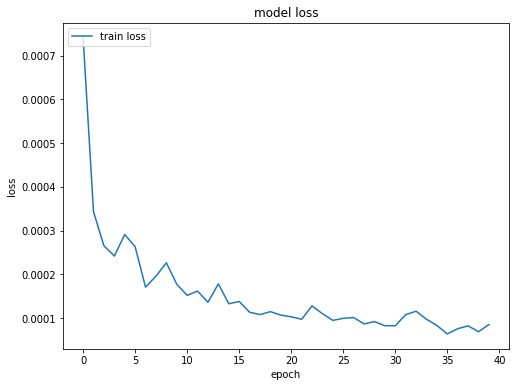

Normalized Rmse= 0.034154254699044186 RMSE= 86.17043983613156 MAPE= 0.02768698543757615
Mean Norm RMSE= 0.050549361686670735 Mean RMSE= 127.5349628562381 Mean MAPE= 0.05018442640236816
160   0


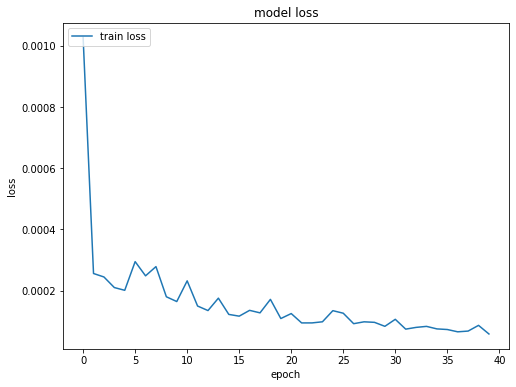

Normalized Rmse= 0.054624216820969095 RMSE= 137.8157381304875 MAPE= 0.06016042611054088
160   1


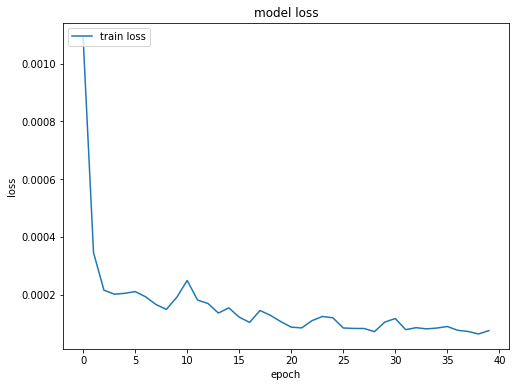

Normalized Rmse= 0.025492053042386283 RMSE= 64.31593433070897 MAPE= 0.02213106714998031
160   2


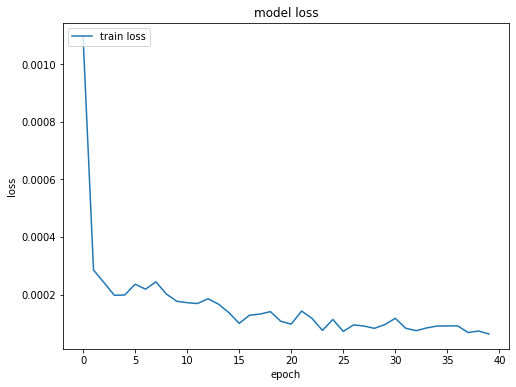

Normalized Rmse= 0.06476282393664863 RMSE= 163.39524684450637 MAPE= 0.0715685786574944
160   3


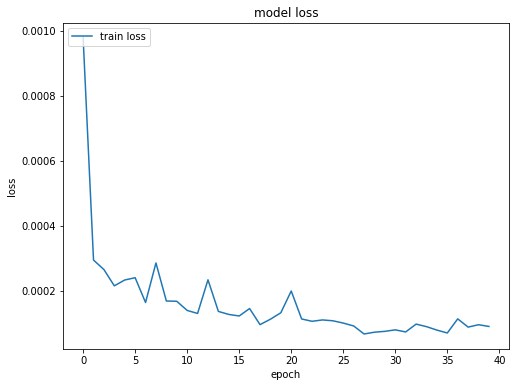

Normalized Rmse= 0.036145067874074684 RMSE= 91.19323155630272 MAPE= 0.028396296732565038
160   4


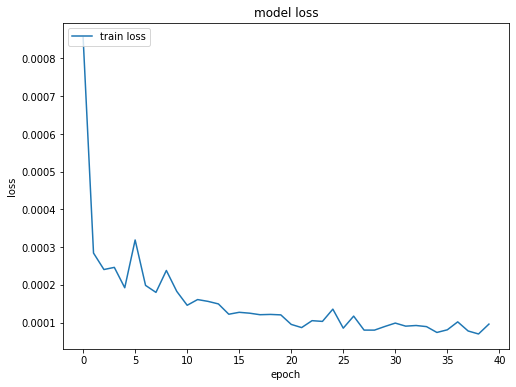

Normalized Rmse= 0.05742156678159439 RMSE= 144.8733885991219 MAPE= 0.05339795279052952
Mean Norm RMSE= 0.04768914569113462 Mean RMSE= 120.31870789222549 Mean MAPE= 0.04713086428822204
170   0


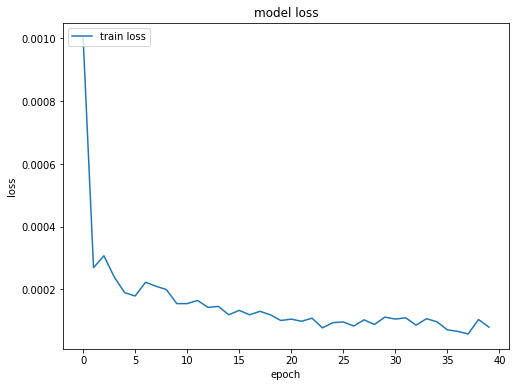

Normalized Rmse= 0.06644641580186413 RMSE= 167.64290102521952 MAPE= 0.07157534996993271
170   1


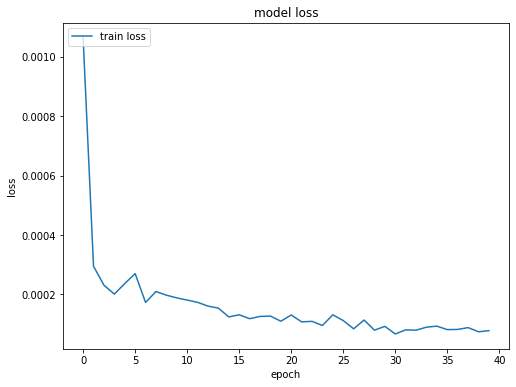

Normalized Rmse= 0.018087081435983567 RMSE= 45.63329648580634 MAPE= 0.026282677044713595
170   2


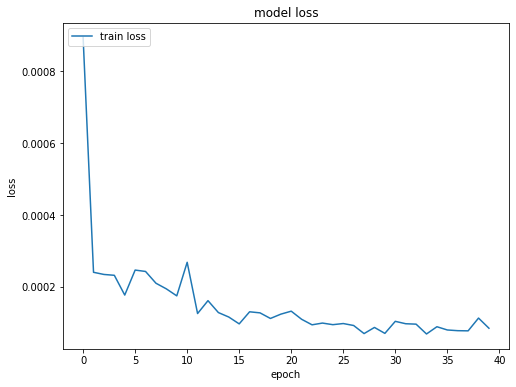

Normalized Rmse= 0.03158042291344648 RMSE= 79.67676023212573 MAPE= 0.024453863914250716
170   3


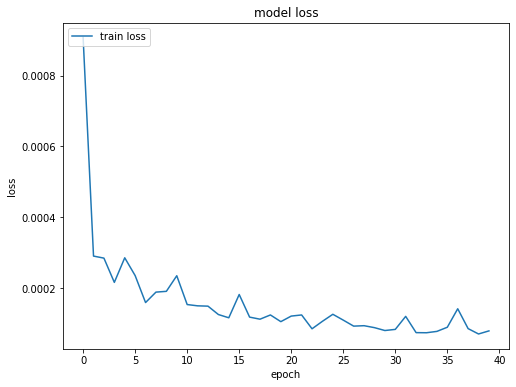

Normalized Rmse= 0.03459496855981029 RMSE= 87.28234895292148 MAPE= 0.027781355719631154
170   4


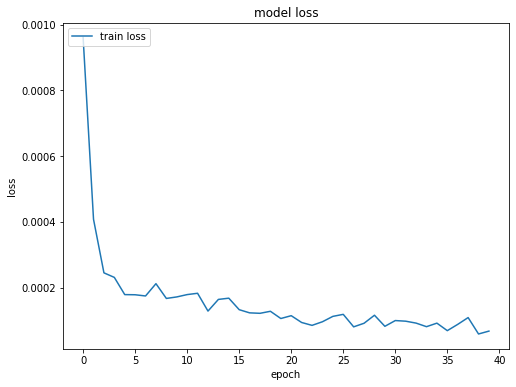

Normalized Rmse= 0.03090739476984934 RMSE= 77.97868659640112 MAPE= 0.028210652565969718
Mean Norm RMSE= 0.036323256696190756 Mean RMSE= 91.64279865849485 Mean MAPE= 0.03566077984289958
180   0


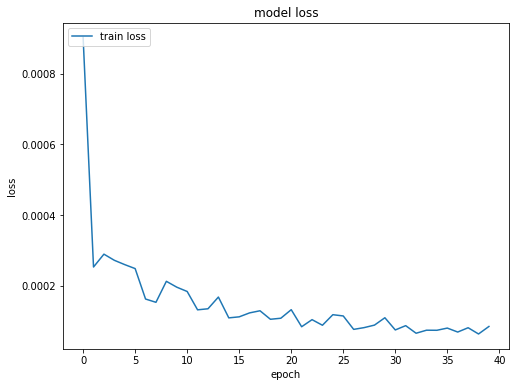

Normalized Rmse= 0.03011998758056599 RMSE= 75.9920727261651 MAPE= 0.027948644968576925
180   1


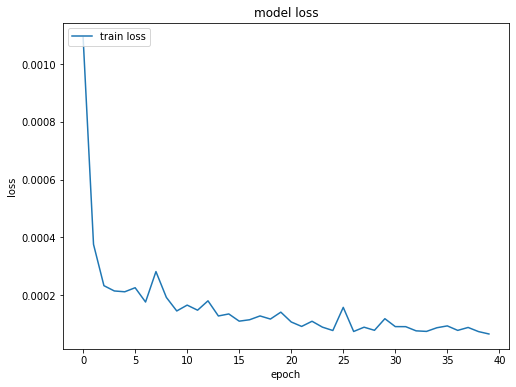

Normalized Rmse= 0.05192968396579005 RMSE= 131.01747486555203 MAPE= 0.045762481959984454
180   2


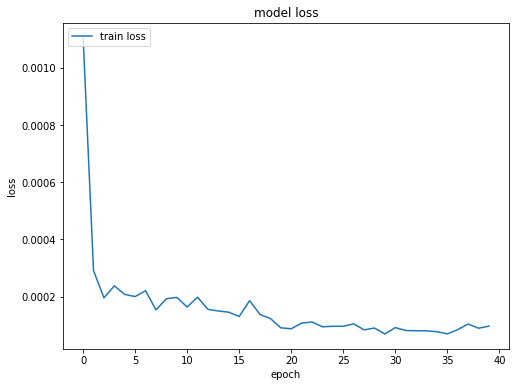

Normalized Rmse= 0.03814338663066733 RMSE= 96.23493966792665 MAPE= 0.030885367034607702
180   3


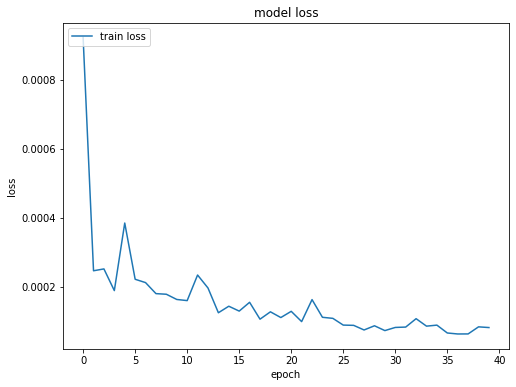

Normalized Rmse= 0.026420797662012357 RMSE= 66.65908824998442 MAPE= 0.024435733924789753
180   4


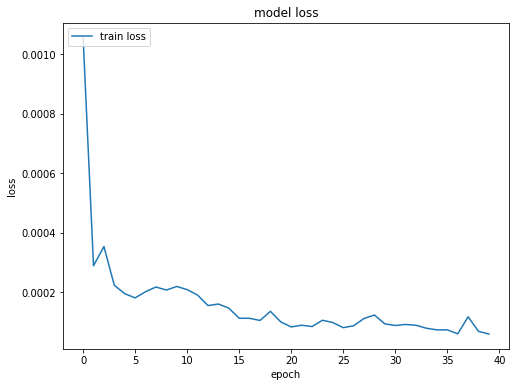

Normalized Rmse= 0.05441965222864824 RMSE= 137.29962392004327 MAPE= 0.044539115884651814
Mean Norm RMSE= 0.04020670161353679 Mean RMSE= 101.4406398859343 Mean MAPE= 0.03471426875452213
190   0


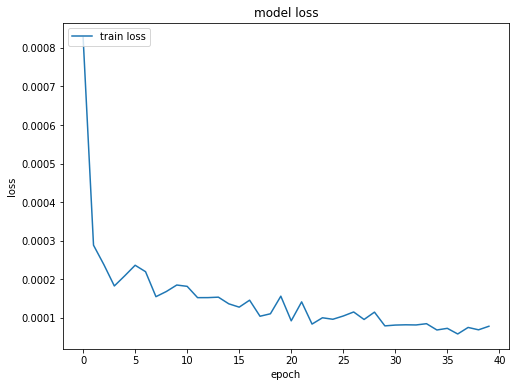

Normalized Rmse= 0.05808407365382236 RMSE= 146.54487172943055 MAPE= 0.05697459795360549
190   1


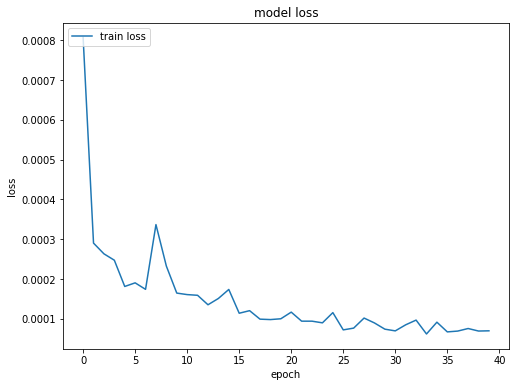

Normalized Rmse= 0.07059283399199154 RMSE= 178.10422710054524 MAPE= 0.07826675759630398
190   2


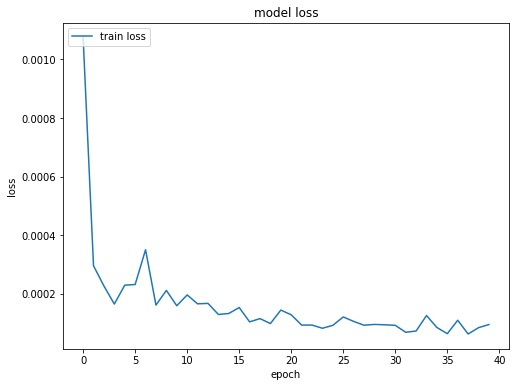

Normalized Rmse= 0.03540295811878029 RMSE= 89.32089096252419 MAPE= 0.028871234990483108
190   3


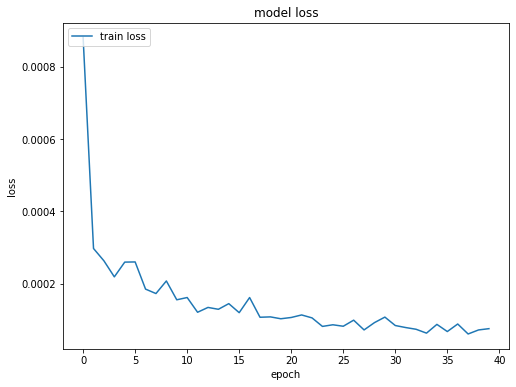

Normalized Rmse= 0.021089037754562768 RMSE= 53.20715563288359 MAPE= 0.02951491181007741
190   4


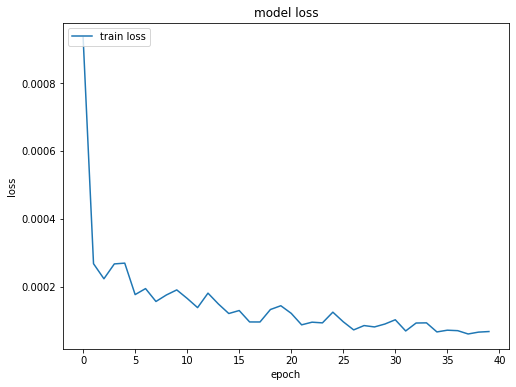

Normalized Rmse= 0.06221896849641895 RMSE= 156.9771271641711 MAPE= 0.05666865933161479
Mean Norm RMSE= 0.04947757440311519 Mean RMSE= 124.83085451791094 Mean MAPE= 0.050059232336416945


In [8]:
#model GRU3

for m in range(10,200,10):
    av_rmse=0
    av_rmse1=0
    av_mape=0
    for i in range(5):
      print(m,' ',i)
      GRU3 = Sequential()
      GRU3.add(GRU(m, input_shape=(30, 1),return_sequences=True))
      GRU3.add(Dropout(0.2))
      GRU3.add(GRU(m, input_shape=(30, 1),return_sequences=True))
      GRU3.add(Dropout(0.2))
      GRU3.add(GRU(m, input_shape=(30, 1)),)
      GRU3.add(Dense(units = m, activation = 'tanh'))
      GRU3.add(Dropout(0.2))
      GRU3.add(Dense(units = 1, activation = 'linear'))
      #GRU3.summary()
      #plot_model(GRU3, to_file='model_plot6.png', show_shapes=True, show_layer_names=True)
      GRU3.compile(loss='mse', optimizer='adam')

      history=GRU3.fit(x_train,y_train,epochs=40,batch_size=10, verbose=0)

      y_test_pred=GRU3.predict(x_test)
      y_train_pred=GRU3.predict(x_train)

      rmse=mean_squared_error(y_test,y_test_pred,squared=False)
      av_rmse=av_rmse+rmse
      y_test_pred_nn=sca.inverse_transform(y_test_pred)
      y_train_pred_nn=sca.inverse_transform(y_train_pred)
      y_test_nn=sca.inverse_transform(y_test)
      rmse1=mean_squared_error(y_test_nn,y_test_pred_nn,squared=False)
      mape=mean_absolute_percentage_error(y_test,y_test_pred)
      av_rmse1=av_rmse1+rmse1
      av_mape=av_mape+mape
      GRU3.reset_states()
      plt.figure(figsize=(8, 6))
      plt.plot(history.history['loss'])
      #plt.plot(history.history['val_loss'])
      plt.title('model loss')
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.legend(['train loss'], loc='upper left')
      plt.show()
      print('Normalized Rmse=',rmse, 'RMSE=',rmse1,'MAPE=',mape)

    print('Mean Norm RMSE=',av_rmse/5,'Mean RMSE=',av_rmse1/5,'Mean MAPE=',av_mape/5)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


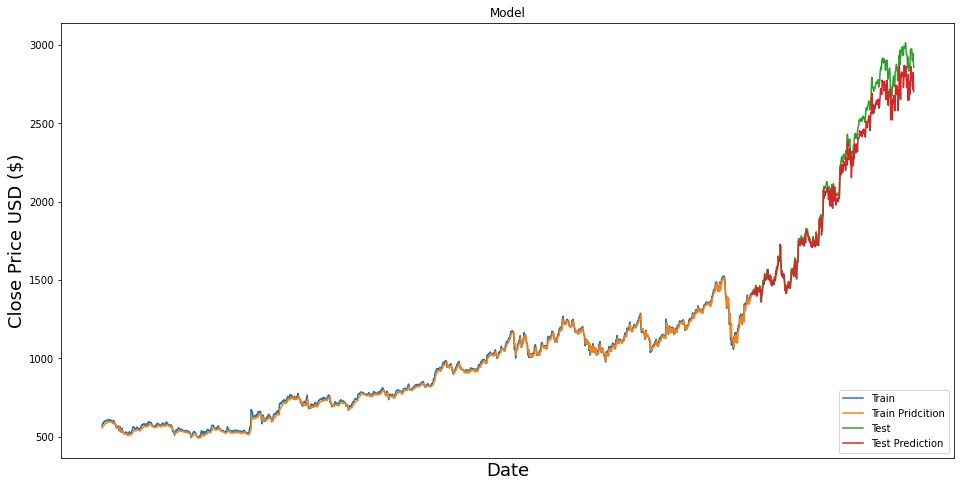

In [ ]:
train=data_close[window_size:split_index+window_size]
valid=data_close[split_index+window_size:]

train['Prediction'] =y_train_pred_nn
valid['Prediction'] =y_test_pred_nn


#Visualize the data
#print(valid)
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train[['Close','Prediction']])
plt.plot(valid[['Close', 'Prediction']])
plt.gca().xaxis.set_major_locator(mdp.DayLocator(interval=120))
plt.legend(['Train', 'Train Pridcition','Test', 'Test Prediction'], loc='lower right')
plt.show()
#valid.head()